# 資料科學
1. 定義問題：魚骨圖、SGD、ESG
3. 收集數據：csv、資料庫
5. 處理數據：資料清理、資料整合、資料轉換、資料精簡
7. 探索數據：EDA，把玩數據：透過切割、分群、繪圖等不同方式來觀察數據樣貌。找出模式：利用統計方法找出規律，並提取出重要的特徵。
9. 深度分析：建立模型：利用上一步提取的特徵向量來建立預測模型。評估與優化：測試模型準確度。這通常是一個迭代過程，可能需要回頭修正第 2、3 或 4 步驟。
11. 報告：將發現的結果對應回最初的業務問題。製作簡單、重點導向的圖表。說故事：將分析結果轉化為清晰、可執行的故事，有效地傳達給非技術背景的聽眾。

# 1. 定義問題範疇

1. 💰 社會經濟因素分析 (Socioeconomic Impact)
亮點：利用資料集中的「收入」欄位進行分析。
核心問題：「越富裕的地區，再入院率是否越低？」
分析方法：繪製 散佈圖 (Scatter Plot)。
X 軸：人均個人收
Y 軸：30天內再入院率 (彙總)
假設：高收入地區醫療資源較佳或病患自我照護能力強，再入院率應較低（負相關）。
2. 📅 長期趨勢與政策影響 (Temporal Trend & Policy)
核心問題：「加州的整體醫療品質在過去 12 年 (2011-2022) 是進步還是退步？」
次要問題：2015 年左右 ICD-9 轉 ICD-10 是否造成數據斷層？
分析方法：繪製 折線圖 (Line Chart)
X 軸：年度
Y 軸：30天內再入院率
3. 🏥 醫療負載分析 (Healthcare Load Analysis)
核心問題：「醫療需求（入院比例）較高的地區，是否因資源緊繃導致較高的再入院率？」
分析方法：比較 總入院人次 (比例) 高 vs 低的郡，觀察其 30天內再入院率 差異。
4. 📍 地區異常值偵測 (Regional Outlier Detection)
核心問題：「哪些郡是長期表現最差的『後段班』？」
分析方法：以 12 年來的 平均再入院率 進行排名 (Bar Chart)，找出收入不低但再入院率異常高的地區。

# 2. 收集原始數據

## 環境初始化

In [1]:
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 60.1 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 65.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.7/204.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 83.6 MB/s eta 0:00:00:00:010:01
   ━━━

In [2]:
from pycaret.regression import *

In [3]:
import random 
import warnings
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import statsmodels.formula.api as smf



my_font = FontProperties(fname='/kaggle/input/my-font/Chocolate_Classical_Sans/ChocolateClassicalSans-Regular.ttf')
sns.set_theme(style="whitegrid", context="notebook", font_scale=1)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False  # 解決負號 '-' 顯示為方塊的問題
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

## 資料集

In [4]:
hospital = pd.read_csv('/kaggle/input/hospital-readmission-rates-in-california/primary.csv')
rename_dict = {
    'Year': '年度',
    'County': '地區',
    'ICD Version': 'ICD 版本',
    'Total Admits (Consolidated)': '總入院人數',
    '30-day Readmits (Consolidated)': '30天再入院人數',
    '30-day Readmission Rate (Consolidated)': '30天再入院率',
    'PCPI': '人均收入',
    'Population': '人口數',
    'Total Admits (Proportion)': '醫療利用率',
    '30-day Readmits (Proportion)': '30天再入院醫療利用率',
}
county_mapping = {
    'Alameda': '阿拉米達',
    'Alpine': '阿爾卑斯',
    'Amador': '阿馬多爾',
    'Butte': '比尤特',
    'Calaveras': '卡拉韋拉斯',
    'Colusa': '科盧薩',
    'Contra Costa': '康特拉科斯塔',
    'Del Norte': '德爾諾特',
    'El Dorado': '埃爾多拉多',
    'Fresno': '佛雷斯諾',
    'Glenn': '格倫',
    'Humboldt': '洪堡',
    'Imperial': '帝國',
    'Inyo': '因約',
    'Kern': '克恩',
    'Kings': '國王',
    'Lake': '萊克',
    'Lassen': '拉森',
    'Los Angeles': '洛杉磯',
    'Madera': '馬德拉',
    'Marin': '馬林',
    'Mariposa': '馬里波薩',
    'Mendocino': '門多西諾',
    'Merced': '麥塞德',
    'Modoc': '莫多克',
    'Mono': '莫諾',
    'Monterey': '蒙特雷',
    'Napa': '納帕',
    'Nevada': '內華達',
    'Orange': '橙縣',
    'Placer': '普萊瑟',
    'Plumas': '普盧默斯',
    'Riverside': '河濱',
    'Sacramento': '沙加緬度',
    'San Benito': '聖貝尼托',
    'San Bernardino': '聖貝納迪諾',
    'San Diego': '聖地牙哥',
    'San Francisco': '舊金山',
    'San Joaquin': '聖華金',
    'San Luis Obispo': '聖路易斯-奧比斯保',
    'San Mateo': '聖馬刁',
    'Santa Barbara': '聖塔芭芭拉',
    'Santa Clara': '聖塔克拉拉',
    'Santa Cruz': '聖塔克魯茲',
    'Shasta': '沙斯塔',
    'Sierra': '謝拉',
    'Siskiyou': '西斯基尤',
    'Solano': '索拉諾',
    'Sonoma': '索諾馬',
    'Stanislaus': '史丹尼斯勞斯',
    'Sutter': '薩特',
    'Tehama': '特哈馬',
    'Trinity': '特里尼蒂',
    'Tulare': '圖萊里',
    'Tuolumne': '托勒米',
    'Ventura': '范圖拉',
    'Yolo': '尤洛',
    'Yuba': '尤巴'
}
hospital_chinese = hospital.rename(columns=rename_dict, inplace=False)
hospital_chinese['地區'] = hospital_chinese['地區'].map(county_mapping)
display(hospital)
display(hospital_chinese)

Year     County ICD Version  Total Admits (Consolidated)  \
0    2011    Alameda       ICD-9                      75103.0   
1    2011     Alpine       ICD-9                         13.0   
2    2011     Amador       ICD-9                       2657.0   
3    2011      Butte       ICD-9                      20422.0   
4    2011  Calaveras       ICD-9                       3253.0   
..    ...        ...         ...                          ...   
679  2022     Tulare      ICD-10                      18119.0   
680  2022   Tuolumne      ICD-10                       3236.0   
681  2022    Ventura      ICD-10                      34253.0   
682  2022       Yolo      ICD-10                       7045.0   
683  2022       Yuba      ICD-10                       4237.0   

     30-day Readmits (Consolidated)  30-day Readmission Rate (Consolidated)  \
0                           11377.0                                   15.10   
1                               1.0                                    7.70   
2                             345.0                                   13.00   
3                            3198.0                                   15.70   
4                             392.0                                   12.10   
..                              ...                                     ...   
679                          2204.0                                   12.16   
680                           472.0                                   14.59   
681                          4771.0                                   13.93   
682                          1005.0                                   14.27   
683                           631.0                                   14.89   

        PCPI  Population  Total Admits (Proportion)  \
0    50432.0     1530893                   0.049058   
1    54040.0        1093                   0.011894   
2    34847.0       37539                   0.070780   
3    33669.0      219983                   0.092834   
4    37516.0       45159                   0.072034   
..       ...         ...                        ...   
679  46995.0      477884                   0.037915   
680  52565.0       54587                   0.059282   
681  73994.0      832871                   0.041126   
682  63544.0      222018                   0.031732   
683  48398.0       84353                   0.050229   

     30-day Readmits (Proportion)  
0                        0.007432  
1                        0.000915  
2                        0.009190  
3                        0.014537  
4                        0.008680  
..                            ...  
679                      0.004612  
680                      0.008647  
681                      0.005728  
682                      0.004527  
683                      0.007480  

[684 rows x 10 columns]

年度     地區  ICD 版本    總入院人數  30天再入院人數  30天再入院率     人均收入      人口數  \
0    2011   阿拉米達   ICD-9  75103.0   11377.0    15.10  50432.0  1530893   
1    2011   阿爾卑斯   ICD-9     13.0       1.0     7.70  54040.0     1093   
2    2011   阿馬多爾   ICD-9   2657.0     345.0    13.00  34847.0    37539   
3    2011    比尤特   ICD-9  20422.0    3198.0    15.70  33669.0   219983   
4    2011  卡拉韋拉斯   ICD-9   3253.0     392.0    12.10  37516.0    45159   
..    ...    ...     ...      ...       ...      ...      ...      ...   
679  2022    圖萊里  ICD-10  18119.0    2204.0    12.16  46995.0   477884   
680  2022    托勒米  ICD-10   3236.0     472.0    14.59  52565.0    54587   
681  2022    范圖拉  ICD-10  34253.0    4771.0    13.93  73994.0   832871   
682  2022     尤洛  ICD-10   7045.0    1005.0    14.27  63544.0   222018   
683  2022     尤巴  ICD-10   4237.0     631.0    14.89  48398.0    84353   

        醫療利用率  30天再入院醫療利用率  
0    0.049058     0.007432  
1    0.011894     0.000915  
2    0.070780     0.009190  
3    0.092834     0.014537  
4    0.072034     0.008680  
..        ...          ...  
679  0.037915     0.004612  
680  0.059282     0.008647  
681  0.041126     0.005728  
682  0.031732     0.004527  
683  0.050229     0.007480  

[684 rows x 10 columns]

# 3. 文獻探討

## 相關係數熱力圖

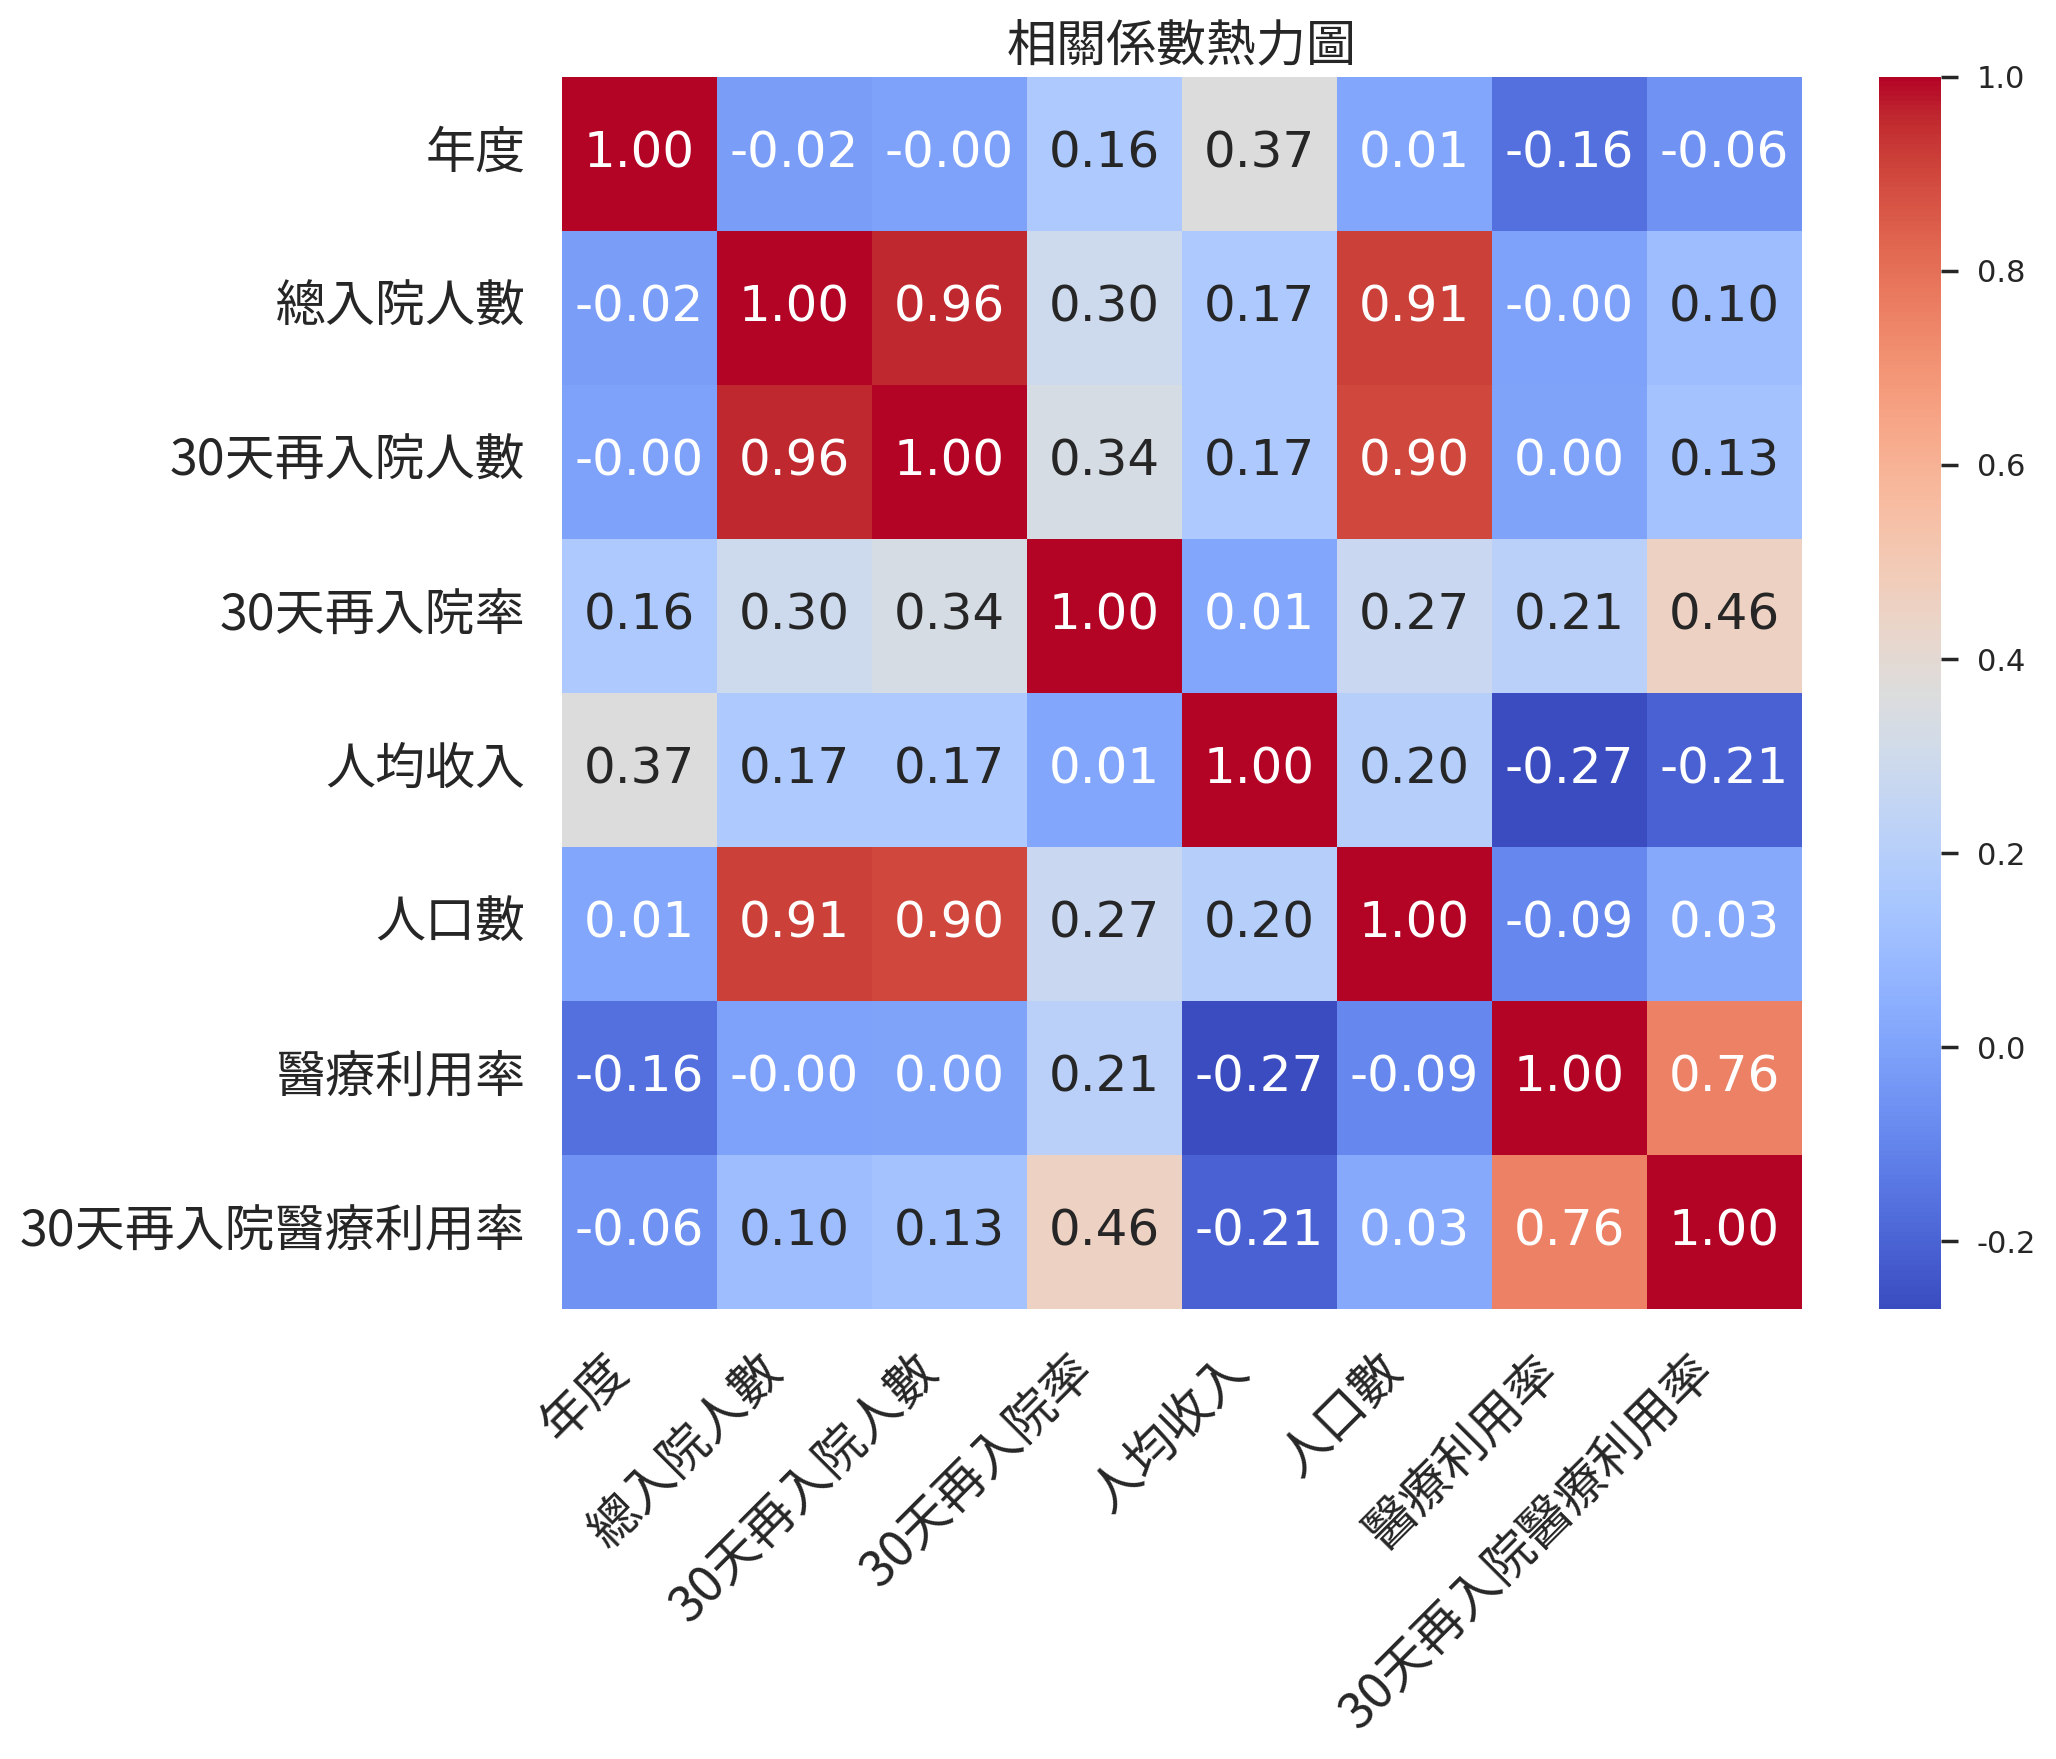

In [5]:
# Based on original code by Josh Haber
# Source: https://www.kaggle.com/code/joshhaber/eda-hospital-readmission-rates
features = [
    '年度', 
    '總入院人數', 
    '30天再入院人數',
    '30天再入院率',
    '人均收入', 
    '人口數',
    '醫療利用率',
    '30天再入院醫療利用率'
]
corr_matrix = hospital_chinese[features].corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 18})
plt.title("相關係數熱力圖", fontproperties=my_font, fontsize=18)
plt.xticks(fontproperties=my_font, rotation=45, ha='right', fontsize=18) 
plt.yticks(fontproperties=my_font, rotation=0, fontsize=18)
plt.show()

## 煮成份分析

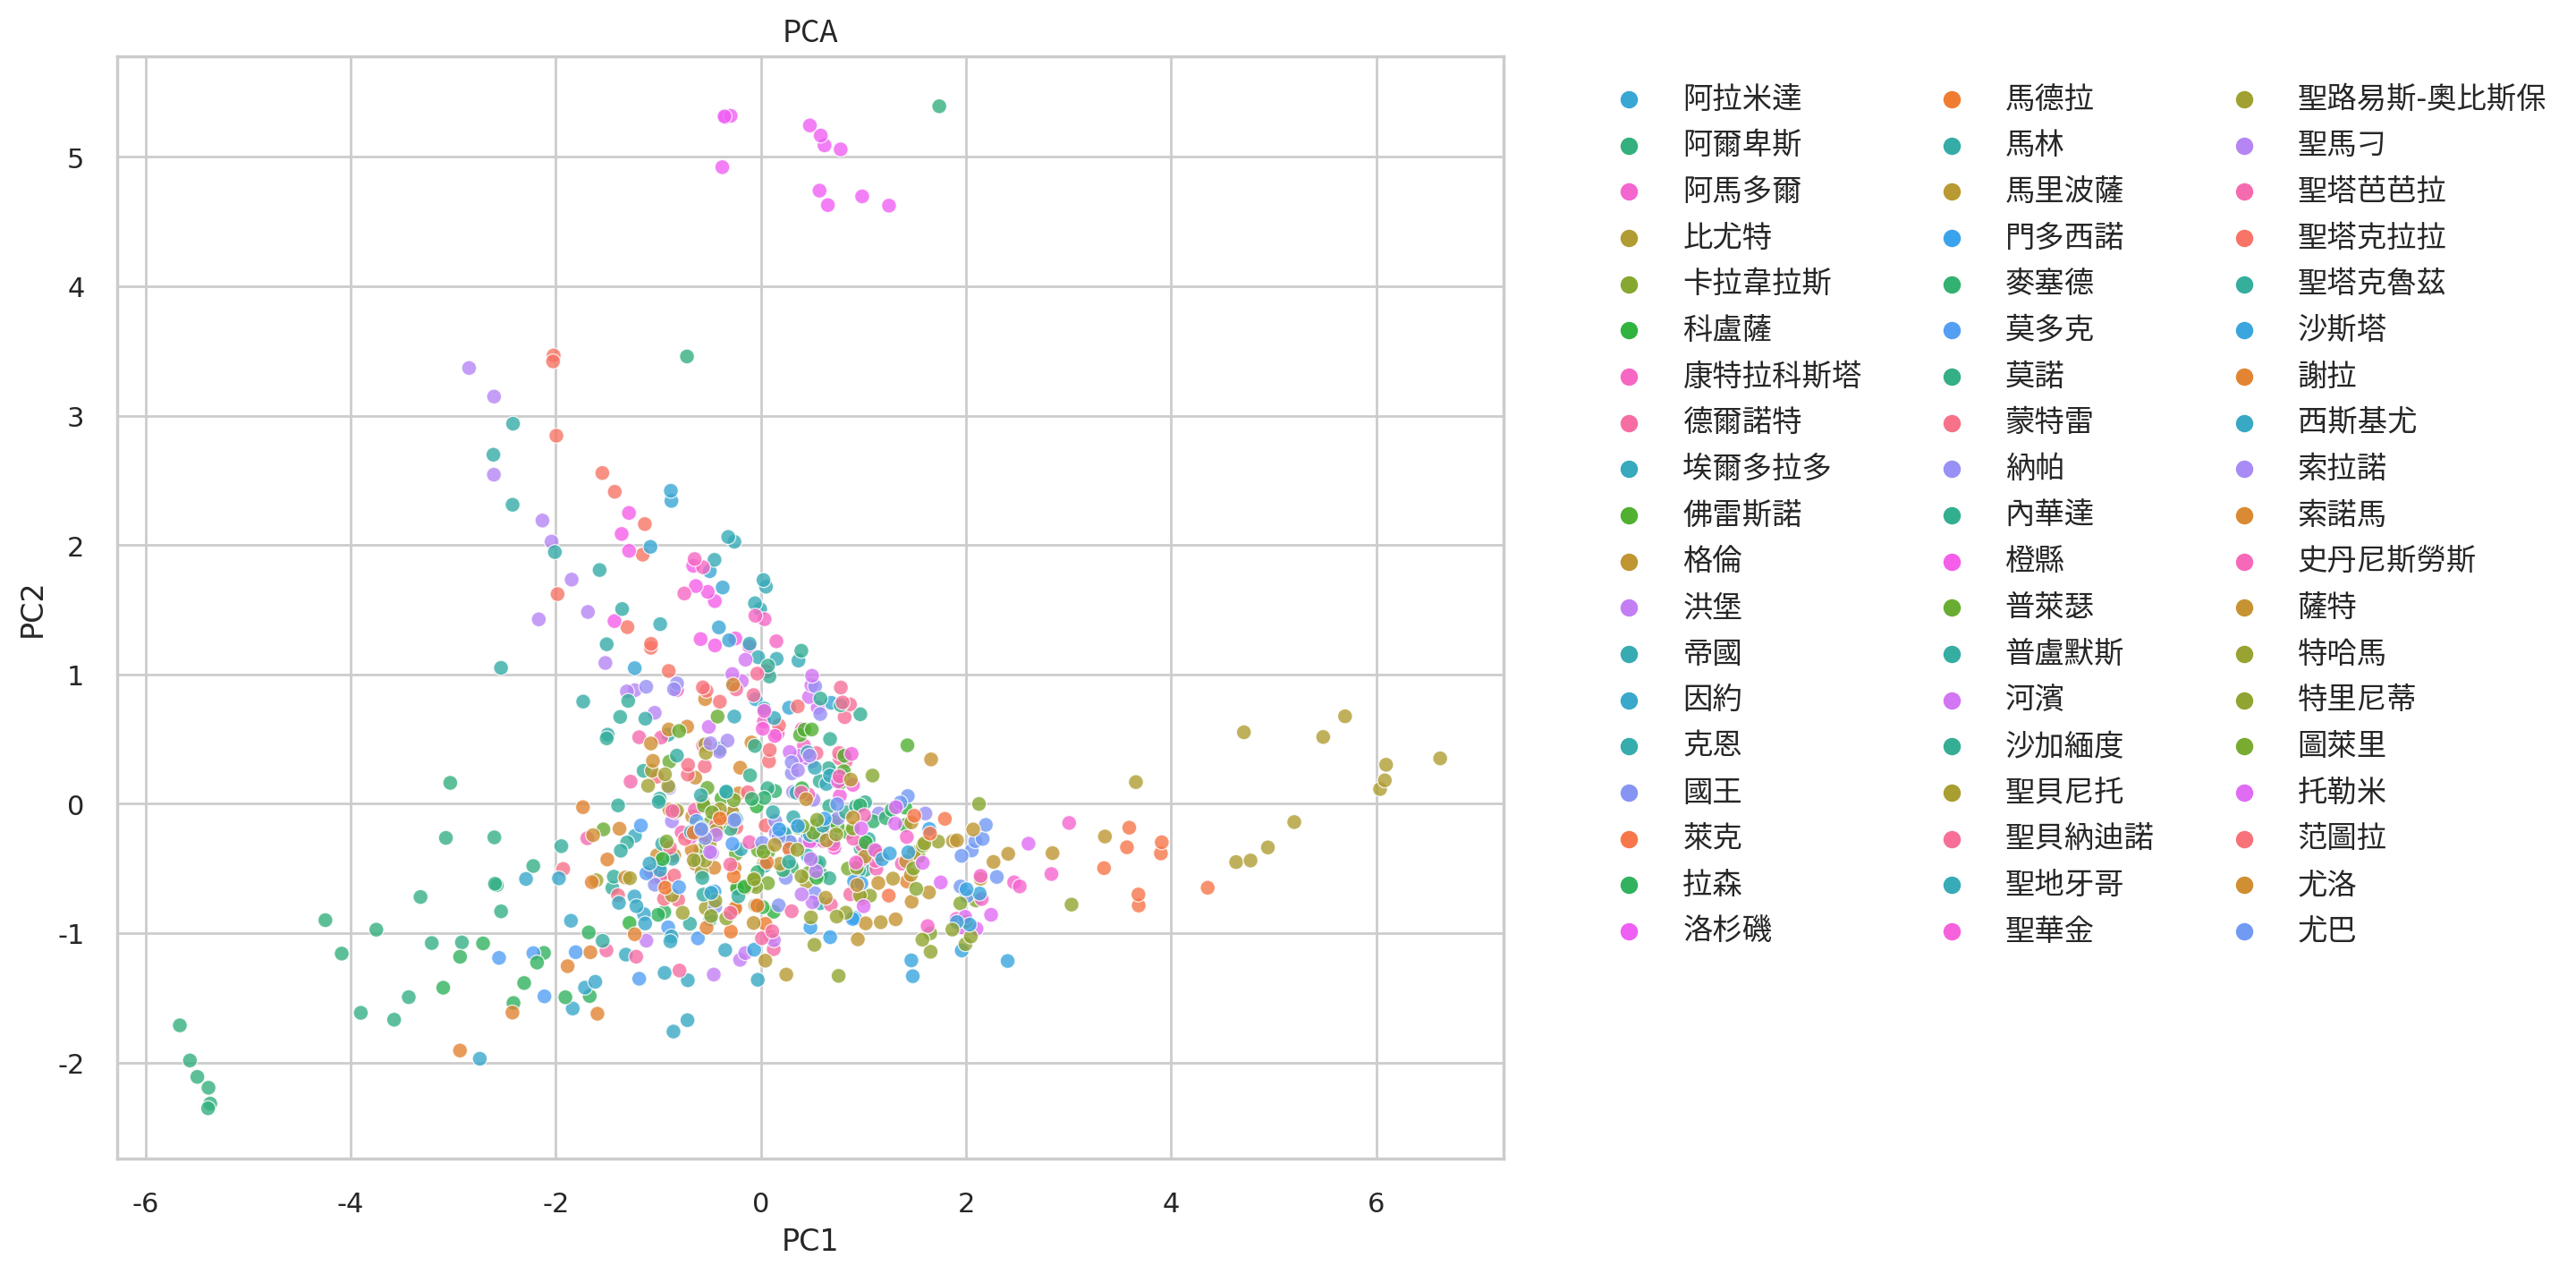

In [6]:
n_colors = 57
palette = sns.color_palette("husl", n_colors)
random.seed(42)  # 設定種子碼 (seed) 確保每次執行打散的結果都一樣，不會每次跑圖顏色都不一樣」
random.shuffle(palette)  # 將顏色順序隨機打散
numeric_cols = ['人均收入', '人口數', '醫療利用率', '30天再入院醫療利用率', '30天再入院率']
df_numeric = hospital_chinese[numeric_cols]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
pca = PCA(n_components=0.95) # 透過權重組合得到不同 y 變成新特徵
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(
    pca_result,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))]
)
pca_df['地區'] = hospital_chinese.reset_index()['地區']
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=pca_df,
    hue="地區",
    palette=palette,
    alpha=0.8
)
plt.title("PCA", fontsize=16, fontproperties=my_font)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, prop=my_font, ncol=3)
plt.grid(True)
plt.show()

In [7]:
display(pca_df)
print("每個主成分的解釋比例：", pca.explained_variance_ratio_)
print("前 4 個主成分累積解釋比例：", sum(pca.explained_variance_ratio_))

PC1       PC2       PC3       PC4     地區
0    0.686644  0.780415  0.222747  0.308988   阿拉米達
1   -3.750287 -0.972741  0.361780  0.161262   阿爾卑斯
2    1.908207 -0.888786  0.052015 -0.528719   阿馬多爾
3    4.634737 -0.450236 -0.339133 -0.933145    比尤特
4    1.652286 -1.000692  0.045355 -0.827469  卡拉韋拉斯
..        ...       ...       ...       ...    ...
679 -0.919232 -0.291173  0.232968  0.336657    圖萊里
680  1.317328 -0.026344 -0.594464 -0.018973    托勒米
681 -0.565796  0.899829 -0.722378  0.058451    范圖拉
682 -1.072295  0.466255 -0.580176  0.863182     尤洛
683  0.744900 -0.002995 -0.371100  0.520775     尤巴

[684 rows x 5 columns]

每個主成分的解釋比例： [0.47671483 0.25599912 0.15872589 0.10240008]
前 4 個主成分累積解釋比例： 0.9938399303088148


## 因素負荷量檢視

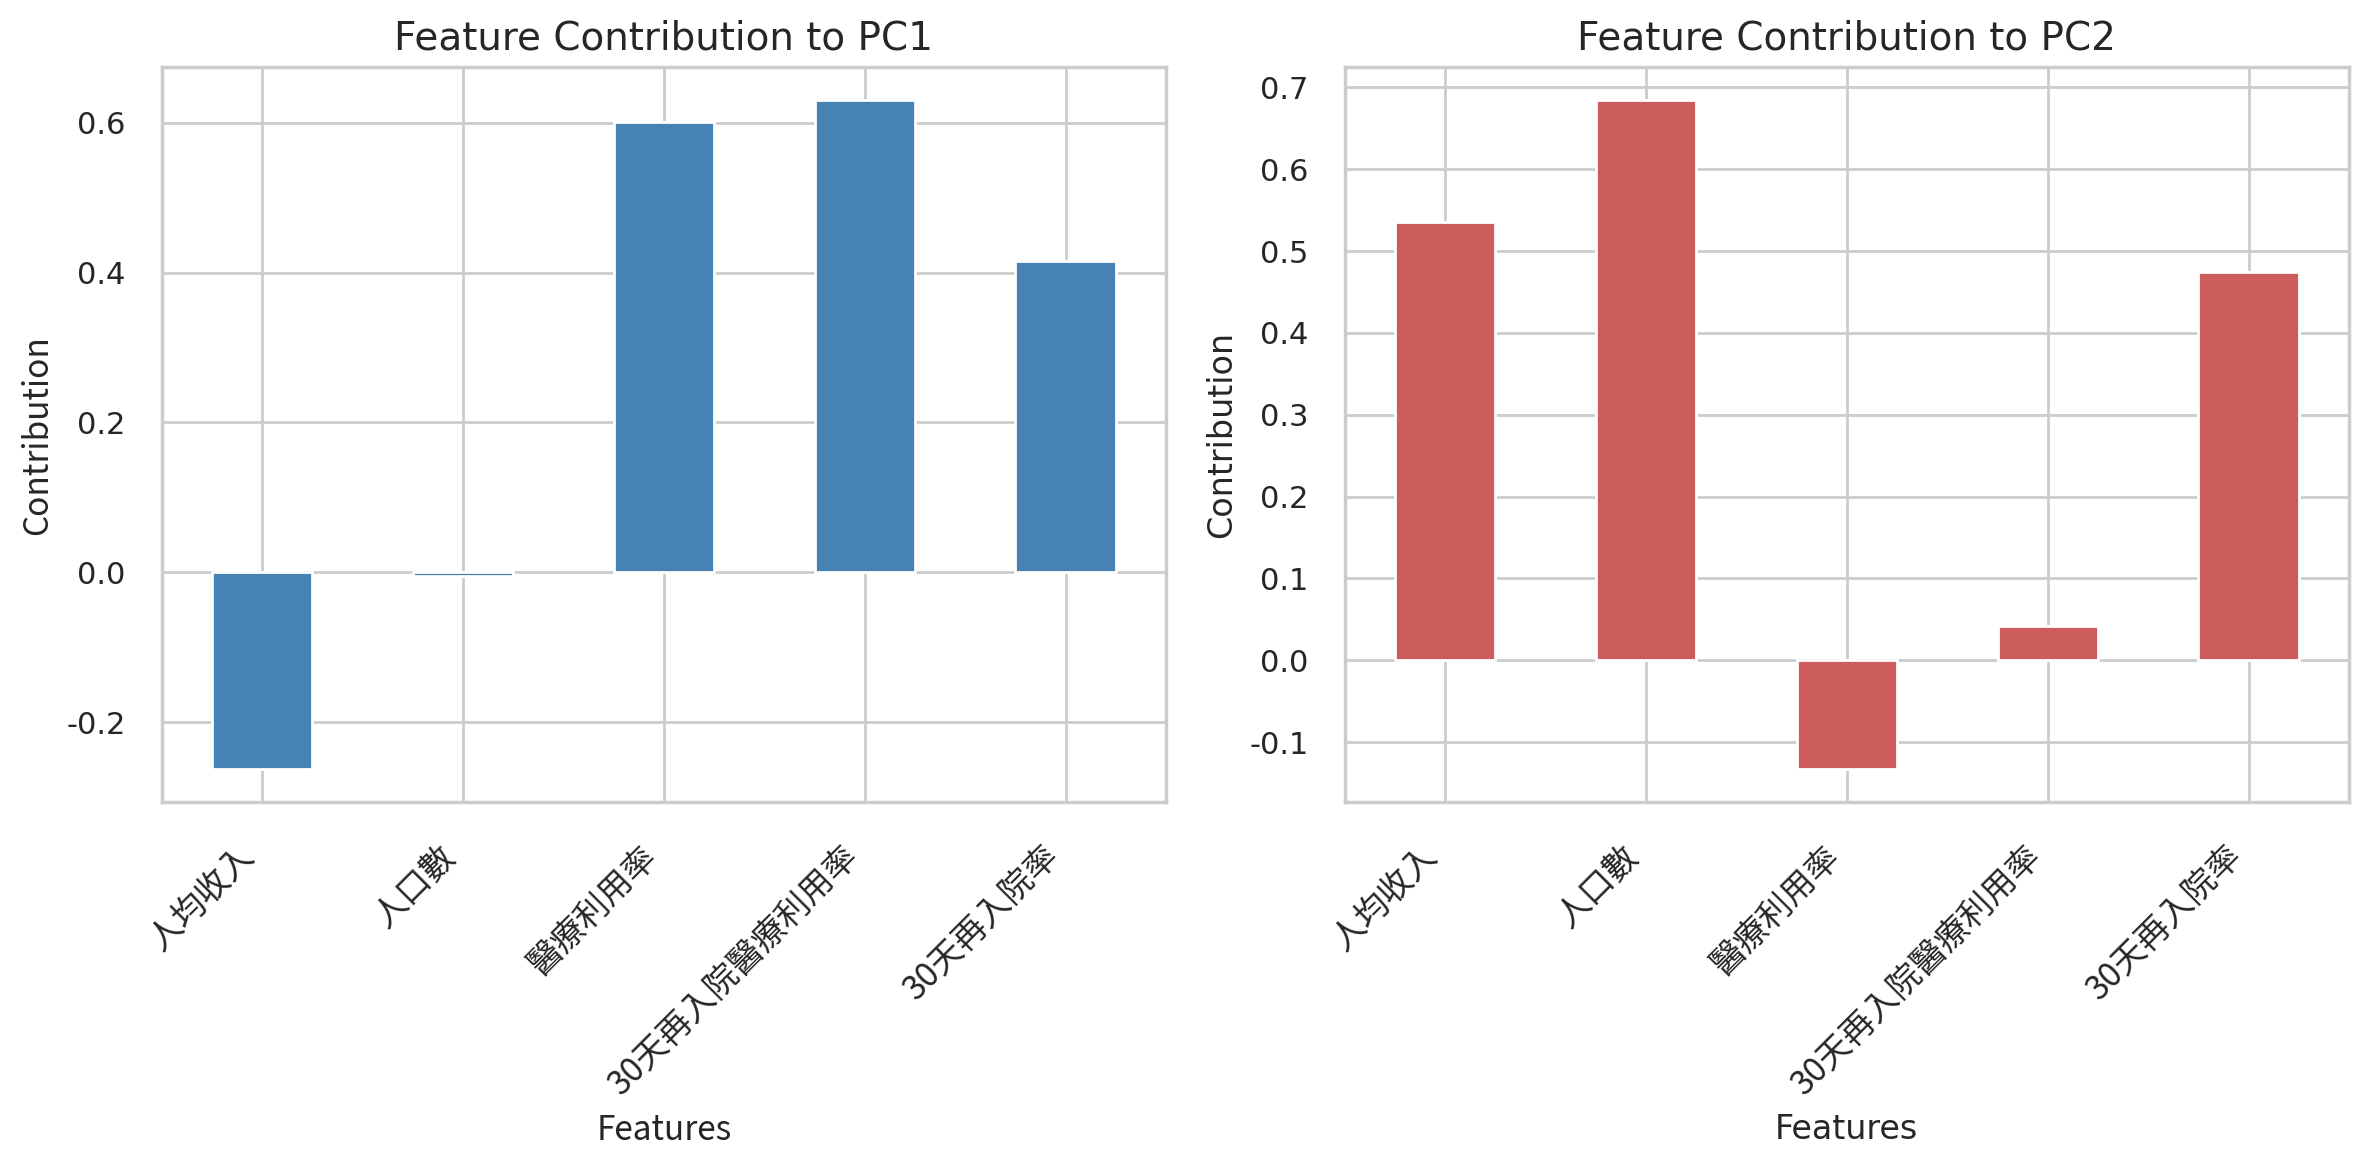

In [8]:
# Extract PCA loadings (components)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align features with components
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=numeric_cols  # Feature names as the index
)

# Step 4: Visualize Feature Contributions for PC1 and PC2
plt.figure(figsize=(12, 6))

# Bar plot for PC1
plt.subplot(1, 2, 1)
loadings["PC1"].plot(kind='bar', color='steelblue')
plt.title("Feature Contribution to PC1", fontsize=14)
plt.ylabel("Contribution", fontsize=12, fontproperties=my_font)
plt.xlabel("Features", fontsize=12, fontproperties=my_font)
plt.xticks(rotation=45, ha='right', fontproperties=my_font)

# Bar plot for PC2
plt.subplot(1, 2, 2)
loadings["PC2"].plot(kind='bar', color='indianred')
plt.title("Feature Contribution to PC2", fontsize=14)
plt.ylabel("Contribution", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right', fontproperties=my_font)
plt.tight_layout()
plt.show()

## K-Means 分群分析 & 肘部法 & 輪廓係數 尋找最佳 K 值

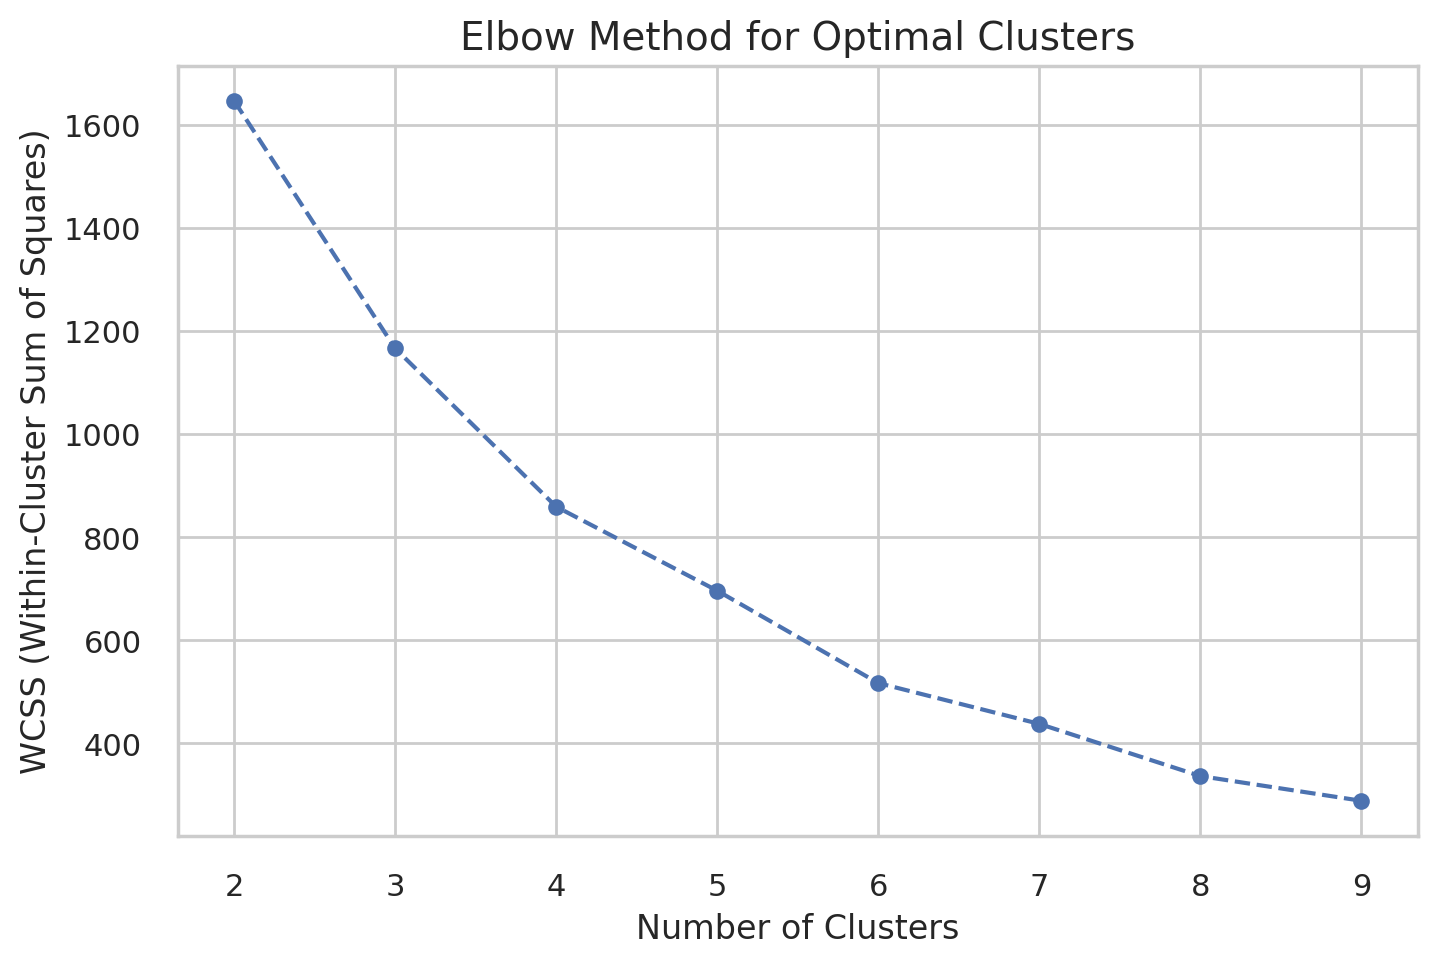

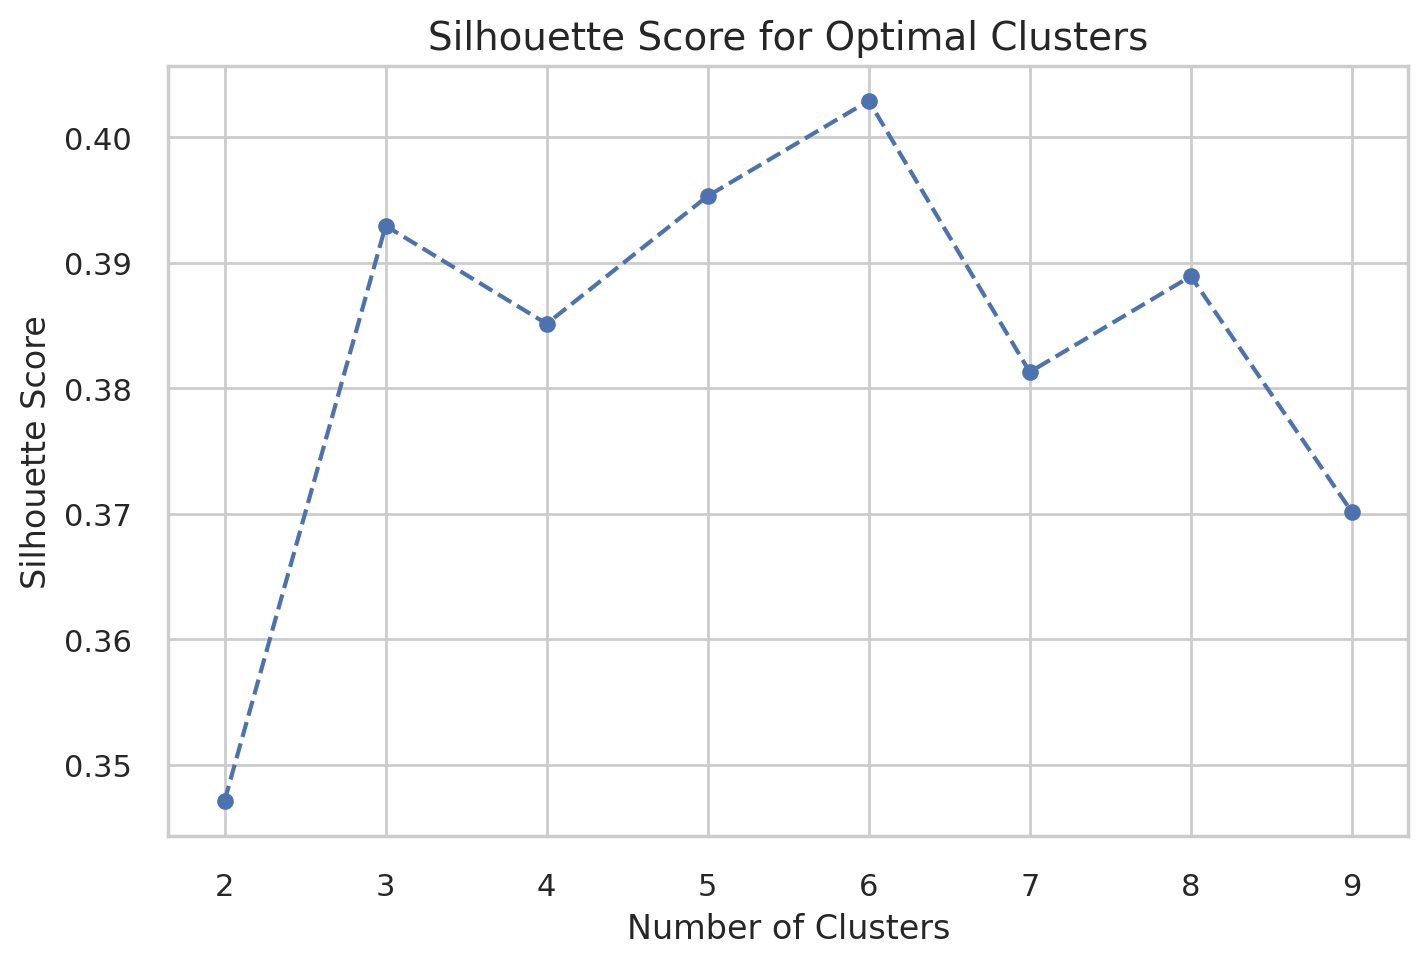

In [9]:
# Prepare data (PC1 and PC2 for clustering)
pca_data = pca_df[['PC1', 'PC2']]

# Elbow Method
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=12)
plt.grid(True)
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid(True)
plt.show()

## 分群結果

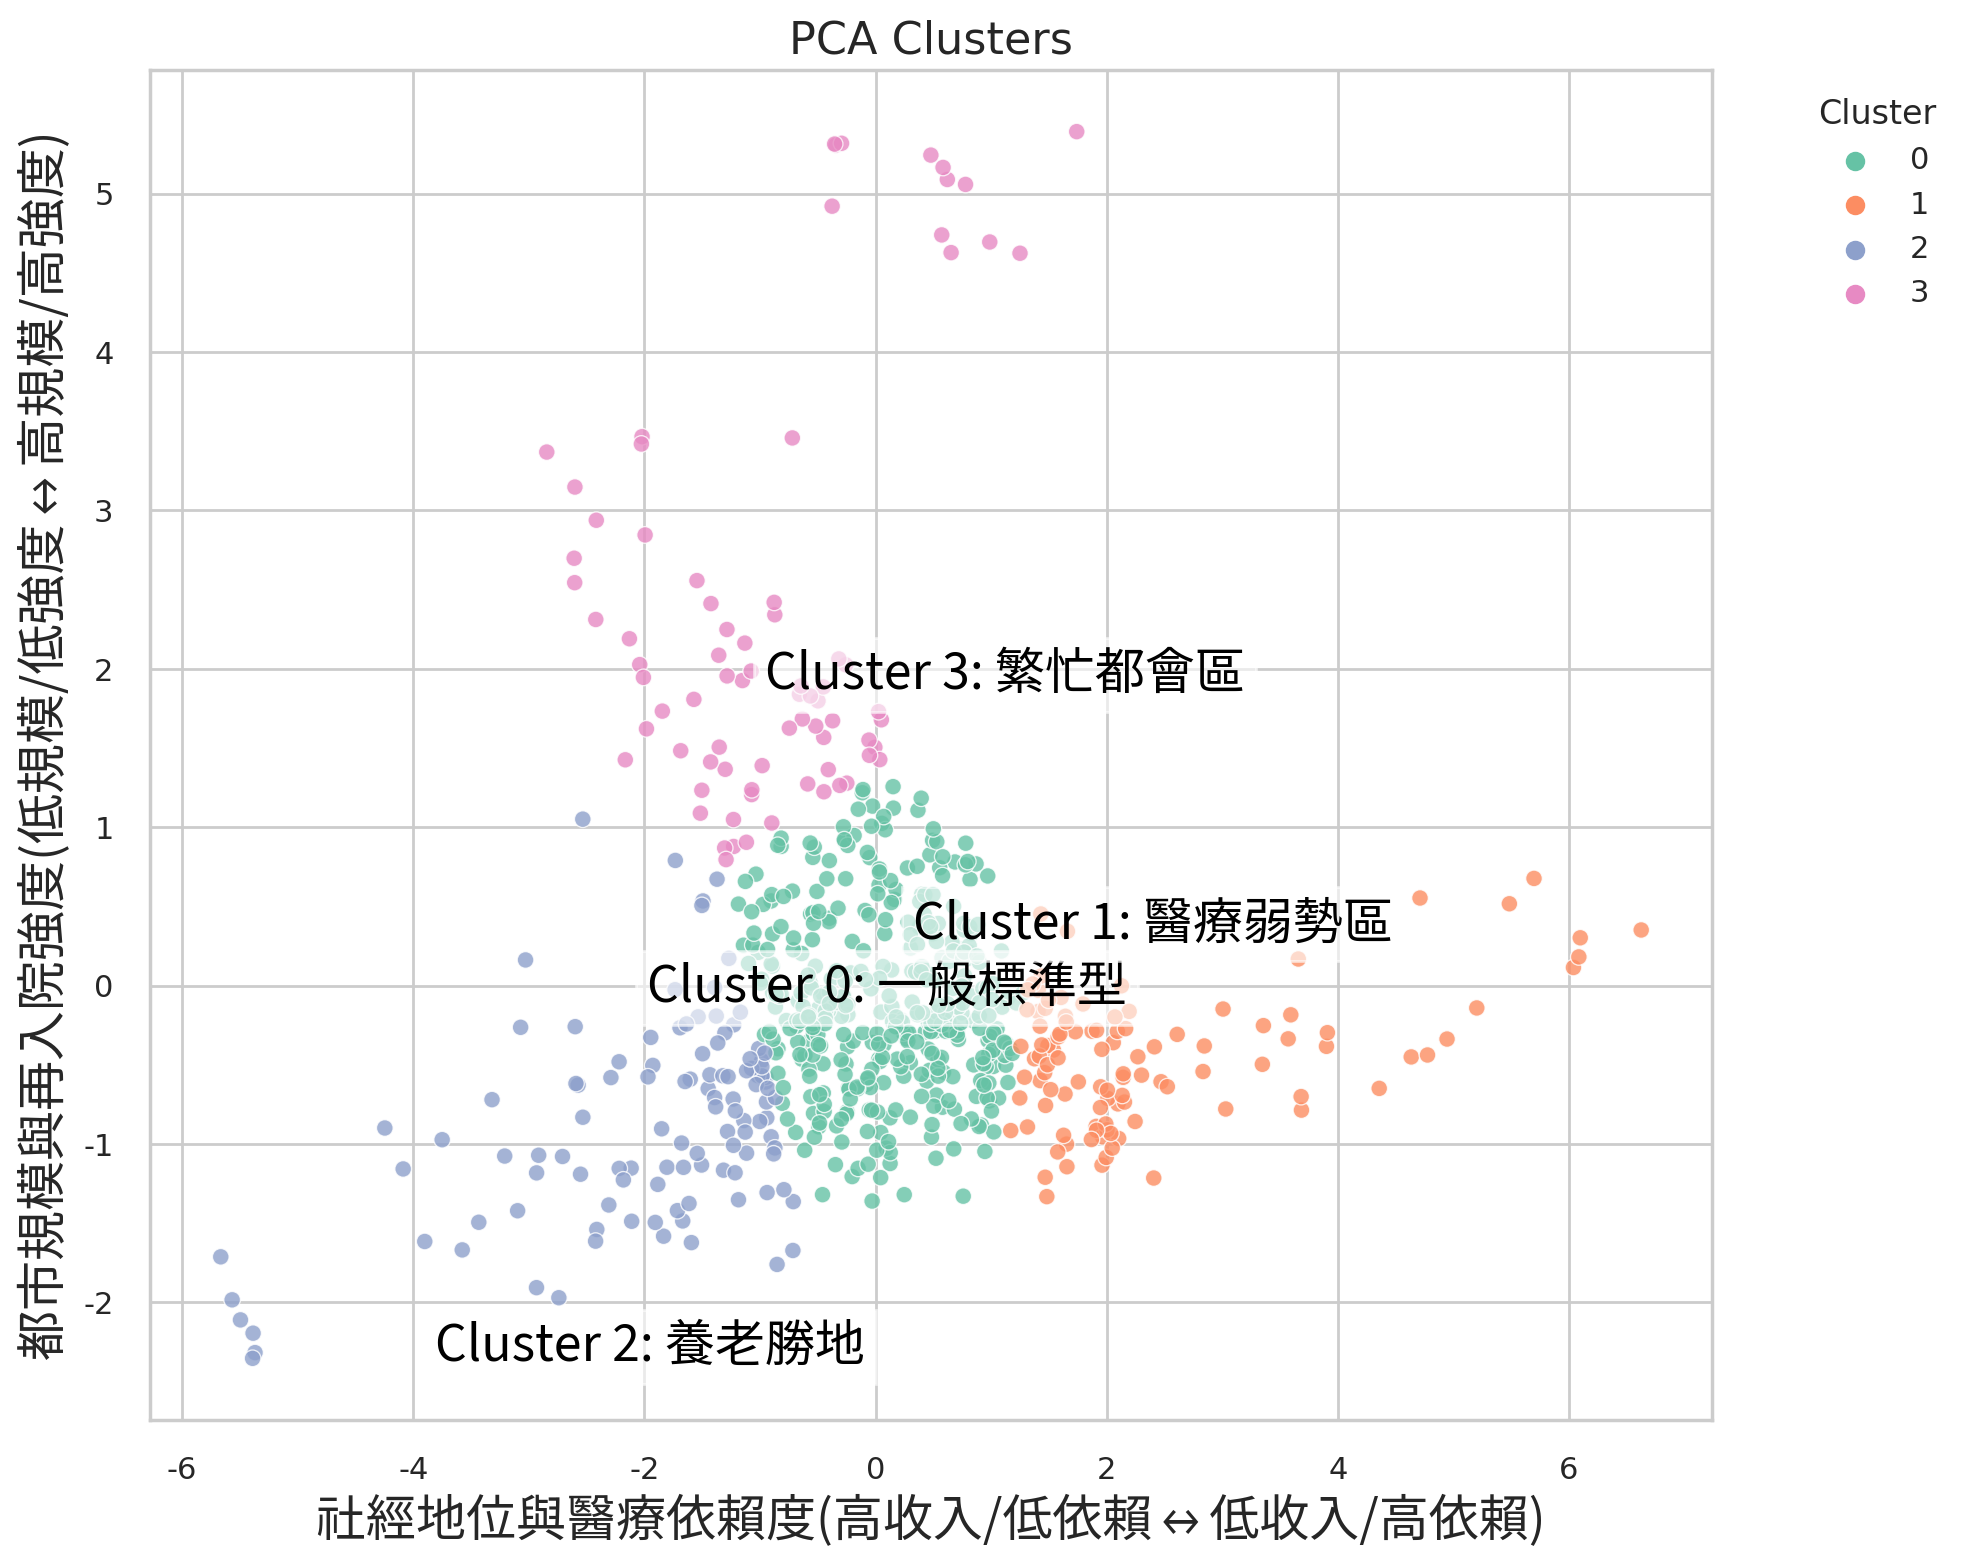

In [10]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Define interpretations for each cluster
cluster_interpretations = {
    0: "一般標準型",  # 
    1: "醫療弱勢區",  # 低人口、低收入
    2: "養老勝地",  # 低人口、高收入、低再入院率
    3: "繁忙都會區"  # "高人口、高醫療使用率"
}

# Visualize Clusters on PCA Plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=pca_df,
    palette='Set2', alpha=0.8
)
plt.title("PCA Clusters", fontsize=16)
plt.xlabel("社經地位與醫療依賴度(高收入/低依賴 ↔ 低收入/高依賴)", fontsize=18, fontproperties=my_font)
plt.ylabel("都市規模與再入院強度(低規模/低強度 ↔ 高規模/高強度)", fontsize=18, fontproperties=my_font)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add cluster interpretation text to the plot
# Adjust the positions of the cluster interpretation text
for cluster_id, interpretation in cluster_interpretations.items():
    # Get the cluster center from K-Means
    cluster_center = kmeans.cluster_centers_[cluster_id]

    # Adjust text positions for specific clusters
    if cluster_id == 2:  # Move Cluster 2 down
        cluster_center[1] -= 1.5
    elif cluster_id == 3:  # Move Cluster 3 to the right
        cluster_center[0] += 2
        cluster_center[1] -= .5
    elif cluster_id == 1: 
        cluster_center[1] += .75

    # Add the text to the plot
    plt.text(
        cluster_center[0], cluster_center[1],  # Position
        f"Cluster {cluster_id}: {interpretation}",
        fontsize=18, color='black', ha='center', bbox=dict(facecolor='white', alpha=0.6), fontproperties=my_font 
    )


plt.grid(True)
plt.tight_layout()
plt.show()

## 針對收入的普通最小平方法（OLS）迴歸的中介分析來驗證

Mediator Model 1 (30-day Readmits Proportion ~ PCPI):
                                    OLS Regression Results                                   
Dep. Variable:     Q('30-day Readmits (Proportion)')   R-squared:                       0.069
Model:                                           OLS   Adj. R-squared:                  0.068
Method:                                Least Squares   F-statistic:                     50.76
Date:                               Sun, 14 Dec 2025   Prob (F-statistic):           2.66e-12
Time:                                       02:23:16   Log-Likelihood:                 3156.4
No. Observations:                                684   AIC:                            -6309.
Df Residuals:                                    682   BIC:                            -6300.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
      

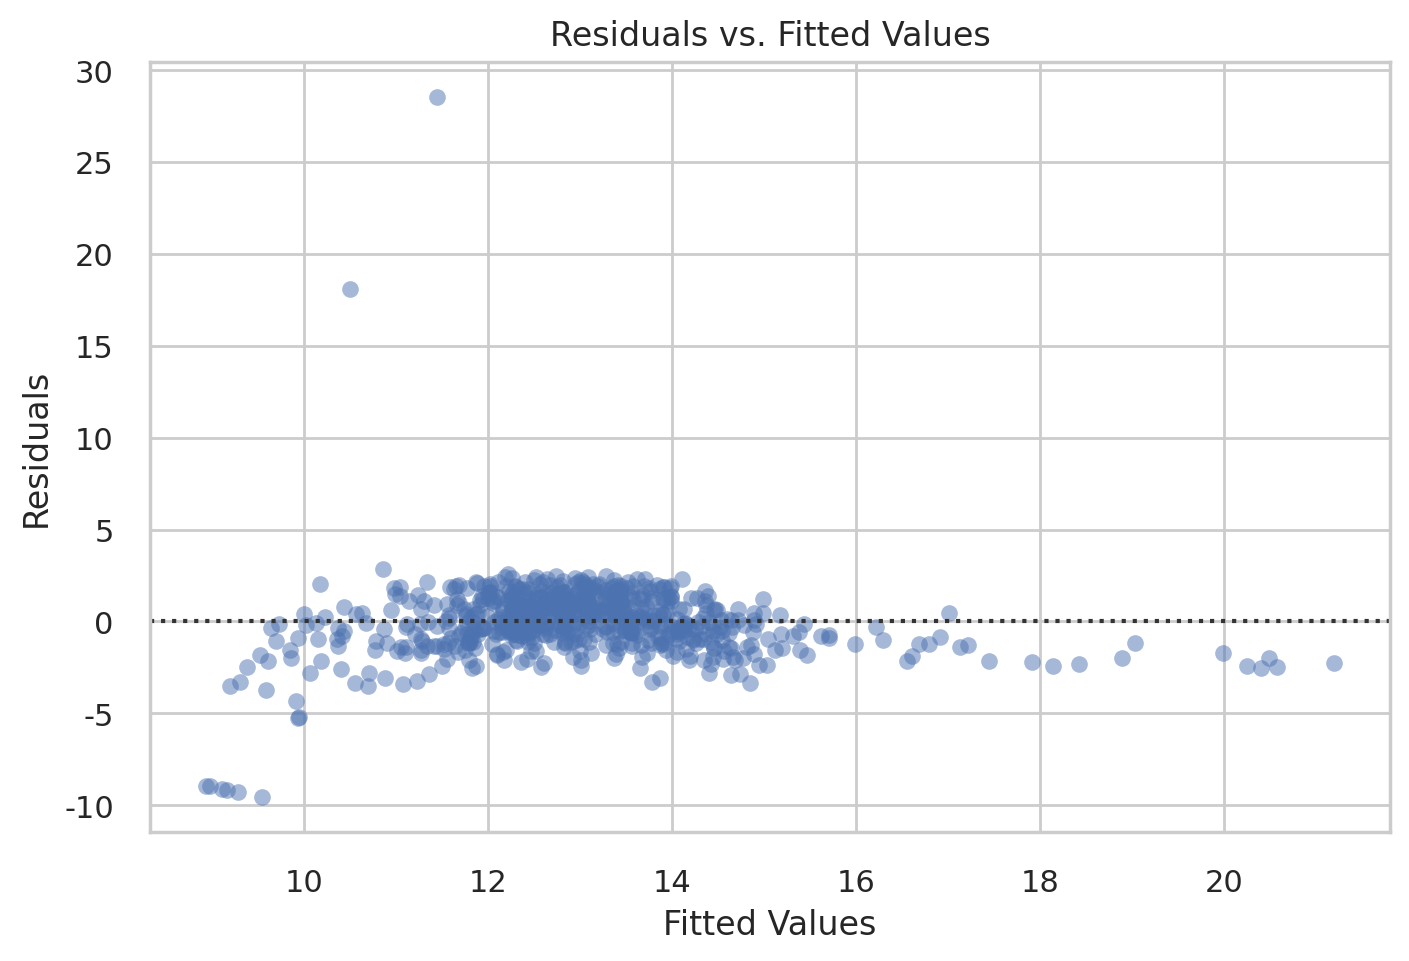

In [11]:
# Step 1: Regress mediator (30-day Readmits Proportion) on PCPI
mediator_model1 = smf.ols("Q('30-day Readmits (Proportion)') ~ PCPI", data=hospital).fit()

# Step 2: Regress outcome (30-day Readmission Rate) on PCPI and 30-day Readmits Proportion
outcome_model1 = smf.ols(
    "Q('30-day Readmission Rate (Consolidated)') ~ PCPI + Q('30-day Readmits (Proportion)')",
    data=hospital
).fit()

# Display Results
print("Mediator Model 1 (30-day Readmits Proportion ~ PCPI):")
print(mediator_model1.summary())
# P 值小於 0.05 => 顯著影響
# t 值絕對值要大於 2
# coef 代表正相關 or 負相關
# 有 0.95 的信心在 0.025 ~ 0.975 區間
# Intercept 截距(收入為 0 時的偏差值)

print("\nOutcome Model 1 (Readmission Rate ~ PCPI + 30-day Readmits Proportion):")
print(outcome_model1.summary())
# 人均收入⬆️ => 30 天入院使用率⬇️ => 有錢可以變健康
# 人均收入⬆️ => 30 天再入院率⬆️ => 有錢可以跑醫院
# 30 天入院使用率⬇️ => 30 天再入院率⬇️ => 健康所以沒有再入院
# 30 天入院使用率⬆️ => 30 天再入院率⬆️ => 不健康所以再入院
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製殘差圖，檢查模型假設是否滿足
fig, ax = plt.subplots(figsize=(8, 5))
sns.residplot(x=outcome_model1.fittedvalues, y=outcome_model1.resid, ax=ax, scatter_kws={'alpha': 0.5})
ax.set_xlabel("Fitted Values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs. Fitted Values")
plt.show()

# 4. 我的研究

## 缺失值檢查

In [12]:
missing_counts = hospital.isnull().sum()
print("--- 各欄位缺失值數量 ---")
display(pd.DataFrame(missing_counts))

--- 各欄位缺失值數量 ---


0
Year                                    0
County                                  0
ICD Version                             0
Total Admits (Consolidated)             0
30-day Readmits (Consolidated)          0
30-day Readmission Rate (Consolidated)  0
PCPI                                    0
Population                              0
Total Admits (Proportion)               0
30-day Readmits (Proportion)            0

## *ICD 版本* **序數編碼**

In [13]:
from sklearn.preprocessing import OrdinalEncoder
icd_orders = [["ICD-9", "ICD-10"]]
oe = OrdinalEncoder(categories=icd_orders)
hospital['ICD Version(Ordinal)'] = oe.fit_transform(hospital['ICD Version'].to_frame()).astype(int)
display(hospital.iloc[:, [2, 10]])

ICD Version  ICD Version(Ordinal)
0         ICD-9                     0
1         ICD-9                     0
2         ICD-9                     0
3         ICD-9                     0
4         ICD-9                     0
..          ...                   ...
679      ICD-10                     1
680      ICD-10                     1
681      ICD-10                     1
682      ICD-10                     1
683      ICD-10                     1

[684 rows x 2 columns]

## 人口數頻率直方圖

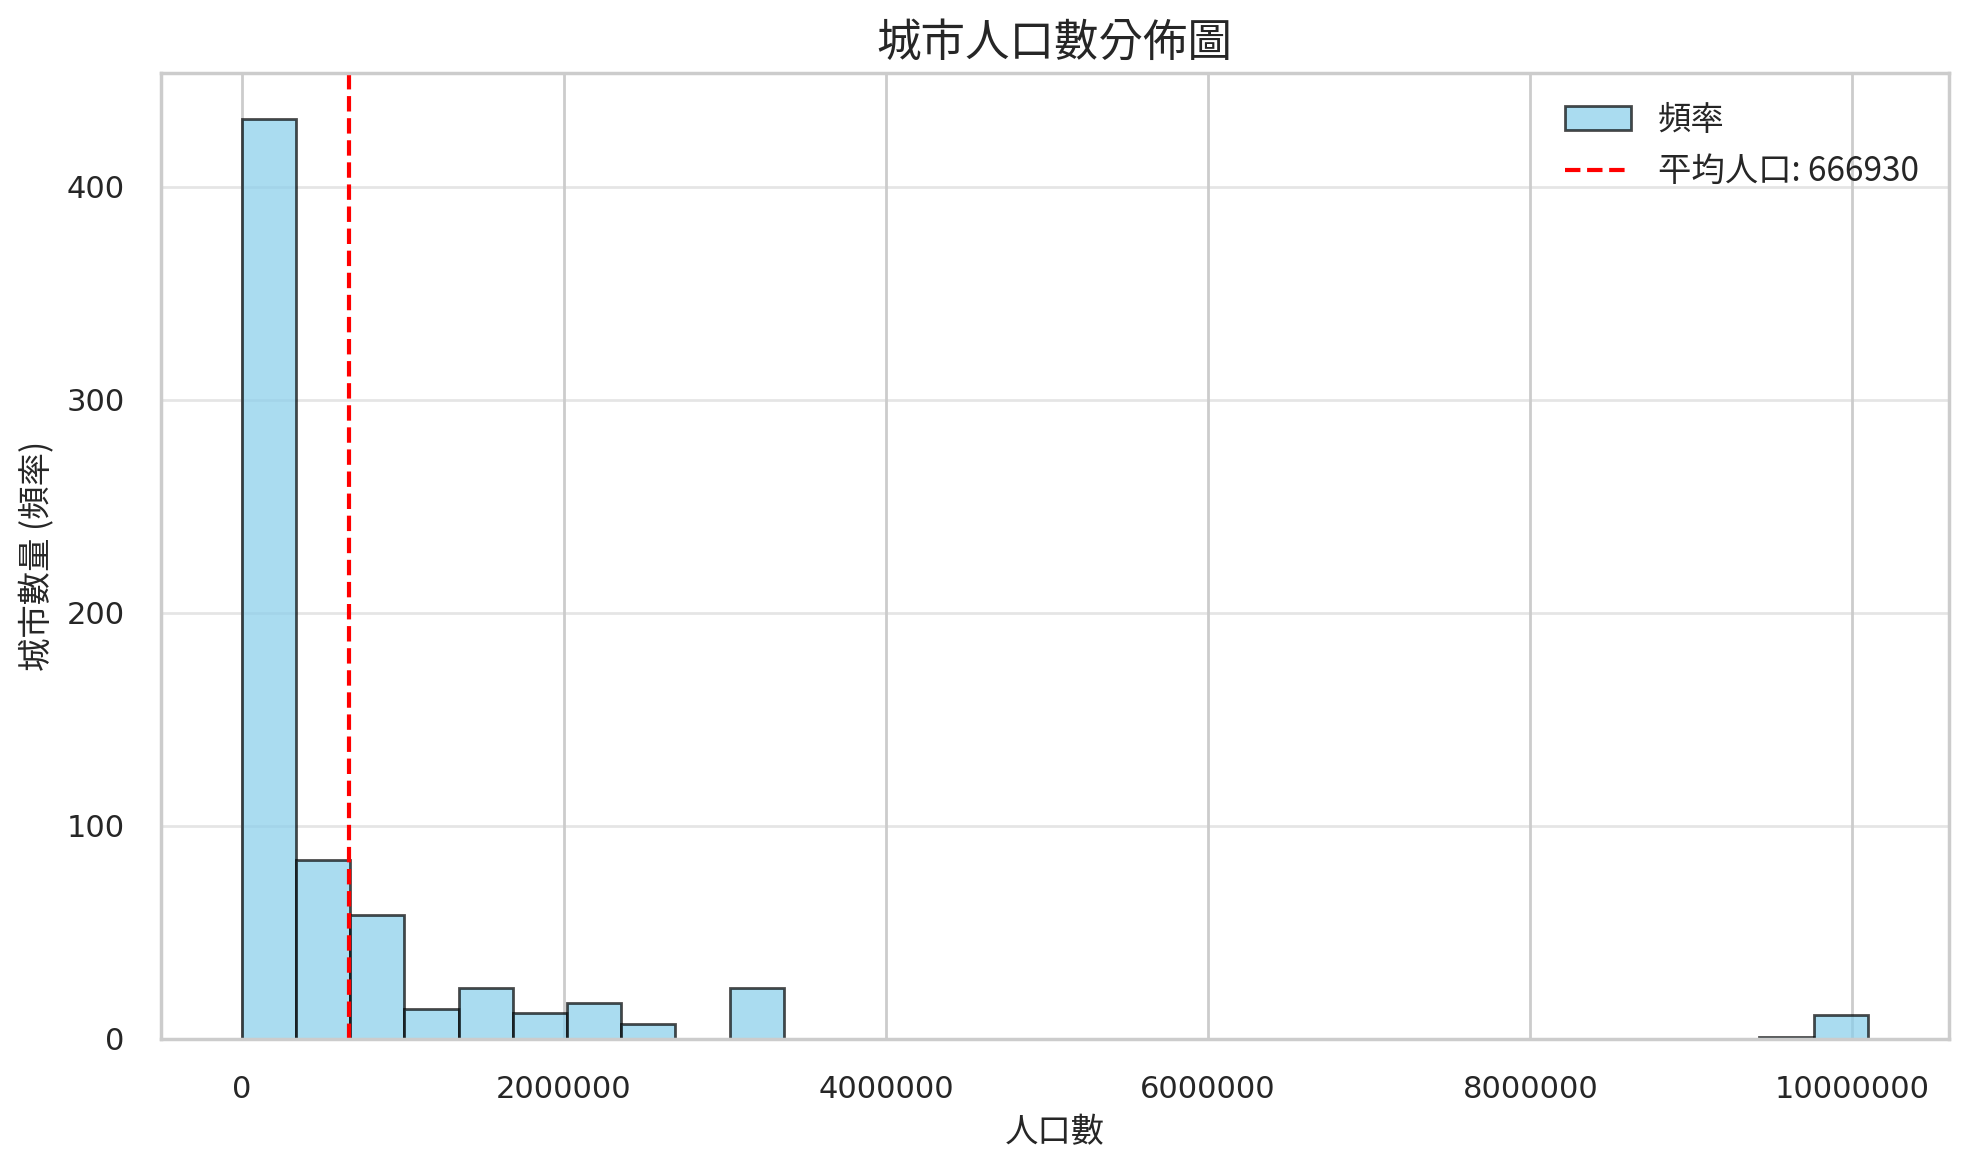

In [14]:
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital_chinese['人口數'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('城市人口數分佈圖', fontproperties=my_font, fontsize=16)
plt.xlabel('人口數', fontproperties=my_font, fontsize=12)
plt.ylabel('城市數量 (頻率)', fontproperties=my_font, fontsize=12)
mean_val = hospital_chinese['人口數'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'平均人口: {int(mean_val)}')
plt.legend(prop=my_font)
plt.grid(axis='y', alpha=0.5)
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()

## *人口數* **對數轉換**

In [15]:
import numpy as np
hospital['Population(log)'] = np.log1p(hospital['Population'])
display(hospital.iloc[:, [7, 11]])
# import numpy as np
# hospital_chinese['人口數(log)'] = np.log1p(hospital_chinese['人口數'])
# display(hospital_chinese.iloc[:, [7, 10]])

Population  Population(log)
0       1530893        14.241362
1          1093         6.997596
2         37539        10.533162
3        219983        12.301310
4         45159        10.717967
..          ...              ...
679      477884        13.077125
680       54587        10.907569
681      832871        13.632635
682      222018        12.310518
683       84353        11.342778

[684 rows x 2 columns]

## 人口數頻率直方圖(log)

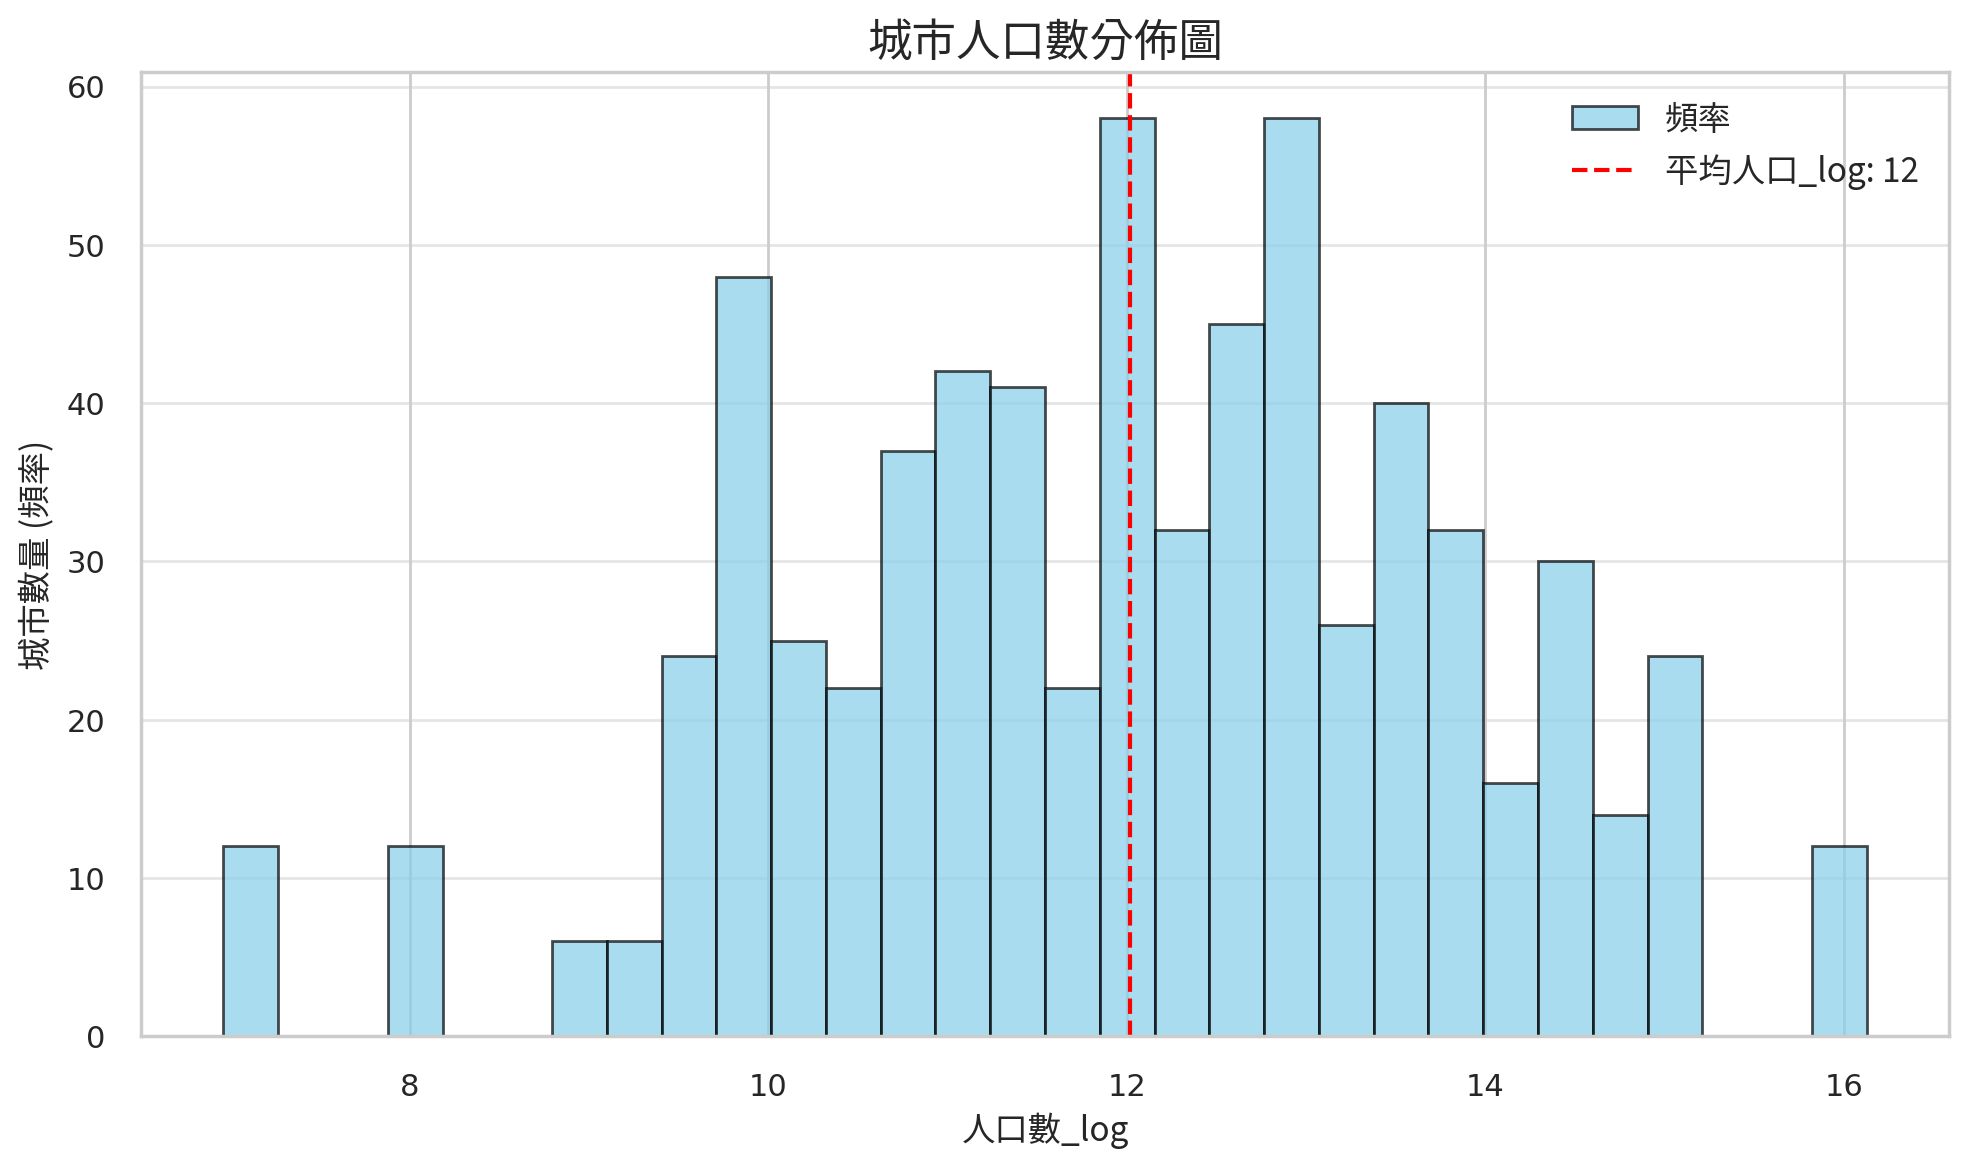

In [16]:
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital['Population(log)'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('城市人口數分佈圖', fontproperties=my_font, fontsize=16)
plt.xlabel('人口數_log', fontproperties=my_font, fontsize=12)
plt.ylabel('城市數量 (頻率)', fontproperties=my_font, fontsize=12)
mean_val = hospital['Population(log)'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'平均人口_log: {int(mean_val)}')
plt.legend(prop=my_font)
plt.grid(axis='y', alpha=0.5)
plt.ticklabel_format(style='plain')
plt.tight_layout()
plt.show()

## 人均個人收入直方圖

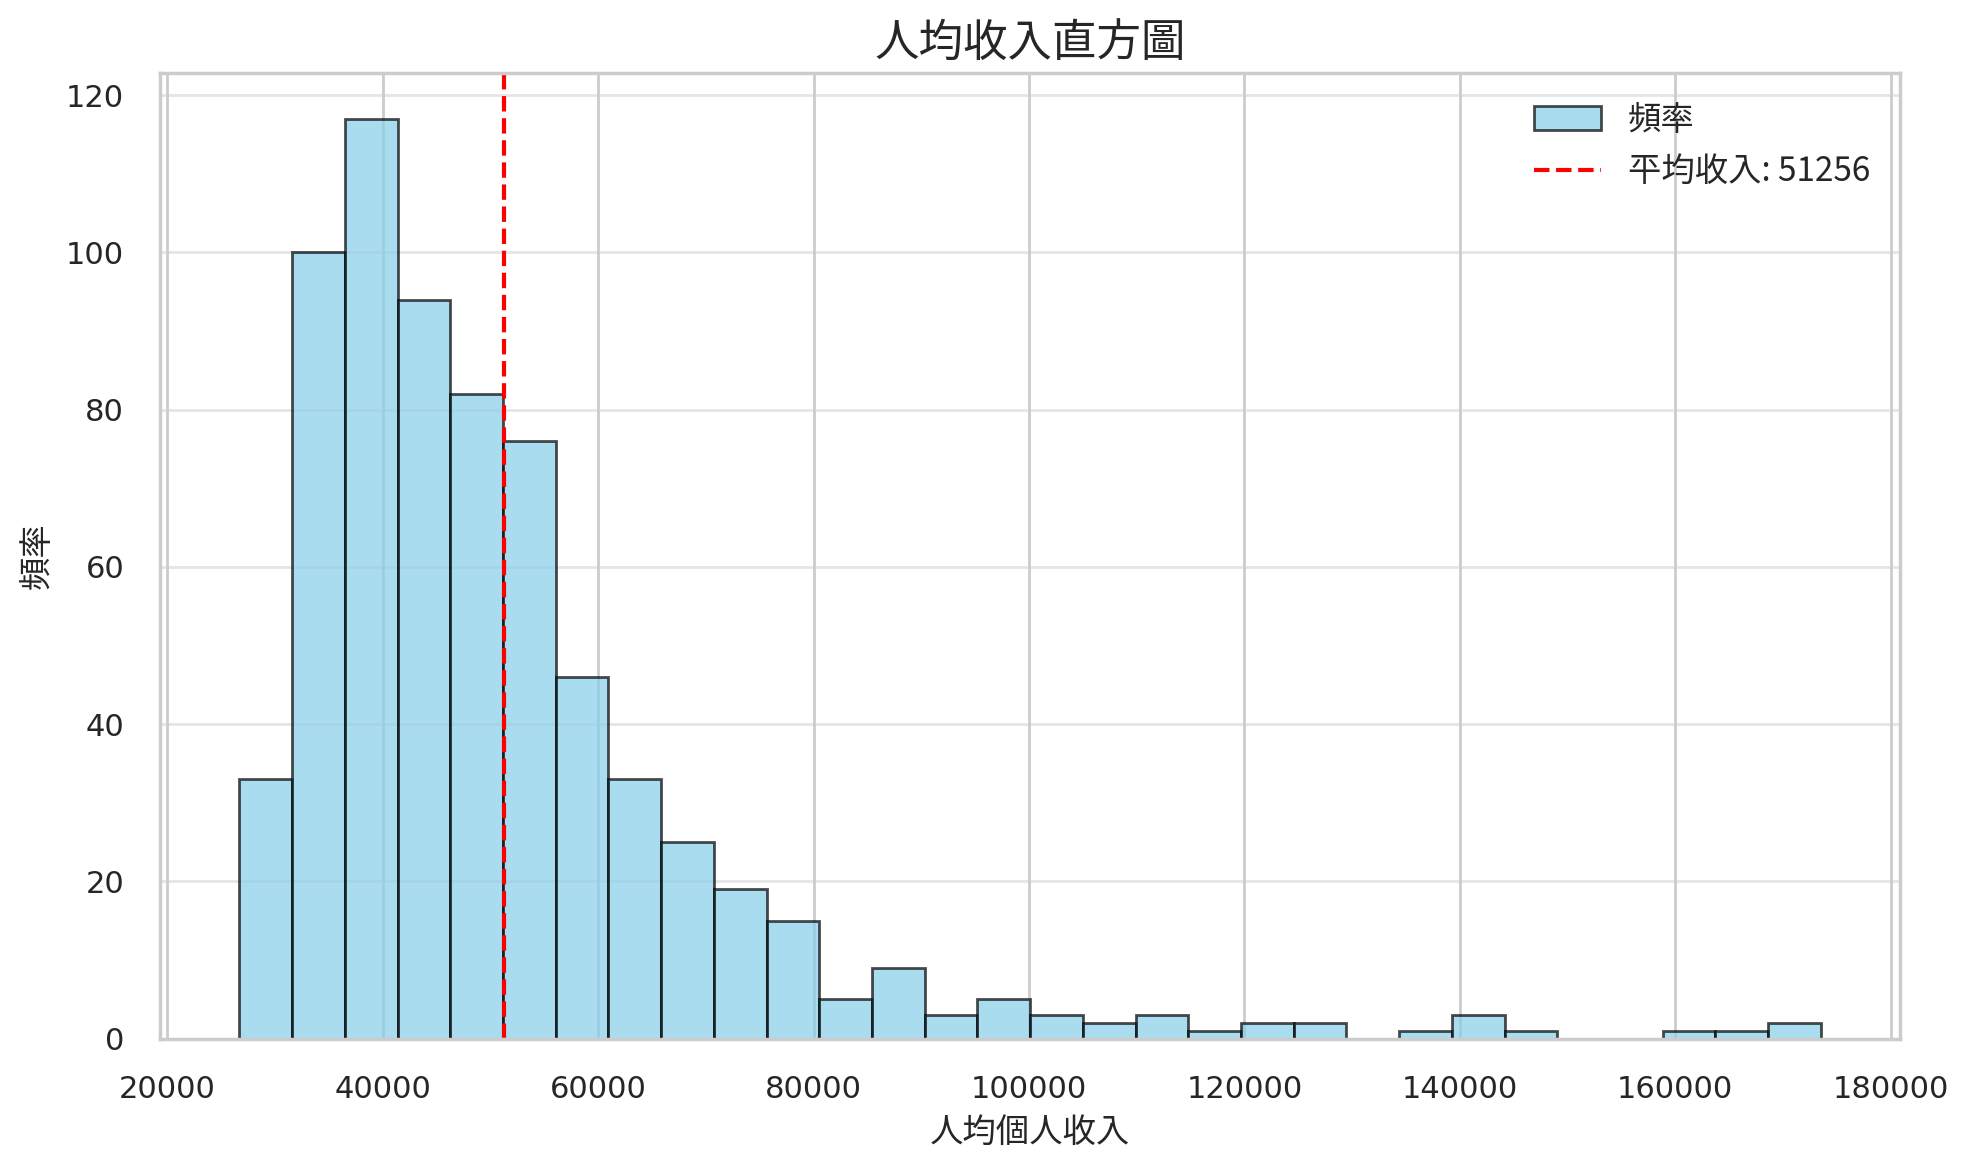

In [17]:
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital['PCPI'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('人均收入直方圖', fontproperties=my_font, fontsize=16)
plt.xlabel('人均個人收入', fontproperties=my_font, fontsize=12)
plt.ylabel('頻率', fontproperties=my_font, fontsize=12)
mean_val = hospital['PCPI'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'平均收入: {int(mean_val)}')
plt.legend(prop=my_font)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## *人均個人收入* **對數轉換**

In [18]:
import numpy as np
hospital['PCPI_log'] = np.log1p(hospital['PCPI'])
display(hospital.iloc[:, [6, 12]])

PCPI   PCPI_log
0    50432.0  10.828401
1    54040.0  10.897498
2    34847.0  10.458751
3    33669.0  10.424363
4    37516.0  10.532549
..       ...        ...
679  46995.0  10.757818
680  52565.0  10.869825
681  73994.0  11.211753
682  63544.0  11.059504
683  48398.0  10.787234

[684 rows x 2 columns]

## 人均個人收入直方圖(log)

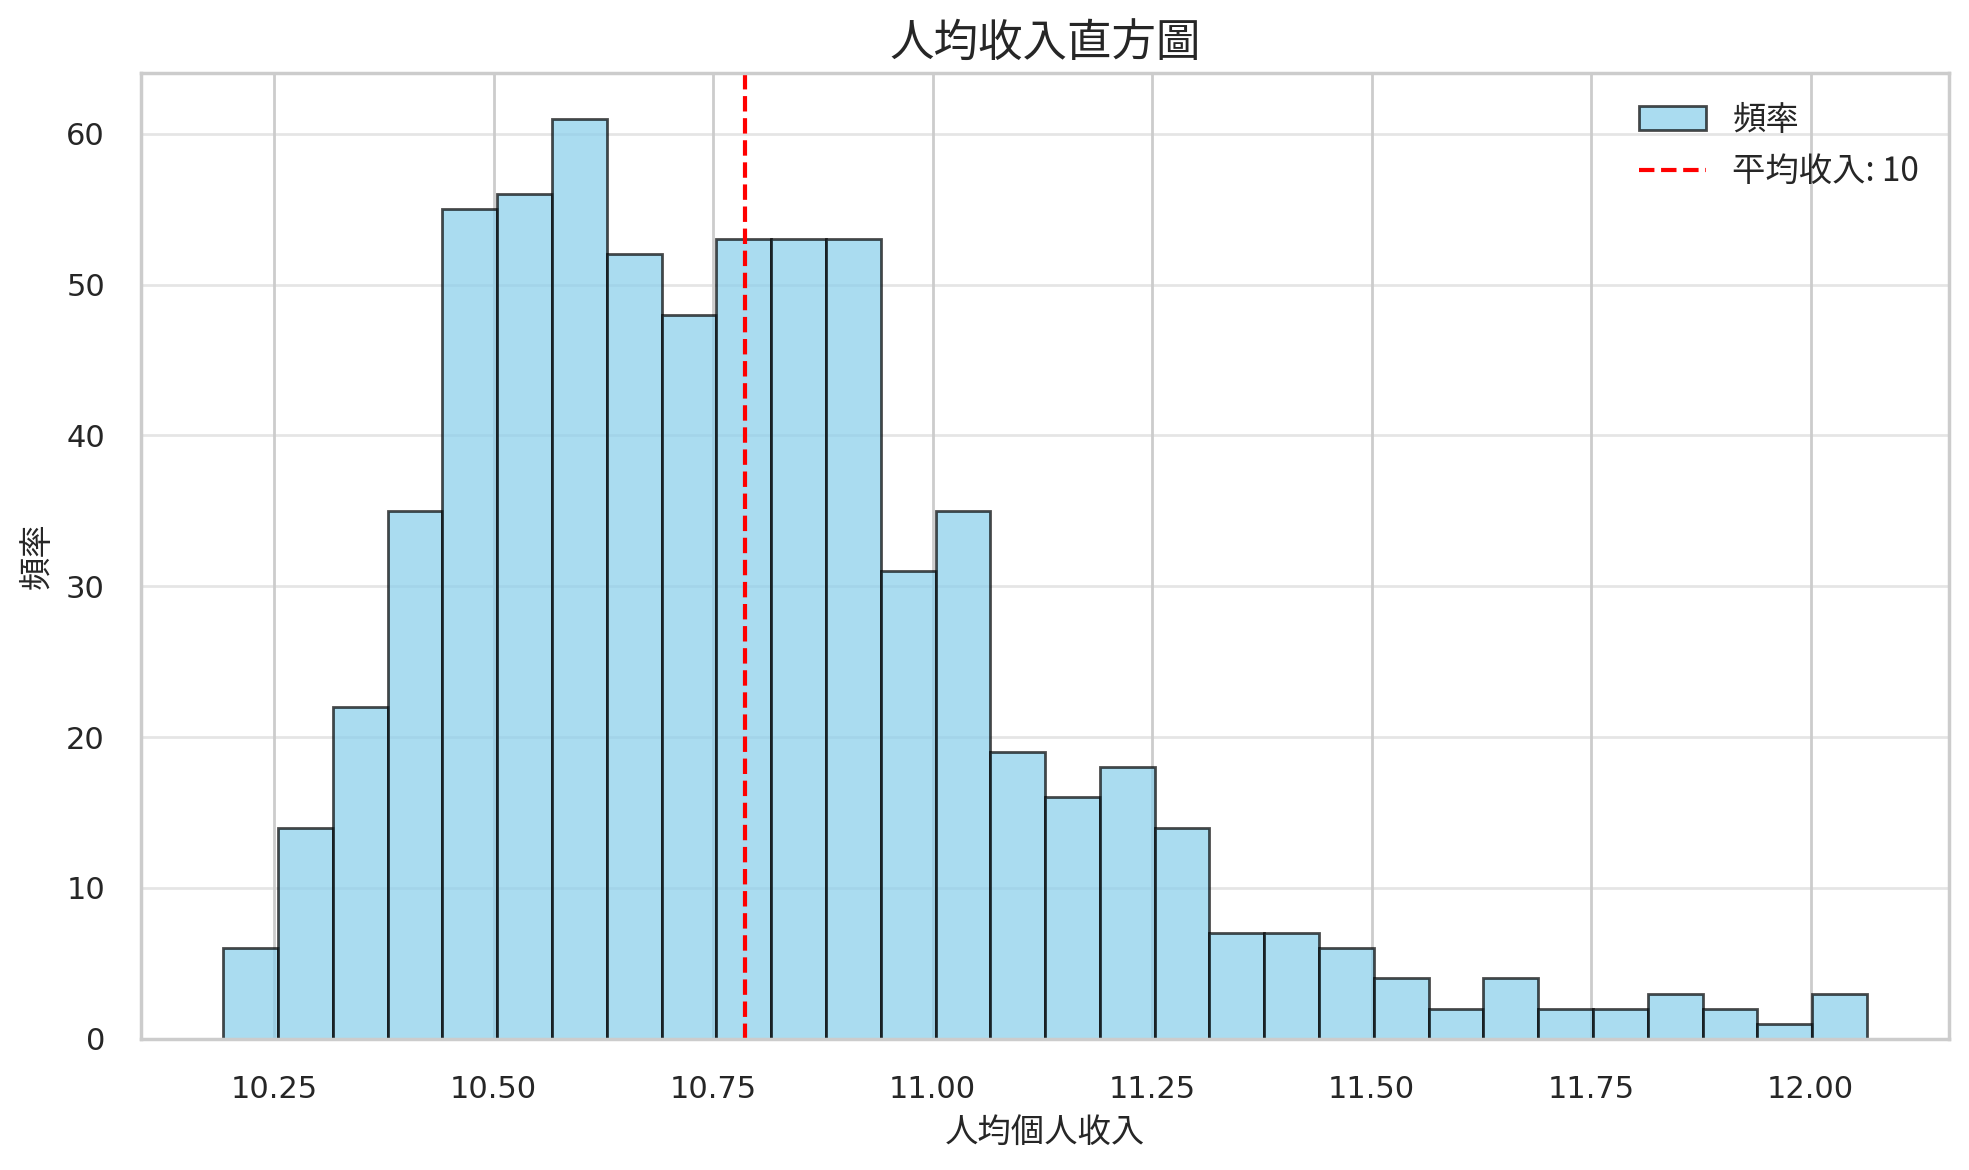

In [19]:
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital['PCPI_log'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('人均收入直方圖', fontproperties=my_font, fontsize=16)
plt.xlabel('人均個人收入', fontproperties=my_font, fontsize=12)
plt.ylabel('頻率', fontproperties=my_font, fontsize=12)
mean_val = hospital['PCPI_log'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'平均收入: {int(mean_val)}')
plt.legend(prop=my_font)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## 總入院數直方圖

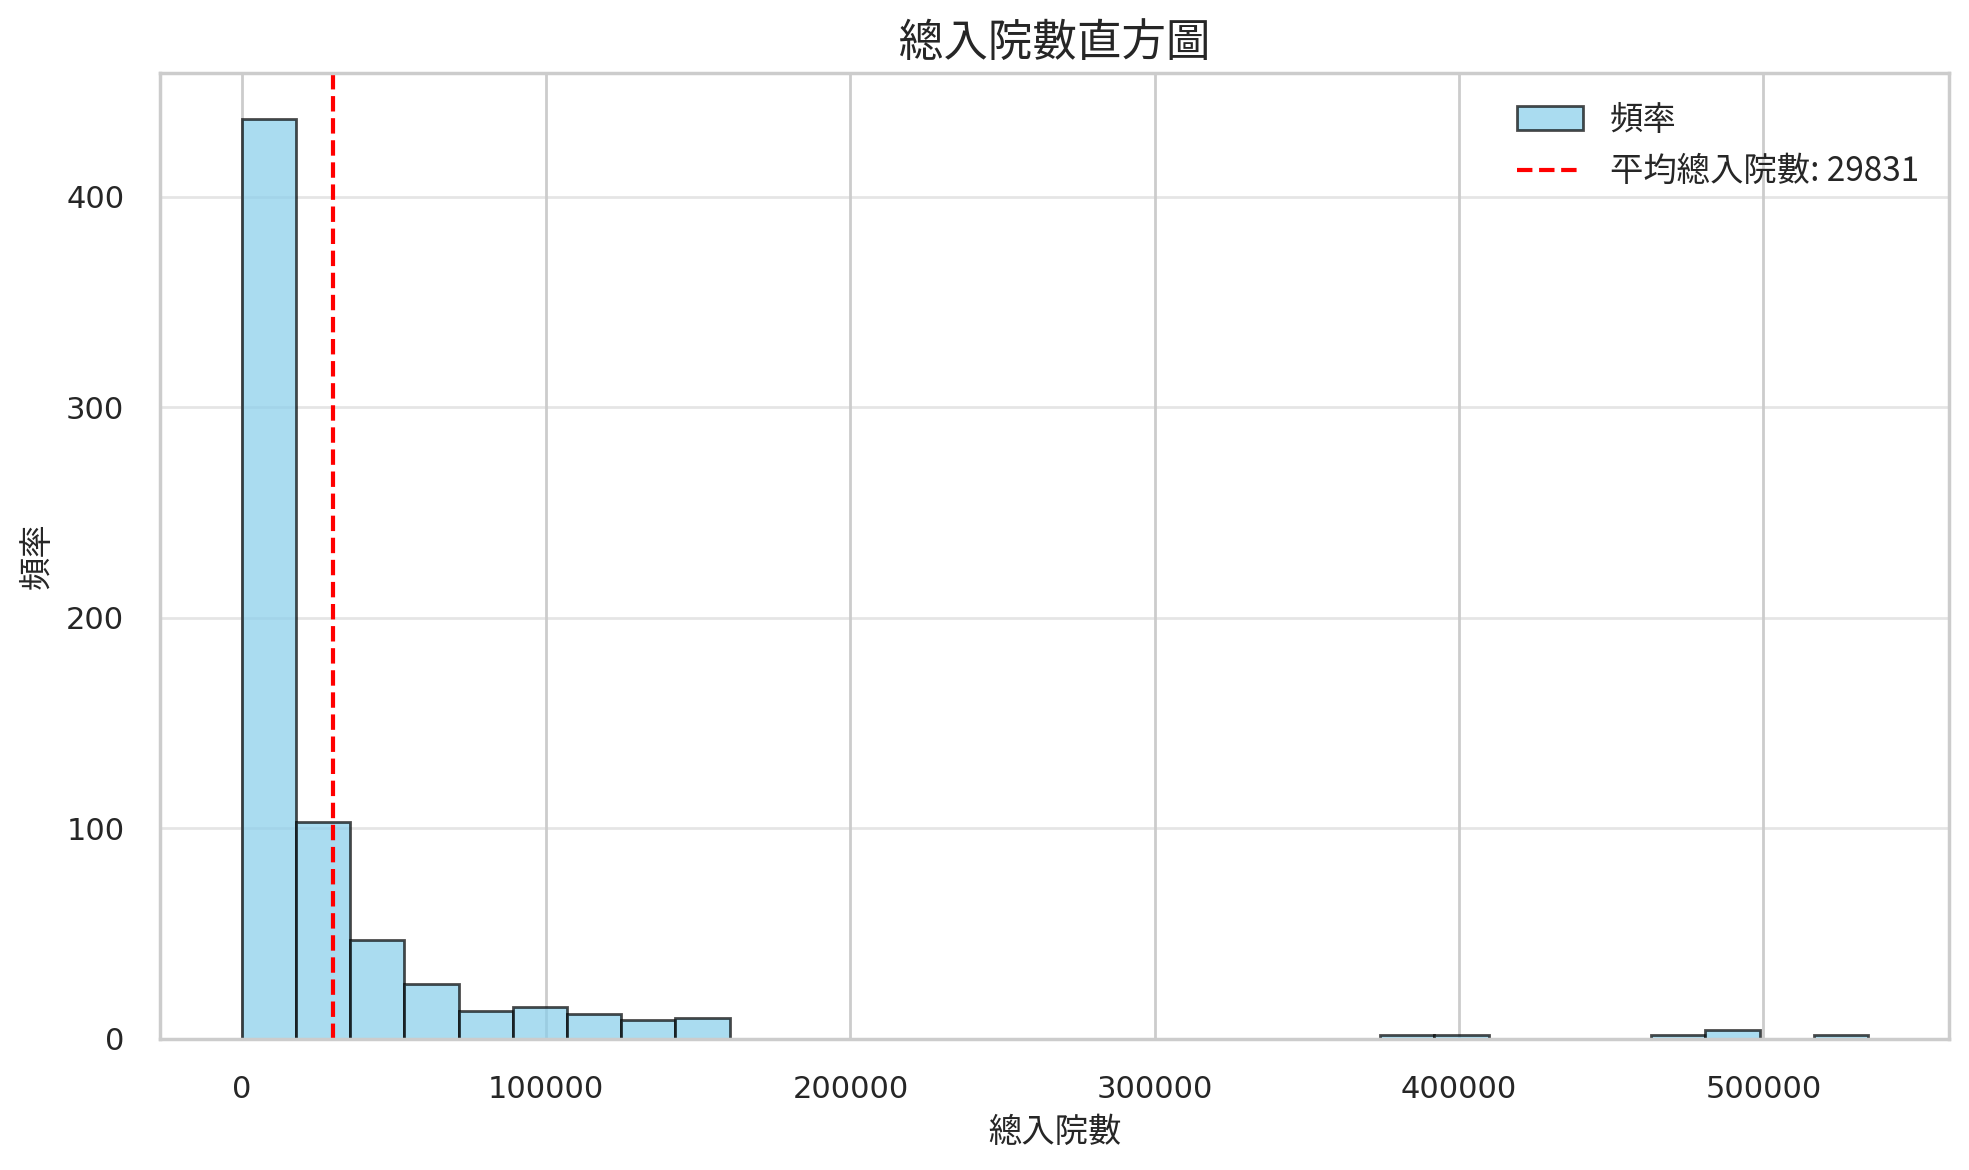

In [20]:
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital['Total Admits (Consolidated)'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('總入院數直方圖', fontproperties=my_font, fontsize=16)
plt.xlabel('總入院數', fontproperties=my_font, fontsize=12)
plt.ylabel('頻率', fontproperties=my_font, fontsize=12)
mean_val = hospital['Total Admits (Consolidated)'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'平均總入院數: {int(mean_val)}')
plt.legend(prop=my_font)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## *總入院人數* **對數轉換**

In [21]:
hospital['Total Admits people(log)'] = np.log1p(hospital['Total Admits (Consolidated)'])
display(hospital.iloc[:, [3, 13]])

Total Admits (Consolidated)  Total Admits people(log)
0                        75103.0                 11.226629
1                           13.0                  2.639057
2                         2657.0                  7.885329
3                        20422.0                  9.924417
4                         3253.0                  8.087640
..                           ...                       ...
679                      18119.0                  9.804772
680                       3236.0                  8.082402
681                      34253.0                 10.441559
682                       7045.0                  8.860215
683                       4237.0                  8.351847

[684 rows x 2 columns]

In [66]:
hospital['30-day people(log)'] = np.log1p(hospital['30-day Readmits (Consolidated)'])
display(hospital.iloc[:, [4, 14]])

30-day Readmits (Consolidated)  30-day people(log)
0                           11377.0            9.339437
1                               1.0            0.693147
2                             345.0            5.846439
3                            3198.0            8.070594
4                             392.0            5.973810
..                              ...                 ...
679                          2204.0            7.698483
680                           472.0            6.159095
681                          4771.0            8.470521
682                          1005.0            6.913737
683                           631.0            6.448889

[684 rows x 2 columns]

## 總入院人數直方圖(log)

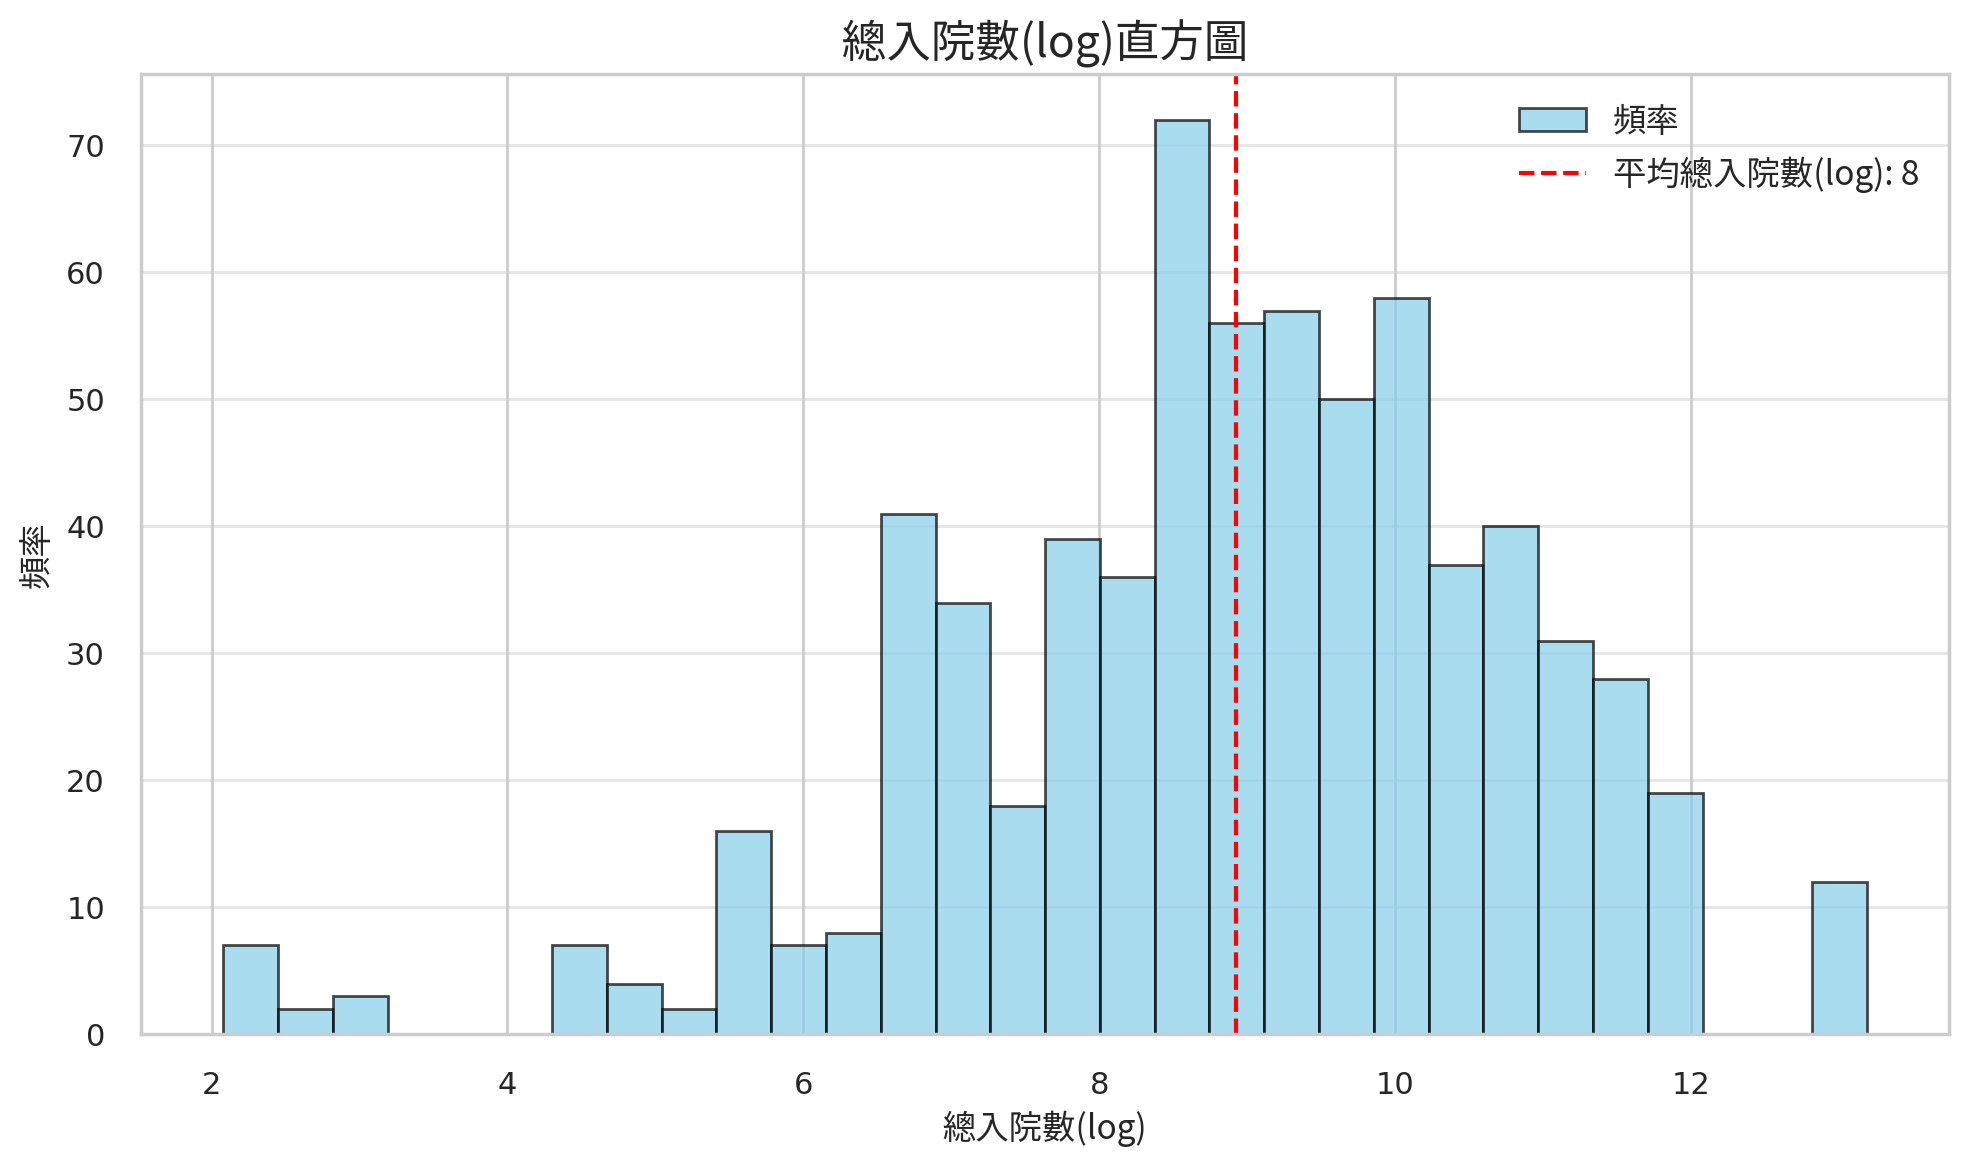

In [22]:
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital['Total Admits people(log)'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('總入院數(log)直方圖', fontproperties=my_font, fontsize=16)
plt.xlabel('總入院數(log)', fontproperties=my_font, fontsize=12)
plt.ylabel('頻率', fontproperties=my_font, fontsize=12)
mean_val = hospital['Total Admits people(log)'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'平均總入院數(log): {int(mean_val)}')
plt.legend(prop=my_font)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## 30 天再入院使用率直方圖

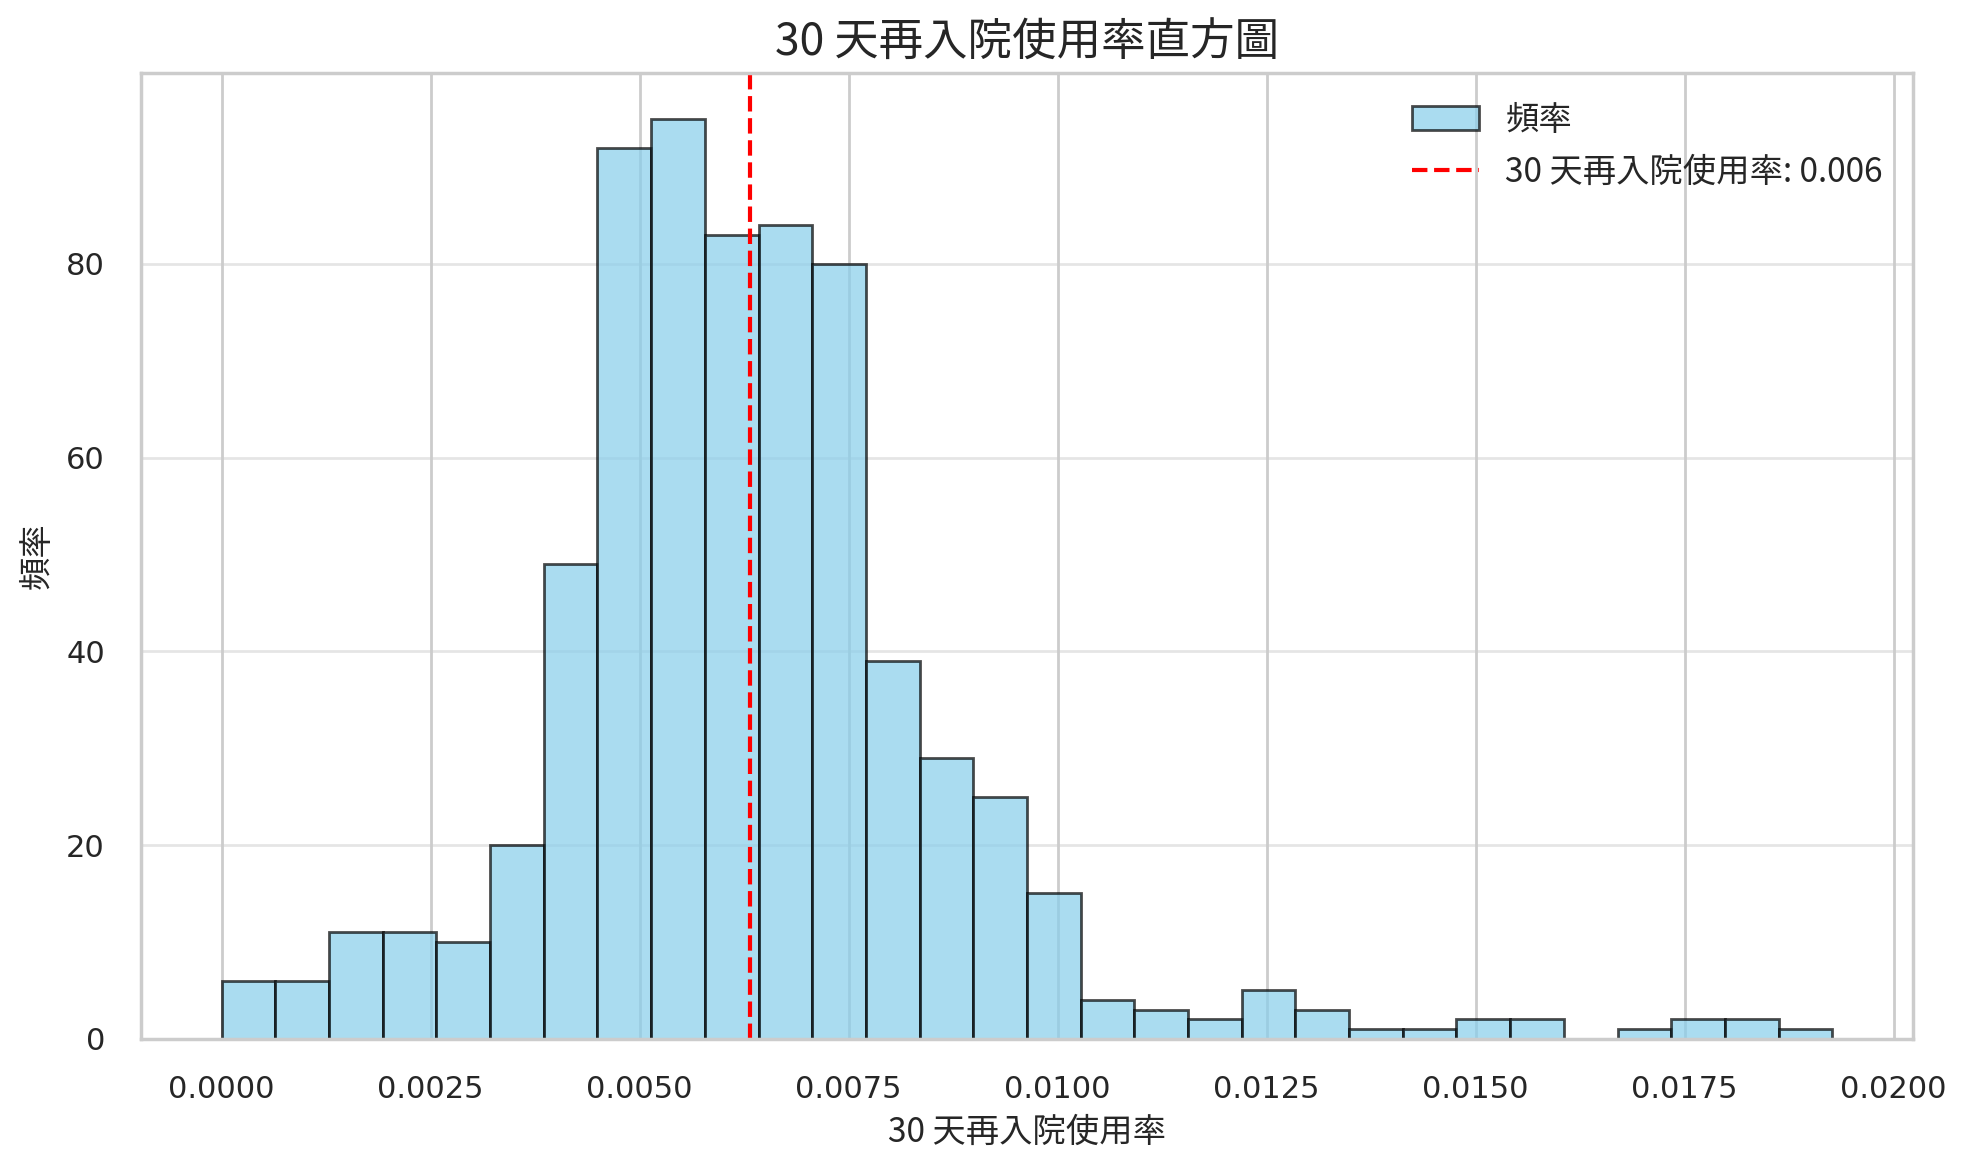

In [23]:
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital['30-day Readmits (Proportion)'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('30 天再入院使用率直方圖', fontproperties=my_font, fontsize=16)
plt.xlabel('30 天再入院使用率', fontproperties=my_font, fontsize=12)
plt.ylabel('頻率', fontproperties=my_font, fontsize=12)
mean_val = hospital['30-day Readmits (Proportion)'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'30 天再入院使用率: {mean_val:.3f}')
plt.legend(prop=my_font)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## 熱力圖分析

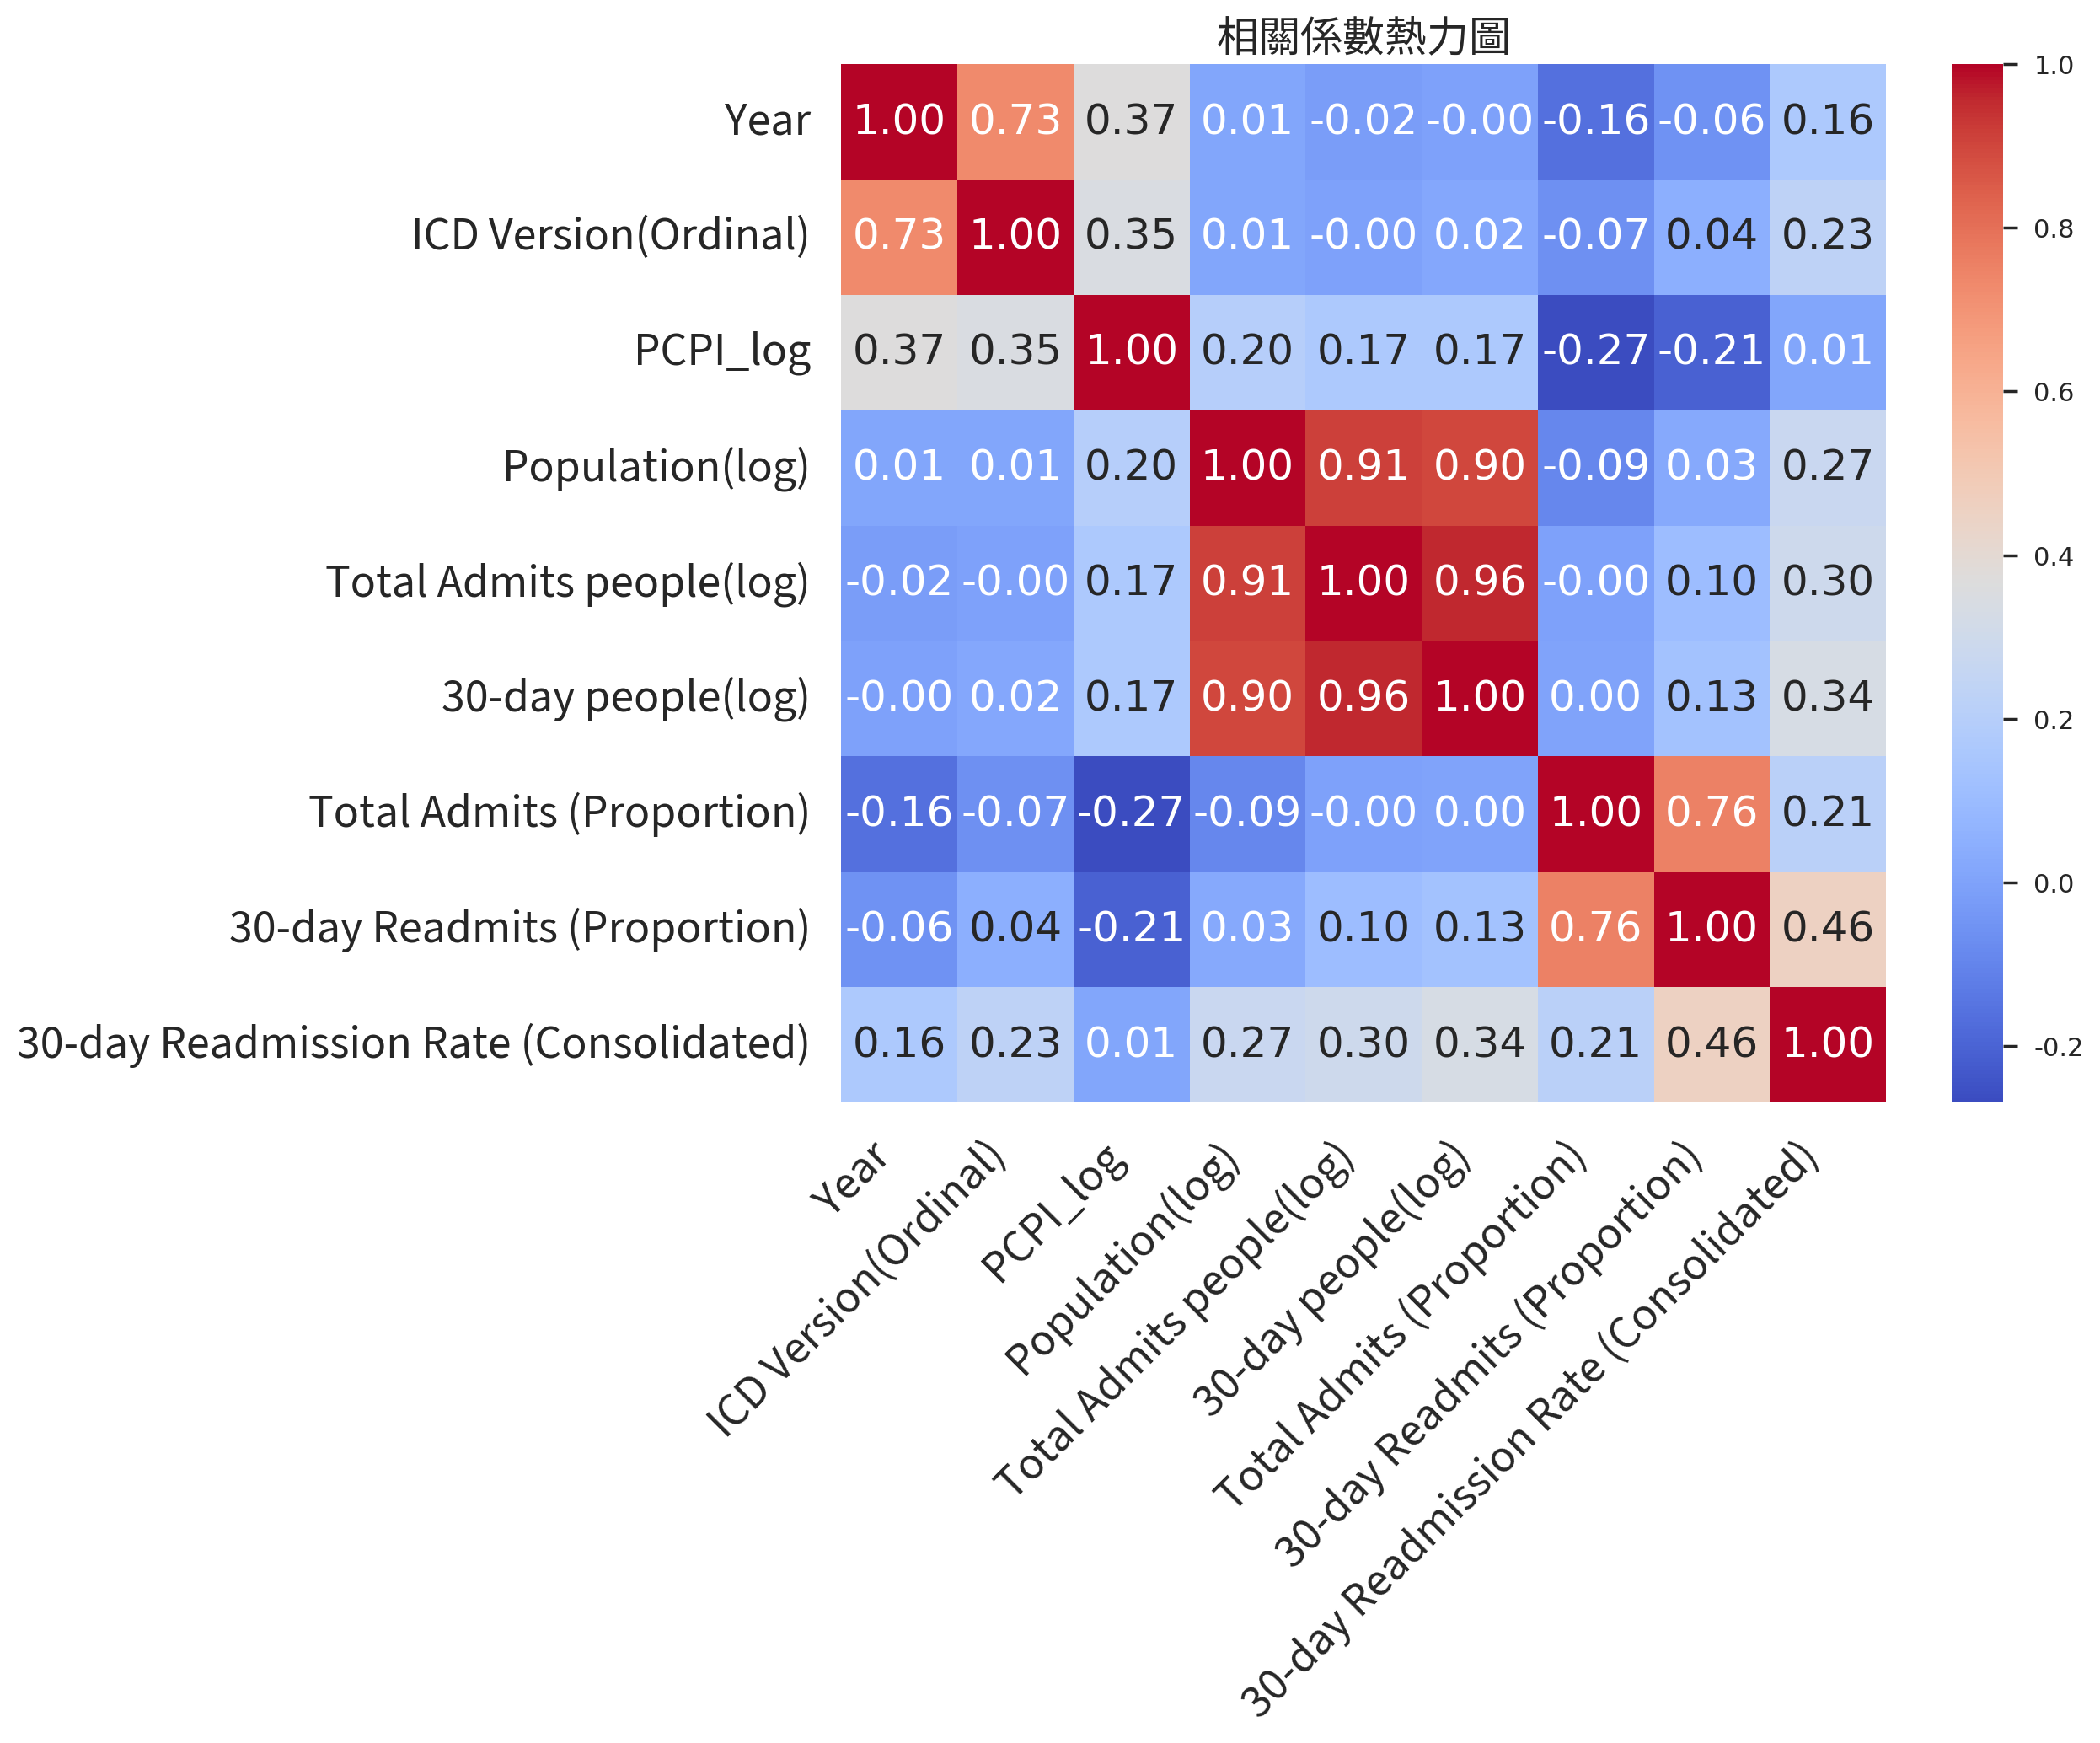

In [129]:
# Based on original code by Josh Haber
# Source: https://www.kaggle.com/code/joshhaber/eda-hospital-readmission-rates
features = [
    'Year', 
    'ICD Version(Ordinal)', 
    'PCPI_log',
    'Population(log)',
    'Total Admits people(log)', 
    '30-day people(log)',
    'Total Admits (Proportion)',
    '30-day Readmits (Proportion)',
    '30-day Readmission Rate (Consolidated)'
]
corr_matrix = hospital[features].corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 18})
plt.title("相關係數熱力圖", fontproperties=my_font, fontsize=18)
plt.xticks(fontproperties=my_font, rotation=45, ha='right', fontsize=18) 
plt.yticks(fontproperties=my_font, rotation=0, fontsize=18)
plt.show()

In [82]:
total_effect_model = smf.ols("Q('30-day Readmission Rate (Consolidated)') ~ Q('ICD Version(Ordinal)')", data=hospital).fit()
print(total_effect_model.summary())

                                         OLS Regression Results                                        
Dep. Variable:     Q('30-day Readmission Rate (Consolidated)')   R-squared:                       0.051
Model:                                                     OLS   Adj. R-squared:                  0.049
Method:                                          Least Squares   F-statistic:                     36.53
Date:                                         Sun, 14 Dec 2025   Prob (F-statistic):           2.48e-09
Time:                                                 05:09:57   Log-Likelihood:                -1601.6
No. Observations:                                          684   AIC:                             3207.
Df Residuals:                                              682   BIC:                             3216.
Df Model:                                                    1                                         
Covariance Type:                                     nonrobust  

In [87]:
mediator_model1 = smf.ols("Q('30-day Readmits (Proportion)') ~ Q('ICD Version(Ordinal)')", data=hospital).fit()
print("Mediator Model 1 (Total Admits (Proportion) ~ Q('ICD Version(Ordinal)')):")
print(mediator_model1.summary())

Mediator Model 1 (Total Admits (Proportion) ~ Q('ICD Version(Ordinal)')):
                                    OLS Regression Results                                   
Dep. Variable:     Q('30-day Readmits (Proportion)')   R-squared:                       0.003
Model:                                           OLS   Adj. R-squared:                  0.002
Method:                                Least Squares   F-statistic:                     2.082
Date:                               Sun, 14 Dec 2025   Prob (F-statistic):              0.150
Time:                                       05:12:47   Log-Likelihood:                 3132.9
No. Observations:                                684   AIC:                            -6262.
Df Residuals:                                    682   BIC:                            -6253.
Df Model:                                          1                                         
Covariance Type:                           nonrobust                            

## 主成份分析

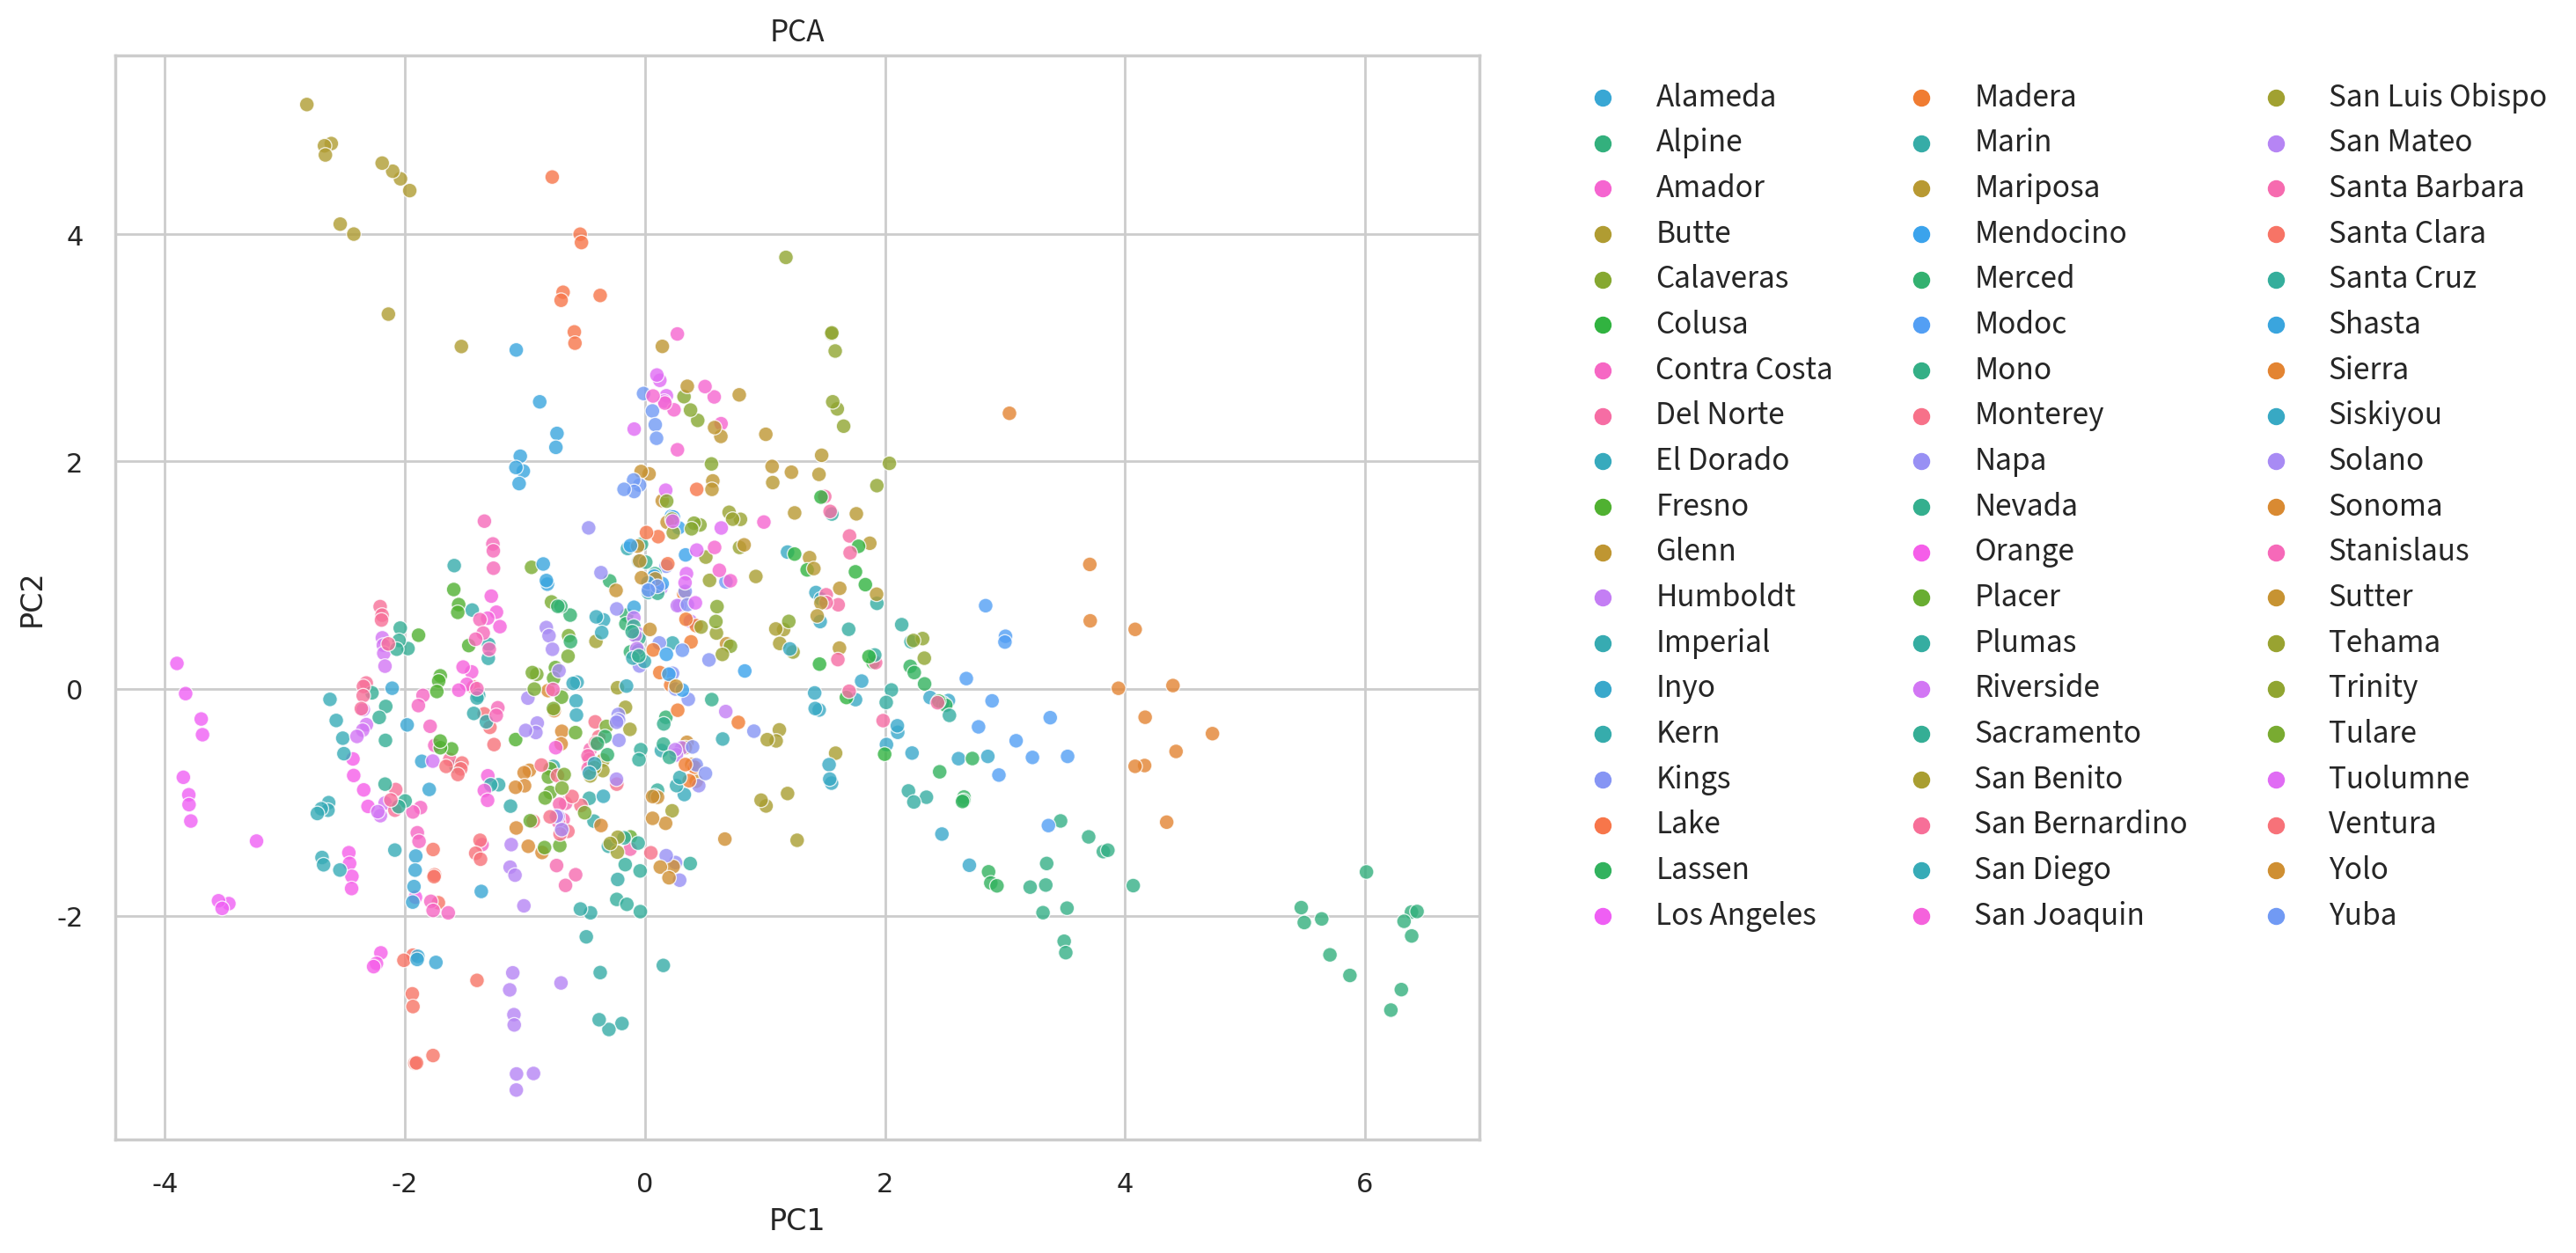

In [72]:
n_colors = 57
palette = sns.color_palette("husl", n_colors)
random.seed(42)  # 設定種子碼 (seed) 確保每次執行打散的結果都一樣，不會每次跑圖顏色都不一樣」
random.shuffle(palette)  # 將顏色順序隨機打散
col = [
    'ICD Version(Ordinal)', 
    'PCPI_log',
    'Population(log)',
    'Total Admits people(log)', 
    '30-day people(log)',
    'Total Admits (Proportion)',
    '30-day Readmits (Proportion)'
]
df_numeric = hospital[col]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)
pca = PCA(n_components=0.95) # 透過權重組合得到不同 y 變成新特徵
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(
    pca_result,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))]
)
pca_df['County'] = hospital.reset_index()['County']
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=pca_df,
    hue="County",
    palette=palette,
    alpha=0.8
)
plt.title("PCA", fontsize=16, fontproperties=my_font)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, prop=my_font, ncol=3)
plt.grid(True)
plt.show()

PC1       PC2       PC3       PC4     County
0   -2.106319  0.004541 -1.163816  0.500149    Alameda
1    6.012647 -1.612690 -0.986579  0.824620     Alpine
2    0.577404  2.568511 -0.481846  0.624125     Amador
3   -1.960050  4.384612  0.084646  0.970582      Butte
4    0.439755  2.362119 -0.460574  0.758374  Calaveras
..        ...       ...       ...       ...        ...
679 -0.502234 -1.091370  0.140817 -0.946532     Tulare
680  0.334484  0.933220  1.403670  0.221858   Tuolumne
681 -1.370103 -1.500613  0.784199  0.165319    Ventura
682  0.200475 -1.663678  0.567162 -0.210664       Yolo
683  0.312062  0.338678  0.966551 -0.252709       Yuba

[684 rows x 5 columns]

每個主成分的解釋比例： [0.45325054 0.30132089 0.17116728 0.06640429]
前 4 個主成分累積解釋比例： 0.9921429974063984


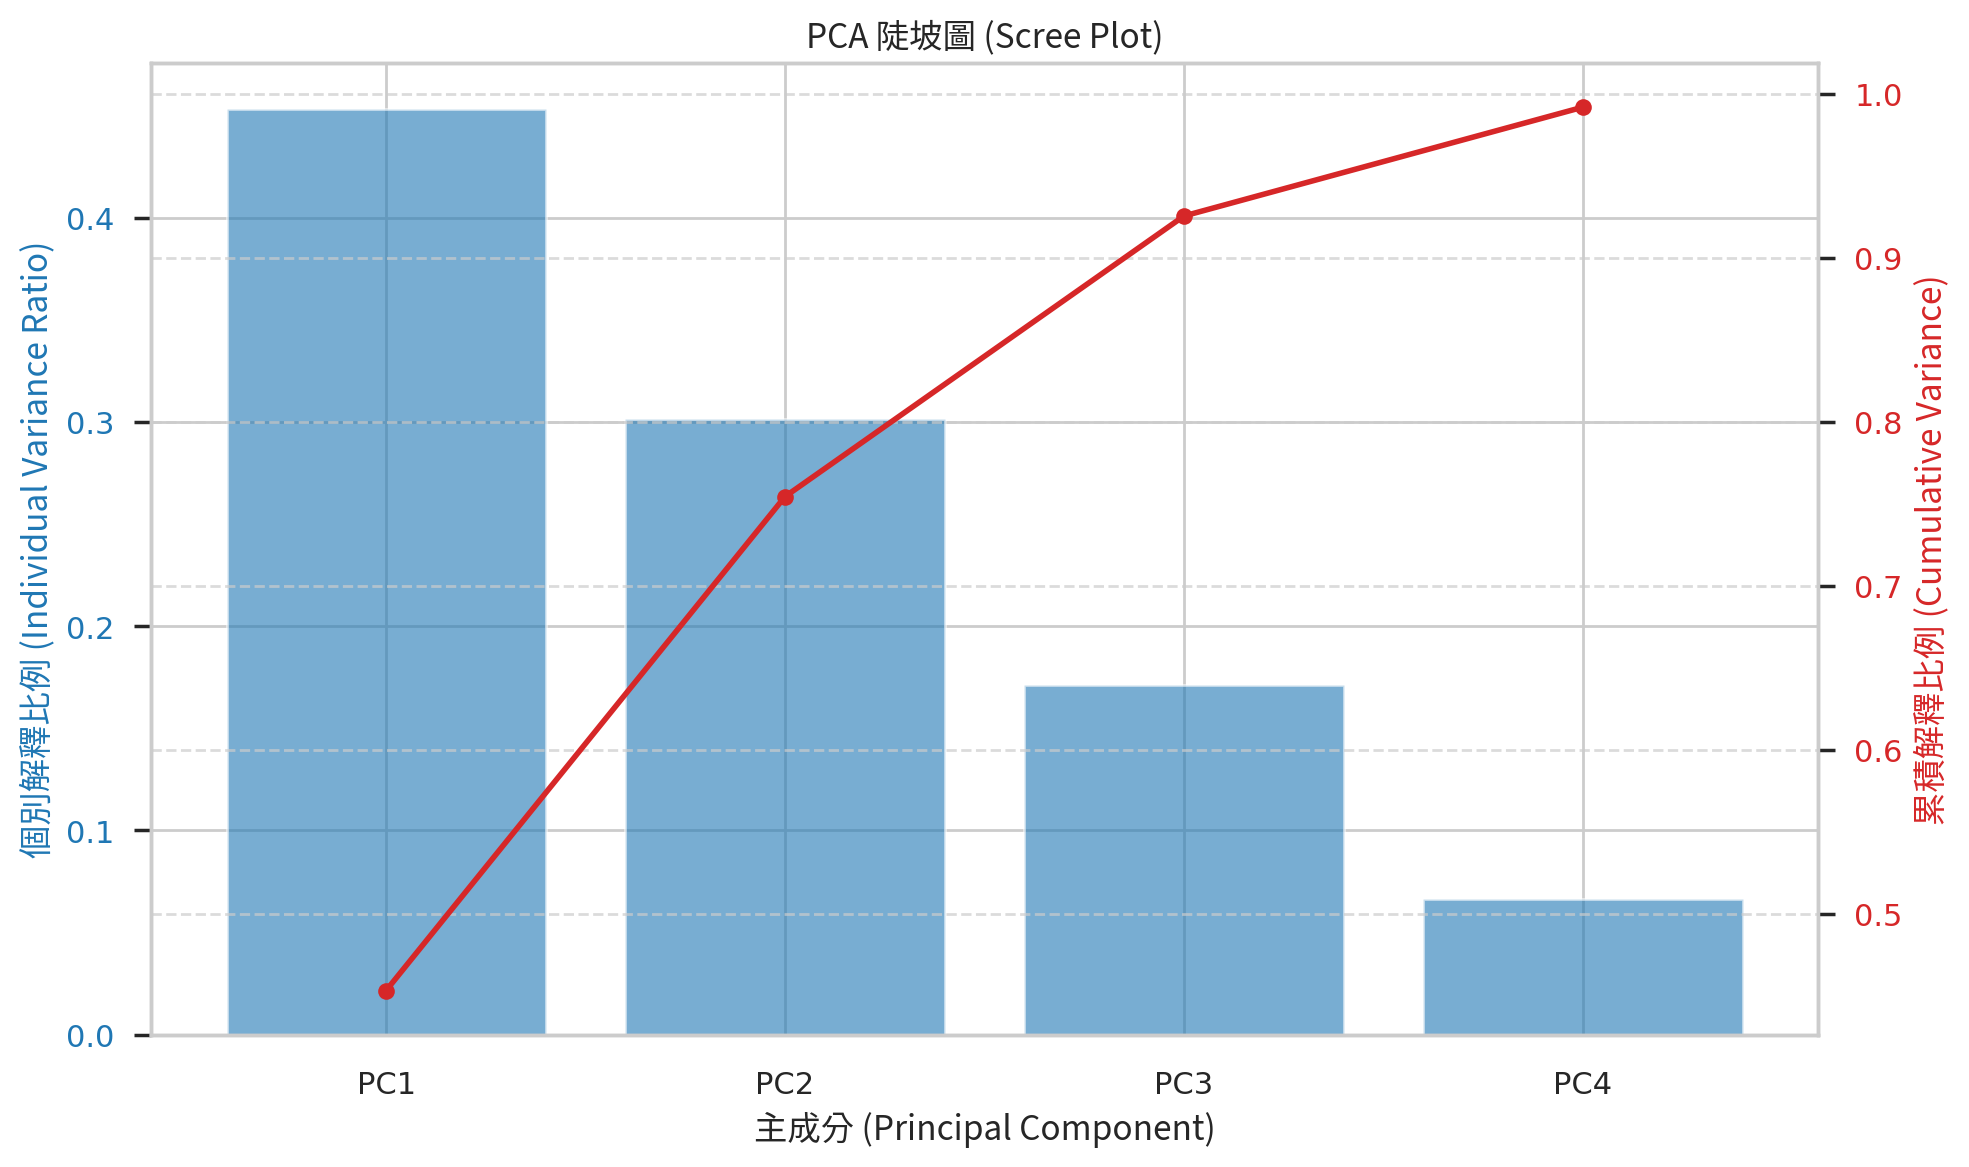

In [70]:
display(pca_df)
print("每個主成分的解釋比例：", pca.explained_variance_ratio_)
explained_variance_ratio = pca.explained_variance_ratio_
print("前 4 個主成分累積解釋比例：", sum(explained_variance_ratio))
cumulative_variance = np.cumsum(explained_variance_ratio)
# 建立主成分的標籤 (例如 PC1, PC2, ...)
pc_labels = [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))]
fig, ax1 = plt.subplots(figsize=(10, 6))

# 繪製解釋比例 (Primary Y-axis)
color = 'tab:blue'
ax1.set_xlabel('主成分 (Principal Component)', fontsize=12, fontproperties=my_font)
ax1.set_ylabel('個別解釋比例 (Individual Variance Ratio)', color=color, fontsize=12, fontproperties=my_font)
ax1.bar(pc_labels, explained_variance_ratio, color=color, alpha=0.6, label='個別解釋比例')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('PCA 陡坡圖 (Scree Plot)', fontsize=12, fontproperties=my_font)

# 繪製累積解釋比例 (Secondary Y-axis)
ax2 = ax1.twinx()  # 建立第二個 Y 軸
color = 'tab:red'
ax2.set_ylabel('累積解釋比例 (Cumulative Variance)', color=color, fontsize=12, fontproperties=my_font)
ax2.plot(pc_labels, cumulative_variance, color=color, marker='o', linestyle='-', linewidth=2, label='累積解釋比例')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True, linestyle='--', alpha=0.7)

# 標註前 4 個主成分的累積解釋比例 (假設您的數據中，前 4 個為 0.93)
# (您應該使用您自己的 sum(pca.explained_variance_ratio_) 數值來替換)
# ax2.axhline(y=0.93, color='r', linestyle=':', label='目標累積變異度')
# ax2.text(3.5, 0.94, '累積 93%', color='r')

fig.tight_layout()  # 調整佈局以防止標籤重疊
plt.show()

## 特徵貢獻度

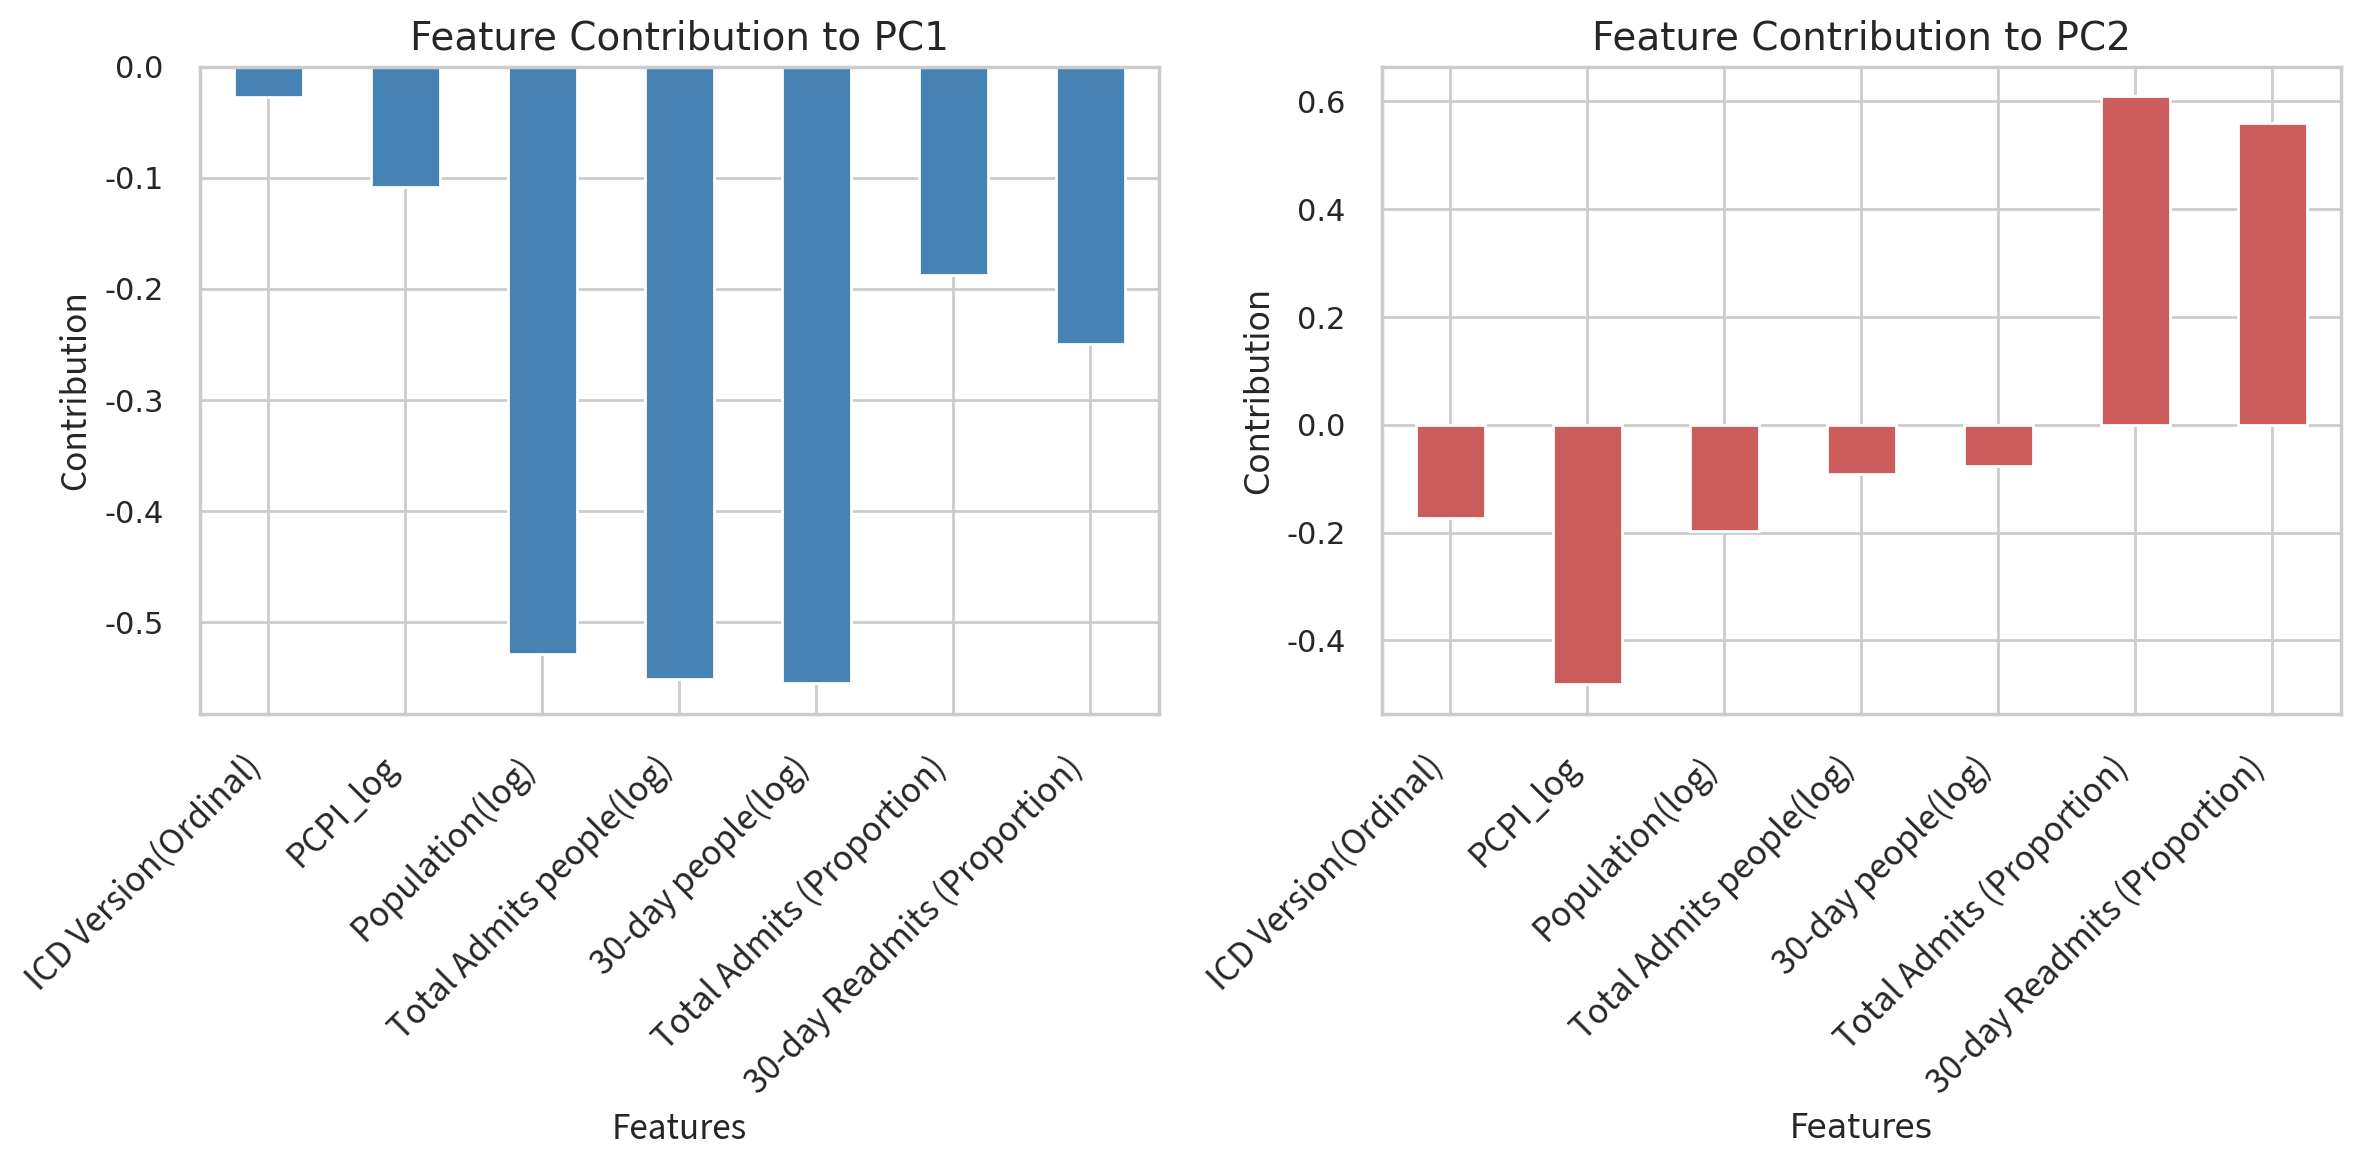

In [71]:
# Extract PCA loadings (components)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align features with components
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=col  # Feature names as the index
)

# Step 4: Visualize Feature Contributions for PC1 and PC2
plt.figure(figsize=(12, 6))

# Bar plot for PC1
plt.subplot(1, 2, 1)
loadings["PC1"].plot(kind='bar', color='steelblue')
plt.title("Feature Contribution to PC1", fontsize=14)
plt.ylabel("Contribution", fontsize=12, fontproperties=my_font)
plt.xlabel("Features", fontsize=12, fontproperties=my_font)
plt.xticks(rotation=45, ha='right', fontproperties=my_font)

# Bar plot for PC2
plt.subplot(1, 2, 2)
loadings["PC2"].plot(kind='bar', color='indianred')
plt.title("Feature Contribution to PC2", fontsize=14)
plt.ylabel("Contribution", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right', fontproperties=my_font)
plt.tight_layout()
plt.show()

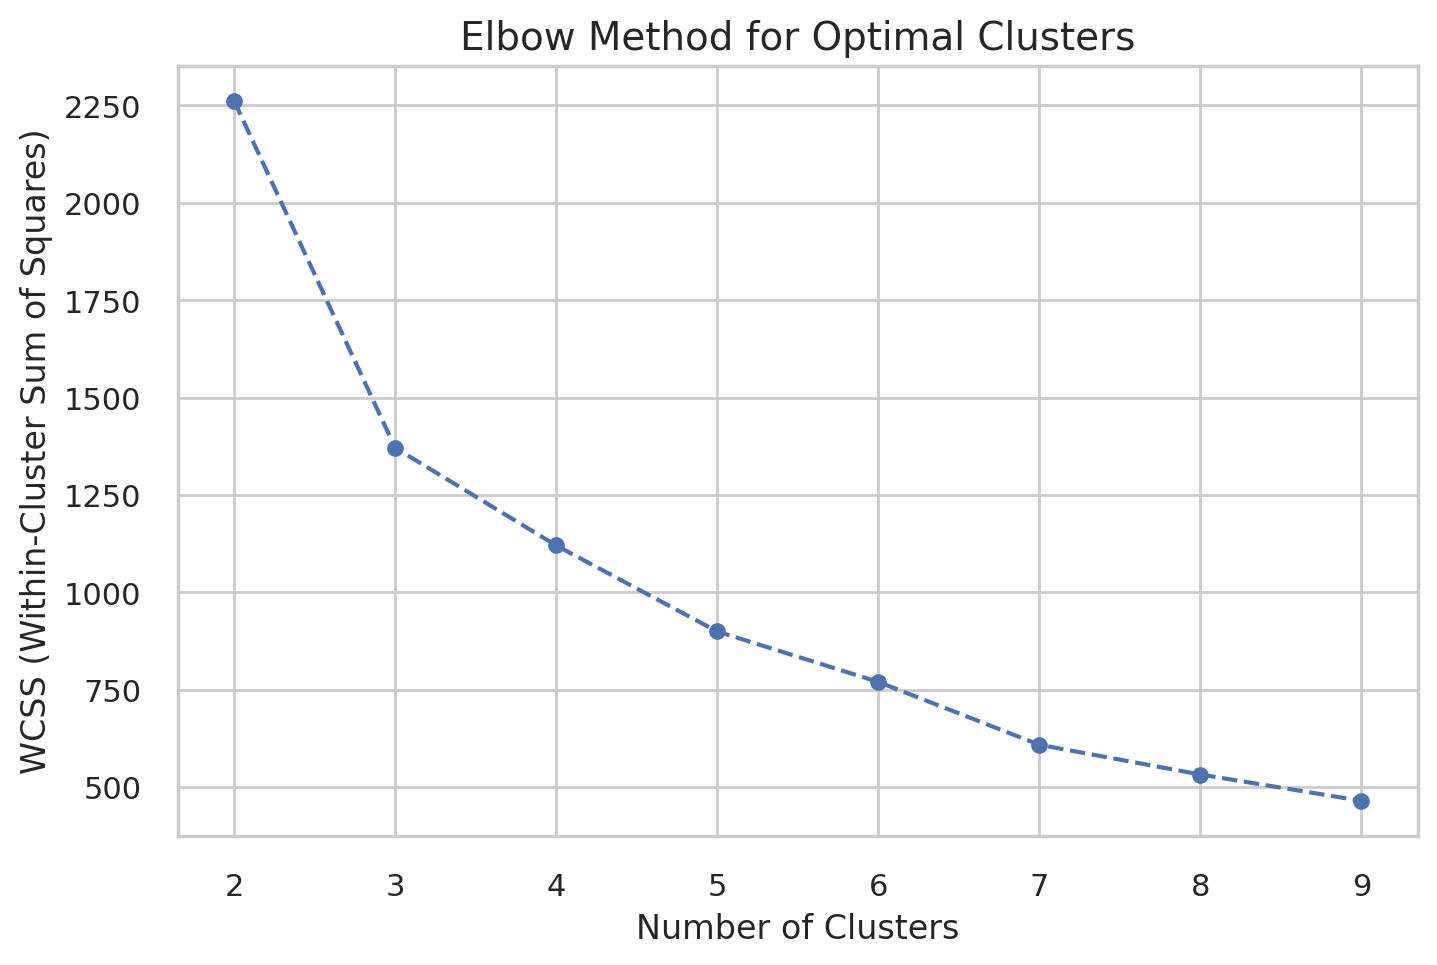

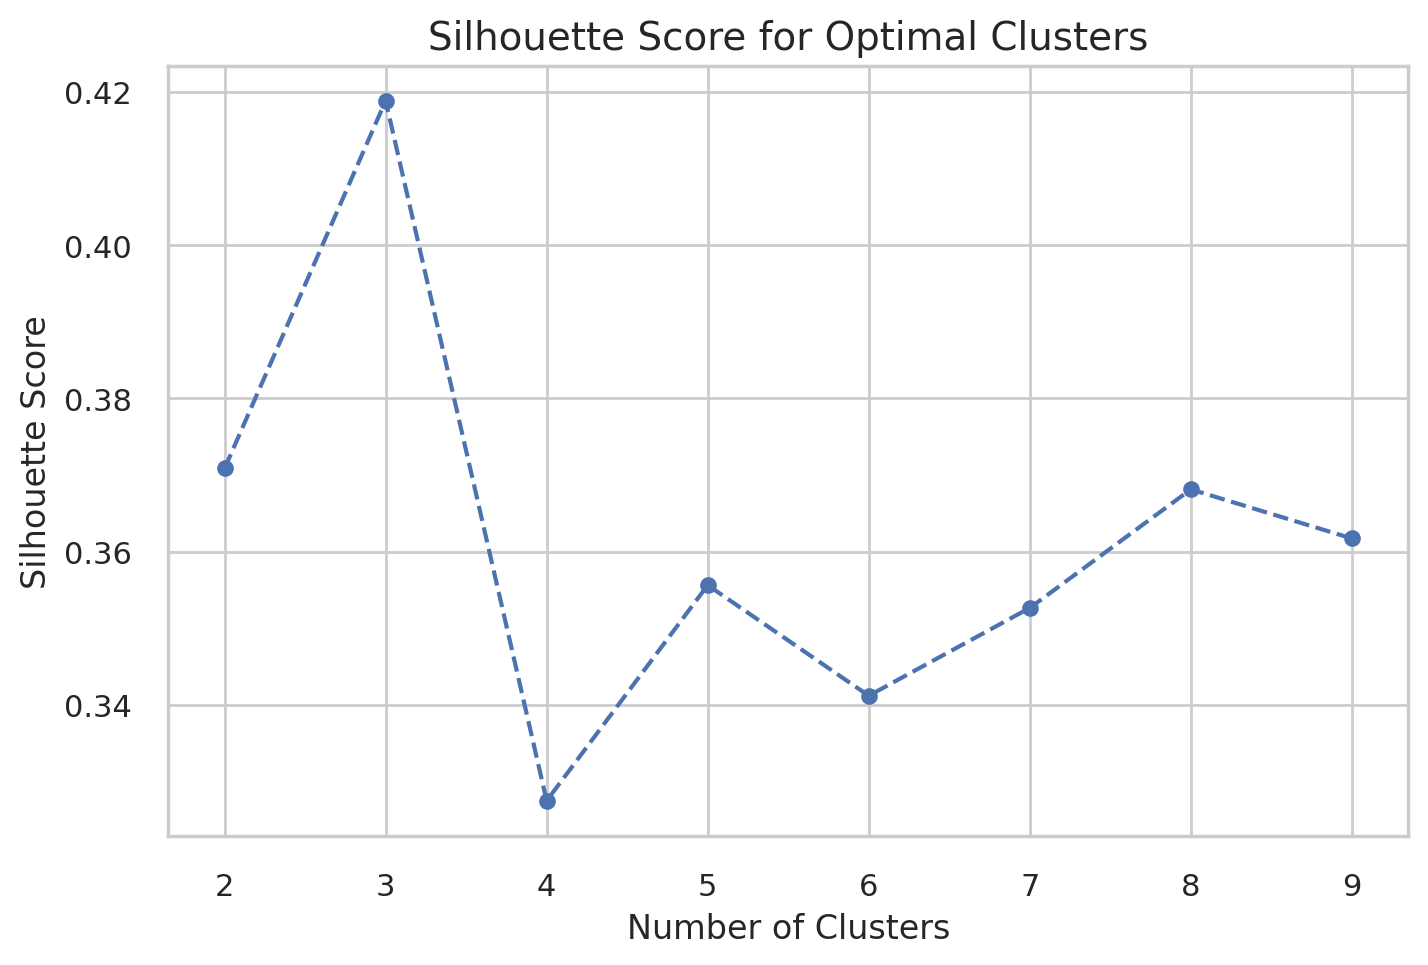

In [73]:
# Prepare data (PC1 and PC2 for clustering)
pca_data = pca_df[['PC1', 'PC2']]

# Elbow Method
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=12)
plt.grid(True)
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid(True)
plt.show()

## 分群結果

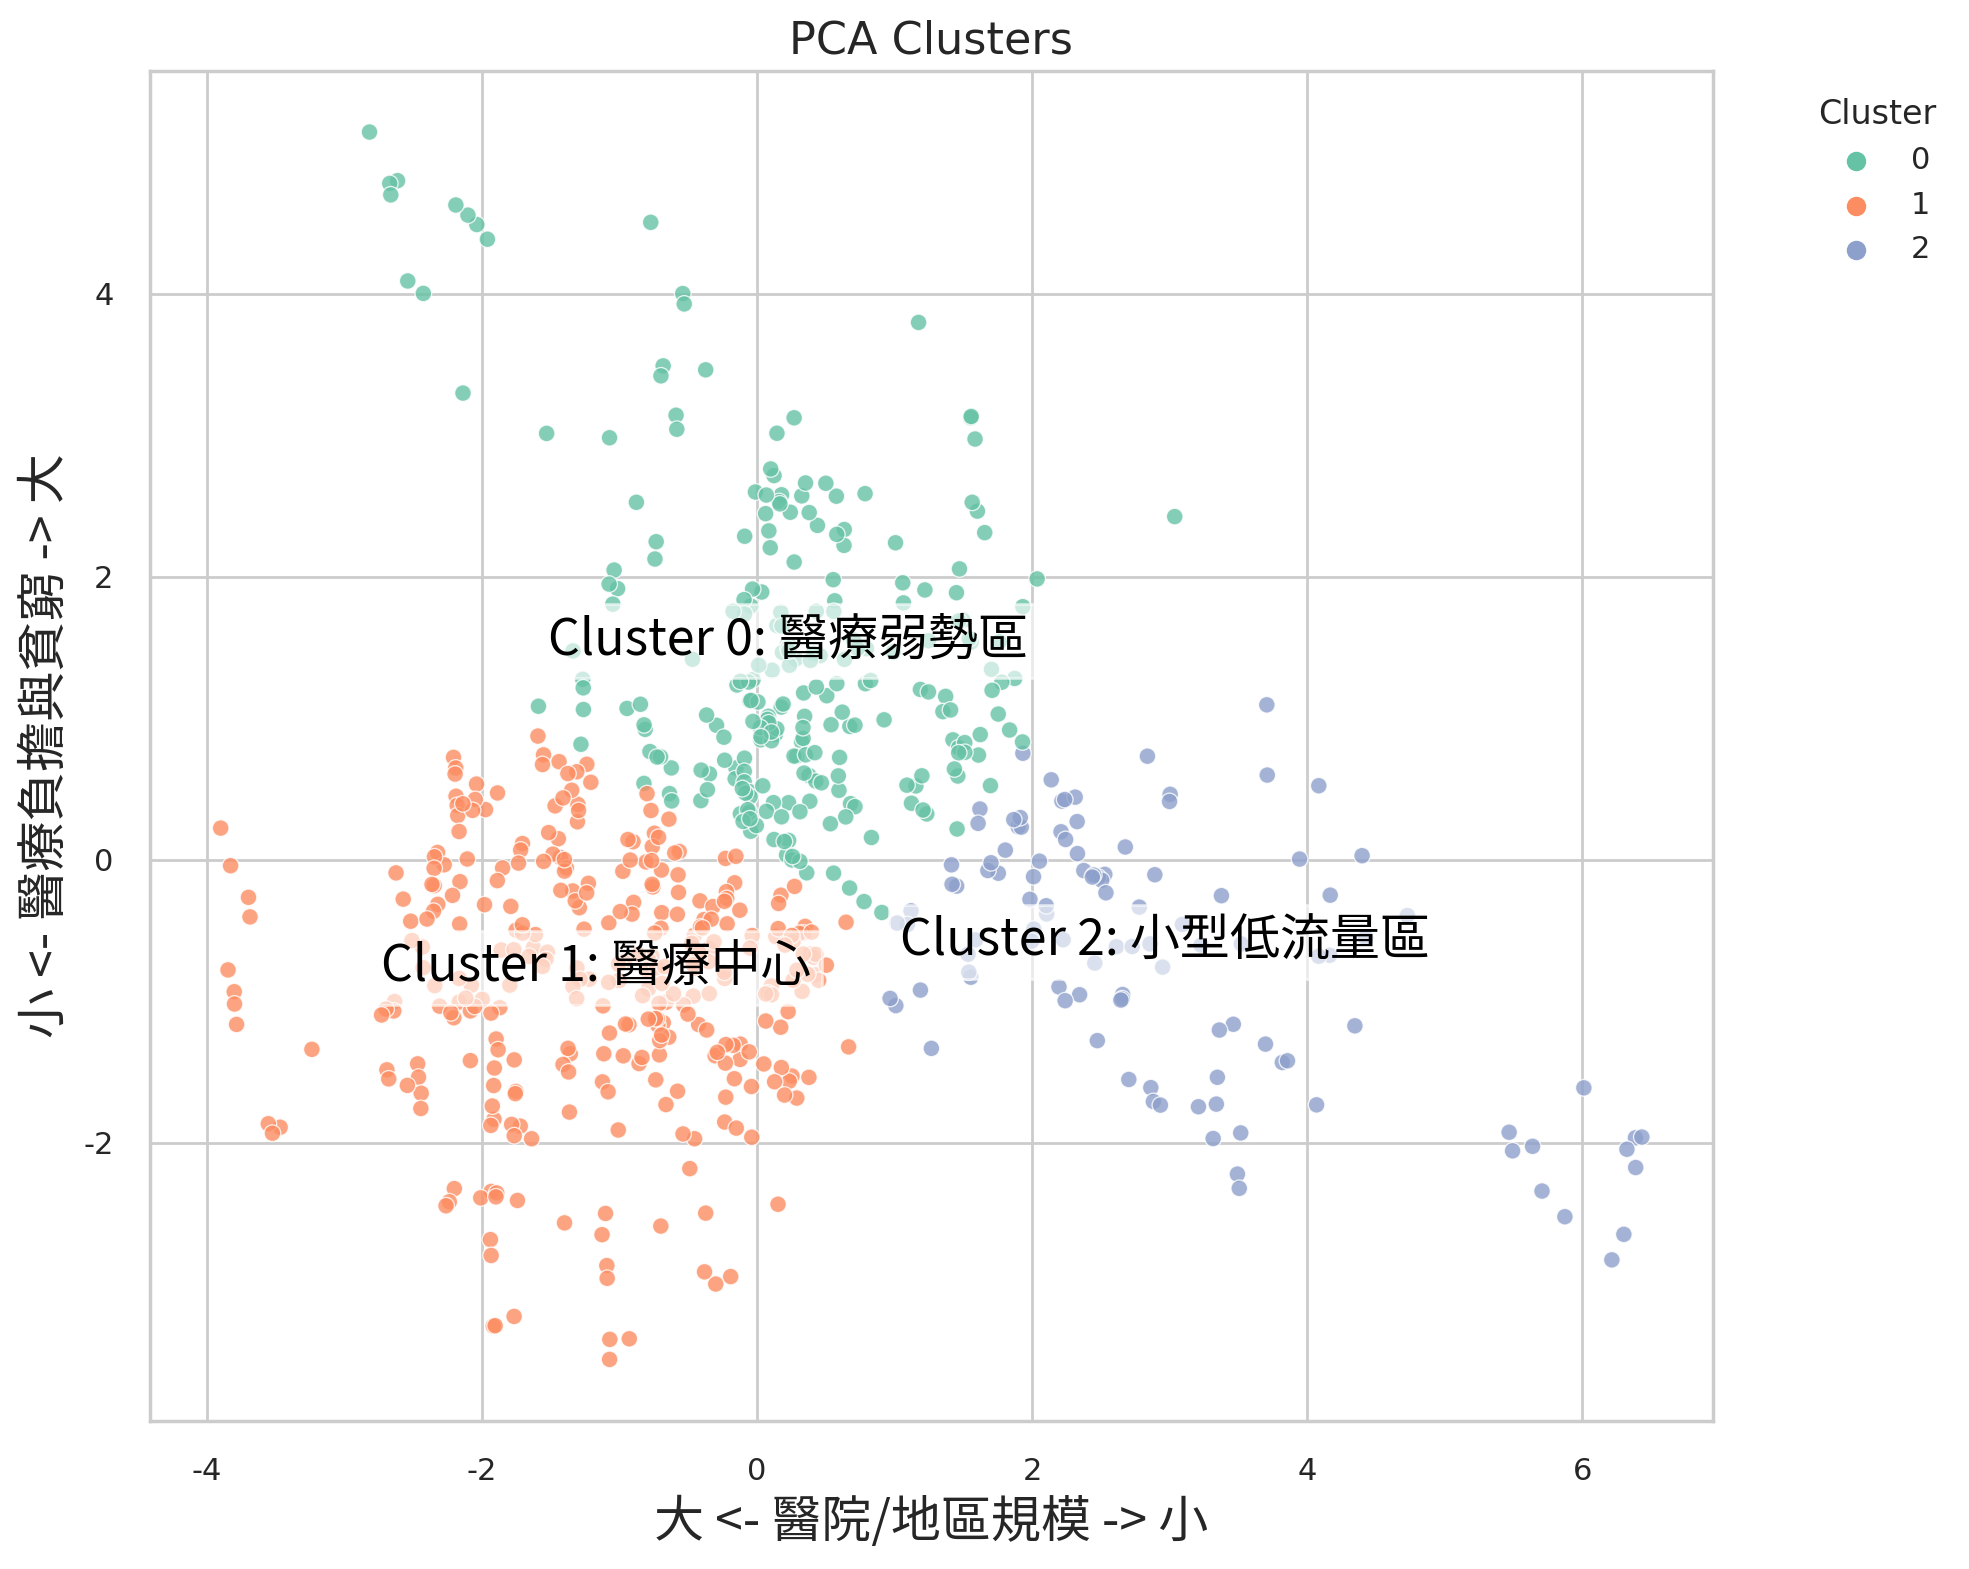

In [78]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Define interpretations for each cluster
cluster_interpretations = {
    0: "醫療弱勢區",  # 
    1: "醫療中心",  # 
    2: "小型低流量區",  # 
    # 3: "3"  # "高人口、高醫療使用率"
}

# Visualize Clusters on PCA Plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=pca_df,
    palette='Set2', alpha=0.8
)
plt.title("PCA Clusters", fontsize=16)
plt.xlabel("大 <- 醫院/地區規模 -> 小", fontsize=18, fontproperties=my_font)
plt.ylabel("小 <- 醫療負擔與貧窮 -> 大", fontsize=18, fontproperties=my_font)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add cluster interpretation text to the plot
# Adjust the positions of the cluster interpretation text
for cluster_id, interpretation in cluster_interpretations.items():
    # Get the cluster center from K-Means
    cluster_center = kmeans.cluster_centers_[cluster_id]

    # Adjust text positions for specific clusters
    # if cluster_id == 2:  # Move Cluster 2 down
    #     cluster_center[1] -= 1.5
    # elif cluster_id == 3:  # Move Cluster 3 to the right
    #     cluster_center[0] += 2
    #     cluster_center[1] -= .5
    # elif cluster_id == 1: 
    #     cluster_center[1] += .75

    # Add the text to the plot
    plt.text(
        cluster_center[0], cluster_center[1],  # Position
        f"Cluster {cluster_id}: {interpretation}",
        fontsize=18, color='black', ha='center', bbox=dict(facecolor='white', alpha=0.6), fontproperties=my_font 
    )


plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
import joblib
joblib.dump(kmeans, 'my_clustering_model.pkl') 
print("模型已儲存！")

# === 步驟 B：讀取模型 (下次使用時) ===
# 讀取回來後，它跟原本的模型一模一樣
loaded_model = joblib.load('my_clustering_model.pkl')

模型已儲存！


## 特徵篩選與排序

In [120]:
display(hospital)
hospital_needed = hospital.iloc[:, [0, 1, 5, 8, 10, 12, 13]]
# hospital_needed = hospital
display(hospital_needed)
hospital_needed = hospital_needed.sort_values(by=['County', 'Year'])
display(hospital_needed)

Year     County ICD Version  Total Admits (Consolidated)  \
0    2011    Alameda       ICD-9                      75103.0   
1    2011     Alpine       ICD-9                         13.0   
2    2011     Amador       ICD-9                       2657.0   
3    2011      Butte       ICD-9                      20422.0   
4    2011  Calaveras       ICD-9                       3253.0   
..    ...        ...         ...                          ...   
679  2022     Tulare      ICD-10                      18119.0   
680  2022   Tuolumne      ICD-10                       3236.0   
681  2022    Ventura      ICD-10                      34253.0   
682  2022       Yolo      ICD-10                       7045.0   
683  2022       Yuba      ICD-10                       4237.0   

     30-day Readmits (Consolidated)  30-day Readmission Rate (Consolidated)  \
0                           11377.0                                   15.10   
1                               1.0                                    7.70   
2                             345.0                                   13.00   
3                            3198.0                                   15.70   
4                             392.0                                   12.10   
..                              ...                                     ...   
679                          2204.0                                   12.16   
680                           472.0                                   14.59   
681                          4771.0                                   13.93   
682                          1005.0                                   14.27   
683                           631.0                                   14.89   

        PCPI  Population  Total Admits (Proportion)  \
0    50432.0     1530893                   0.049058   
1    54040.0        1093                   0.011894   
2    34847.0       37539                   0.070780   
3    33669.0      219983                   0.092834   
4    37516.0       45159                   0.072034   
..       ...         ...                        ...   
679  46995.0      477884                   0.037915   
680  52565.0       54587                   0.059282   
681  73994.0      832871                   0.041126   
682  63544.0      222018                   0.031732   
683  48398.0       84353                   0.050229   

     30-day Readmits (Proportion)  ICD Version(Ordinal)  Population(log)  \
0                        0.007432                     0        14.241362   
1                        0.000915                     0         6.997596   
2                        0.009190                     0        10.533162   
3                        0.014537                     0        12.301310   
4                        0.008680                     0        10.717967   
..                            ...                   ...              ...   
679                      0.004612                     1        13.077125   
680                      0.008647                     1        10.907569   
681                      0.005728                     1        13.632635   
682                      0.004527                     1        12.310518   
683                      0.007480                     1        11.342778   

      PCPI_log  Total Admits people(log)  30-day people(log)  
0    10.828401                 11.226629            9.339437  
1    10.897498                  2.639057            0.693147  
2    10.458751                  7.885329            5.846439  
3    10.424363                  9.924417            8.070594  
4    10.532549                  8.087640            5.973810  
..         ...                       ...                 ...  
679  10.757818                  9.804772            7.698483  
680  10.869825                  8.082402            6.159095  
681  11.211753                 10.441559            8.470521  
682  11.059504                  8.860215            6.913737  
683  10.

Year     County  30-day Readmission Rate (Consolidated)  \
0    2011    Alameda                                   15.10   
1    2011     Alpine                                    7.70   
2    2011     Amador                                   13.00   
3    2011      Butte                                   15.70   
4    2011  Calaveras                                   12.10   
..    ...        ...                                     ...   
679  2022     Tulare                                   12.16   
680  2022   Tuolumne                                   14.59   
681  2022    Ventura                                   13.93   
682  2022       Yolo                                   14.27   
683  2022       Yuba                                   14.89   

     Total Admits (Proportion)  ICD Version(Ordinal)   PCPI_log  \
0                     0.049058                     0  10.828401   
1                     0.011894                     0  10.897498   
2                     0.070780                     0  10.458751   
3                     0.092834                     0  10.424363   
4                     0.072034                     0  10.532549   
..                         ...                   ...        ...   
679                   0.037915                     1  10.757818   
680                   0.059282                     1  10.869825   
681                   0.041126                     1  11.211753   
682                   0.031732                     1  11.059504   
683                   0.050229                     1  10.787234   

     Total Admits people(log)  
0                   11.226629  
1                    2.639057  
2                    7.885329  
3                    9.924417  
4                    8.087640  
..                        ...  
679                  9.804772  
680                  8.082402  
681                 10.441559  
682                  8.860215  
683                  8.351847  

[684 rows x 7 columns]

Year   County  30-day Readmission Rate (Consolidated)  \
0    2011  Alameda                                   15.10   
57   2012  Alameda                                   14.50   
114  2013  Alameda                                   14.40   
171  2014  Alameda                                   14.40   
228  2015  Alameda                                   14.04   
..    ...      ...                                     ...   
455  2018     Yuba                                   14.58   
512  2019     Yuba                                   15.54   
569  2020     Yuba                                   15.78   
626  2021     Yuba                                   15.09   
683  2022     Yuba                                   14.89   

     Total Admits (Proportion)  ICD Version(Ordinal)   PCPI_log  \
0                     0.049058                     0  10.828401   
57                    0.046394                     0  10.864694   
114                   0.042844                     0  10.899181   
171                   0.040568                     0  10.950982   
228                   0.030146                     0  11.028726   
..                         ...                   ...        ...   
455                   0.065308                     1  10.583220   
512                   0.064648                     1  10.628109   
569                   0.055065                     1  10.726456   
626                   0.057337                     1  10.804685   
683                   0.050229                     1  10.787234   

     Total Admits people(log)  
0                   11.226629  
57                  11.185587  
114                 11.122457  
171                 11.085521  
228                 10.805071  
..                        ...  
455                  8.528529  
512                  8.532870  
569                  8.414939  
626                  8.470730  
683                  8.351847  

[684 rows x 7 columns]

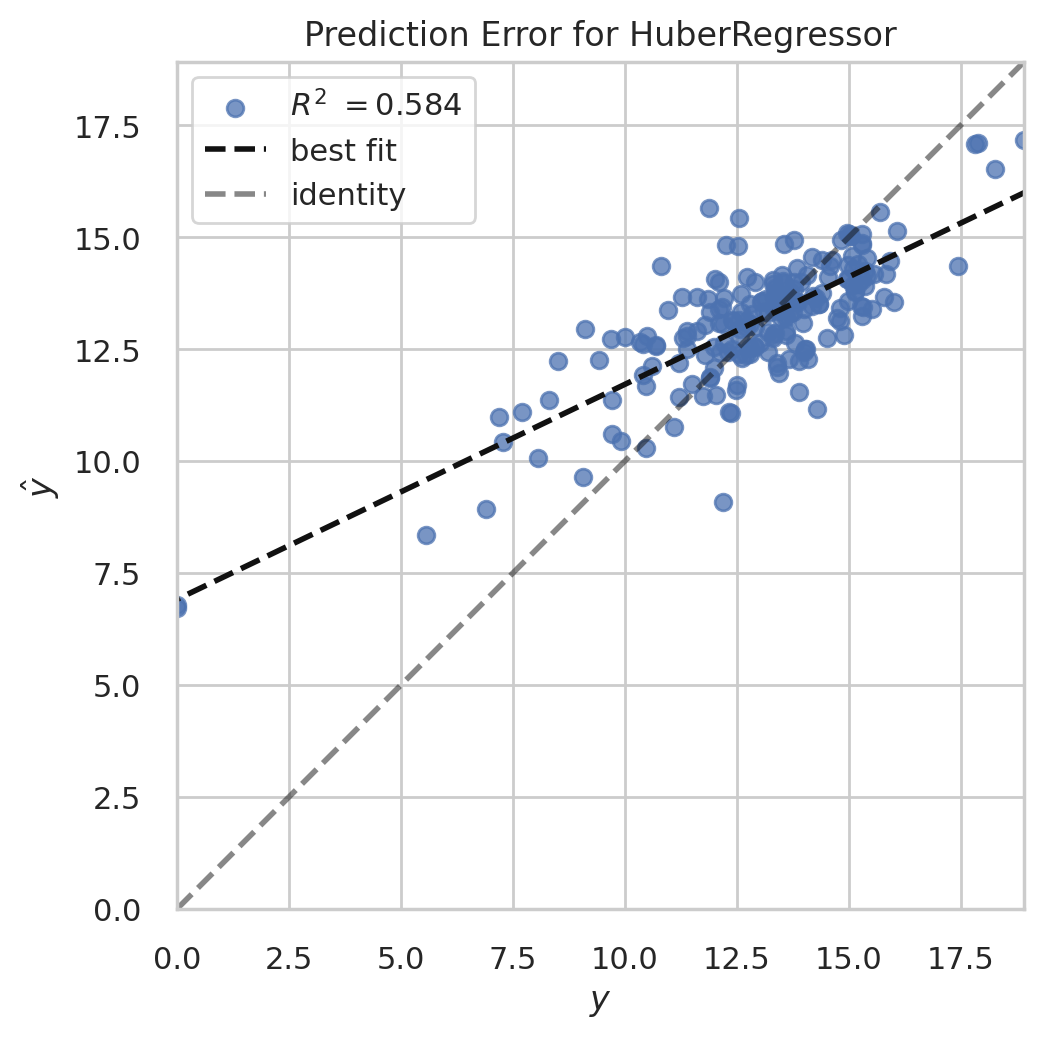

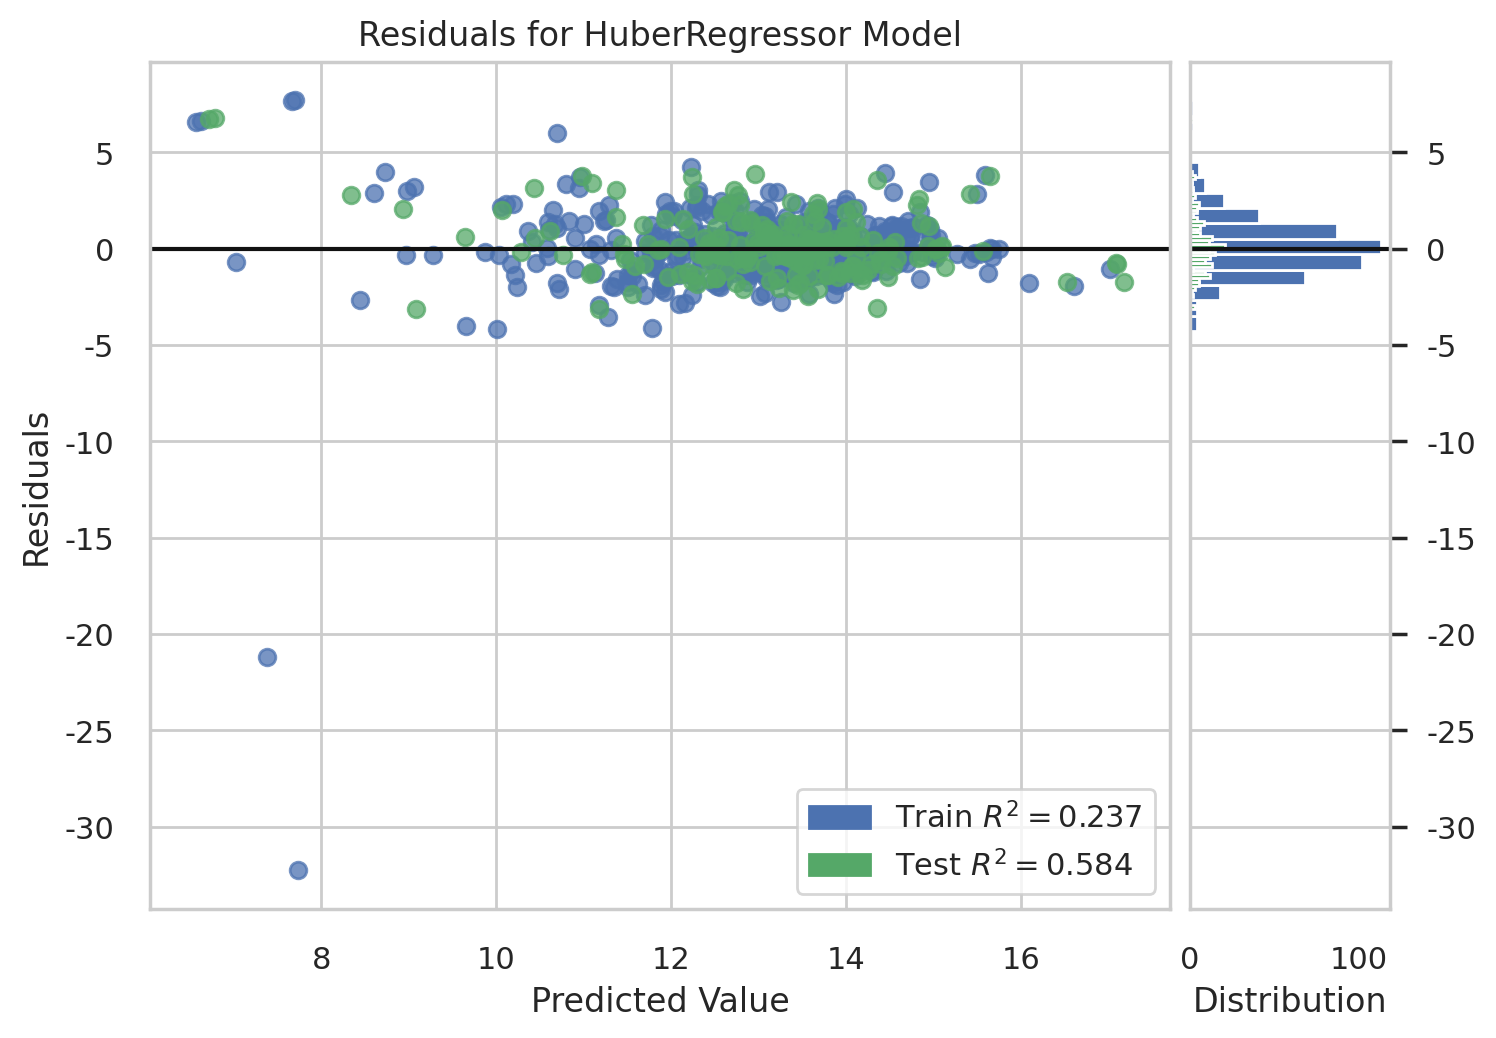

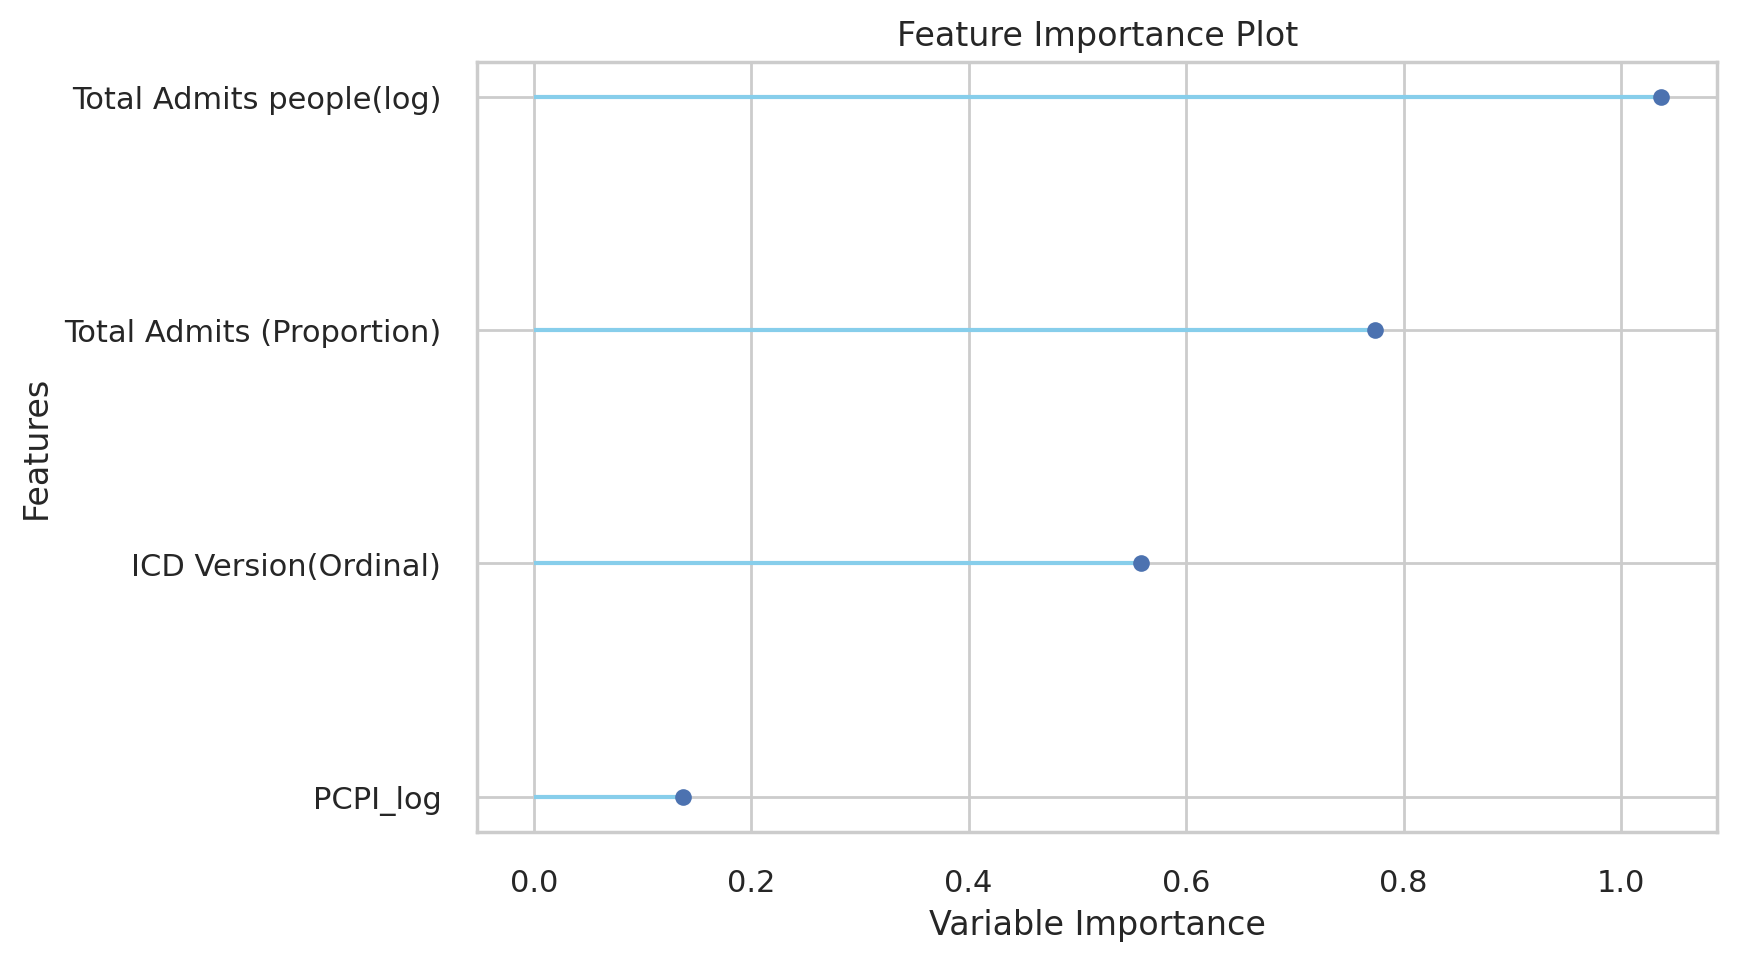

In [121]:
exp = RegressionExperiment()
s = exp.setup(
    data=hospital_needed,
    target='30-day Readmission Rate (Consolidated)',
    ignore_features=['County', 'Year'],
    normalize =True,  # 標準化讓尺度一樣
    transformation=False,  # 對數轉換，我已經轉過了
    data_split_shuffle = True,  # 打亂
    fold_shuffle = True,        # 打亂
    session_id=123
) 
best = s.compare_models()
exp.plot_model(best, plot='error')
exp.plot_model(best, plot='residuals')
exp.plot_model(best, plot='feature')

## 特徵向下平移再排序

In [122]:
hospital_needed['last_year_rate'] = hospital_needed.groupby('County')['30-day Readmission Rate (Consolidated)'].shift(1)
display(hospital_needed)  # 先按照地區排序做平移，再按照年份做排序，因為後面要實作時間序列驗證
hospital_needed = hospital_needed.sort_values(by=['Year', 'County'])
display(hospital_needed)

Year   County  30-day Readmission Rate (Consolidated)  \
0    2011  Alameda                                   15.10   
57   2012  Alameda                                   14.50   
114  2013  Alameda                                   14.40   
171  2014  Alameda                                   14.40   
228  2015  Alameda                                   14.04   
..    ...      ...                                     ...   
455  2018     Yuba                                   14.58   
512  2019     Yuba                                   15.54   
569  2020     Yuba                                   15.78   
626  2021     Yuba                                   15.09   
683  2022     Yuba                                   14.89   

     Total Admits (Proportion)  ICD Version(Ordinal)   PCPI_log  \
0                     0.049058                     0  10.828401   
57                    0.046394                     0  10.864694   
114                   0.042844                     0  10.899181   
171                   0.040568                     0  10.950982   
228                   0.030146                     0  11.028726   
..                         ...                   ...        ...   
455                   0.065308                     1  10.583220   
512                   0.064648                     1  10.628109   
569                   0.055065                     1  10.726456   
626                   0.057337                     1  10.804685   
683                   0.050229                     1  10.787234   

     Total Admits people(log)  last_year_rate  
0                   11.226629             NaN  
57                  11.185587           15.10  
114                 11.122457           14.50  
171                 11.085521           14.40  
228                 10.805071           14.40  
..                        ...             ...  
455                  8.528529           15.44  
512                  8.532870           14.58  
569                  8.414939           15.54  
626                  8.470730           15.78  
683                  8.351847           15.09  

[684 rows x 8 columns]

Year     County  30-day Readmission Rate (Consolidated)  \
0    2011    Alameda                                   15.10   
1    2011     Alpine                                    7.70   
2    2011     Amador                                   13.00   
3    2011      Butte                                   15.70   
4    2011  Calaveras                                   12.10   
..    ...        ...                                     ...   
679  2022     Tulare                                   12.16   
680  2022   Tuolumne                                   14.59   
681  2022    Ventura                                   13.93   
682  2022       Yolo                                   14.27   
683  2022       Yuba                                   14.89   

     Total Admits (Proportion)  ICD Version(Ordinal)   PCPI_log  \
0                     0.049058                     0  10.828401   
1                     0.011894                     0  10.897498   
2                     0.070780                     0  10.458751   
3                     0.092834                     0  10.424363   
4                     0.072034                     0  10.532549   
..                         ...                   ...        ...   
679                   0.037915                     1  10.757818   
680                   0.059282                     1  10.869825   
681                   0.041126                     1  11.211753   
682                   0.031732                     1  11.059504   
683                   0.050229                     1  10.787234   

     Total Admits people(log)  last_year_rate  
0                   11.226629             NaN  
1                    2.639057             NaN  
2                    7.885329             NaN  
3                    9.924417             NaN  
4                    8.087640             NaN  
..                        ...             ...  
679                  9.804772           13.16  
680                  8.082402           13.68  
681                 10.441559           13.78  
682                  8.860215           14.56  
683                  8.351847           15.09  

[684 rows x 8 columns]

## 移除第一年因為為空

In [123]:
hospital_final = hospital_needed.dropna(subset=['last_year_rate'])
display(hospital_final)

Year     County  30-day Readmission Rate (Consolidated)  \
57   2012    Alameda                                   14.50   
58   2012     Alpine                                    0.00   
59   2012     Amador                                   14.80   
60   2012      Butte                                   15.70   
61   2012  Calaveras                                   13.40   
..    ...        ...                                     ...   
679  2022     Tulare                                   12.16   
680  2022   Tuolumne                                   14.59   
681  2022    Ventura                                   13.93   
682  2022       Yolo                                   14.27   
683  2022       Yuba                                   14.89   

     Total Admits (Proportion)  ICD Version(Ordinal)   PCPI_log  \
57                    0.046394                     0  10.864694   
58                    0.009001                     0  10.938343   
59                    0.074788                     0  10.481056   
60                    0.094600                     0  10.449786   
61                    0.071805                     0  10.529426   
..                         ...                   ...        ...   
679                   0.037915                     1  10.757818   
680                   0.059282                     1  10.869825   
681                   0.041126                     1  11.211753   
682                   0.031732                     1  11.059504   
683                   0.050229                     1  10.787234   

     Total Admits people(log)  last_year_rate  
57                  11.185587           15.10  
58                   2.397895            7.70  
59                   7.928766           13.00  
60                   9.947313           15.70  
61                   8.076826           12.10  
..                        ...             ...  
679                  9.804772           13.16  
680                  8.082402           13.68  
681                 10.441559           13.78  
682                  8.860215           14.56  
683                  8.351847           15.09  

[627 rows x 8 columns]

## 缺失直檢查


In [124]:
missing_counts = hospital_final.isnull().sum()
print("--- 各欄位缺失值數量 ---")
display(pd.DataFrame(missing_counts))

--- 各欄位缺失值數量 ---


0
Year                                    0
County                                  0
30-day Readmission Rate (Consolidated)  0
Total Admits (Proportion)               0
ICD Version(Ordinal)                    0
PCPI_log                                0
Total Admits people(log)                0
last_year_rate                          0

## 切分資料

In [125]:
hospital_final['Year'] = hospital_final['Year'].astype(int)
train = hospital_final[hospital_final['Year'] <= 2019]
test = hospital_final[hospital_final['Year'] > 2019]
display(train)
display(test)

Year     County  30-day Readmission Rate (Consolidated)  \
57   2012    Alameda                                   14.50   
58   2012     Alpine                                    0.00   
59   2012     Amador                                   14.80   
60   2012      Butte                                   15.70   
61   2012  Calaveras                                   13.40   
..    ...        ...                                     ...   
508  2019     Tulare                                   14.14   
509  2019   Tuolumne                                   13.52   
510  2019    Ventura                                   14.89   
511  2019       Yolo                                   14.19   
512  2019       Yuba                                   15.54   

     Total Admits (Proportion)  ICD Version(Ordinal)   PCPI_log  \
57                    0.046394                     0  10.864694   
58                    0.009001                     0  10.938343   
59                    0.074788                     0  10.481056   
60                    0.094600                     0  10.449786   
61                    0.071805                     0  10.529426   
..                         ...                   ...        ...   
508                   0.047255                     1  10.592702   
509                   0.065961                     1  10.733588   
510                   0.047766                     1  11.049715   
511                   0.036170                     1  10.919841   
512                   0.064648                     1  10.628109   

     Total Admits people(log)  last_year_rate  
57                  11.185587           15.10  
58                   2.397895            7.70  
59                   7.928766           13.00  
60                   9.947313           15.70  
61                   8.076826           12.10  
..                        ...             ...  
508                  9.999252           13.28  
509                  8.183677           12.02  
510                 10.604727           14.50  
511                  8.982059           13.30  
512                  8.532870           14.58  

[456 rows x 8 columns]

Year     County  30-day Readmission Rate (Consolidated)  \
513  2020    Alameda                                   15.28   
514  2020     Alpine                                   28.57   
515  2020     Amador                                   14.21   
516  2020      Butte                                   18.26   
517  2020  Calaveras                                   13.52   
..    ...        ...                                     ...   
679  2022     Tulare                                   12.16   
680  2022   Tuolumne                                   14.59   
681  2022    Ventura                                   13.93   
682  2022       Yolo                                   14.27   
683  2022       Yuba                                   14.89   

     Total Admits (Proportion)  ICD Version(Ordinal)   PCPI_log  \
513                   0.032648                     1  11.387260   
514                   0.005809                     1  11.213387   
515                   0.061295                     1  10.766103   
516                   0.093433                     1  10.845914   
517                   0.058393                     1  10.899070   
..                         ...                   ...        ...   
679                   0.037915                     1  10.757818   
680                   0.059282                     1  10.869825   
681                   0.041126                     1  11.211753   
682                   0.031732                     1  11.059504   
683                   0.050229                     1  10.787234   

     Total Admits people(log)  last_year_rate  
513                 10.912631           15.62  
514                  2.079442            0.00  
515                  7.818028           13.55  
516                  9.885120           18.09  
517                  7.881937           15.31  
..                        ...             ...  
679                  9.804772           13.16  
680                  8.082402           13.68  
681                 10.441559           13.78  
682                  8.860215           14.56  
683                  8.351847           15.09  

[171 rows x 8 columns]

## 時間序列問題轉換為監督式學習

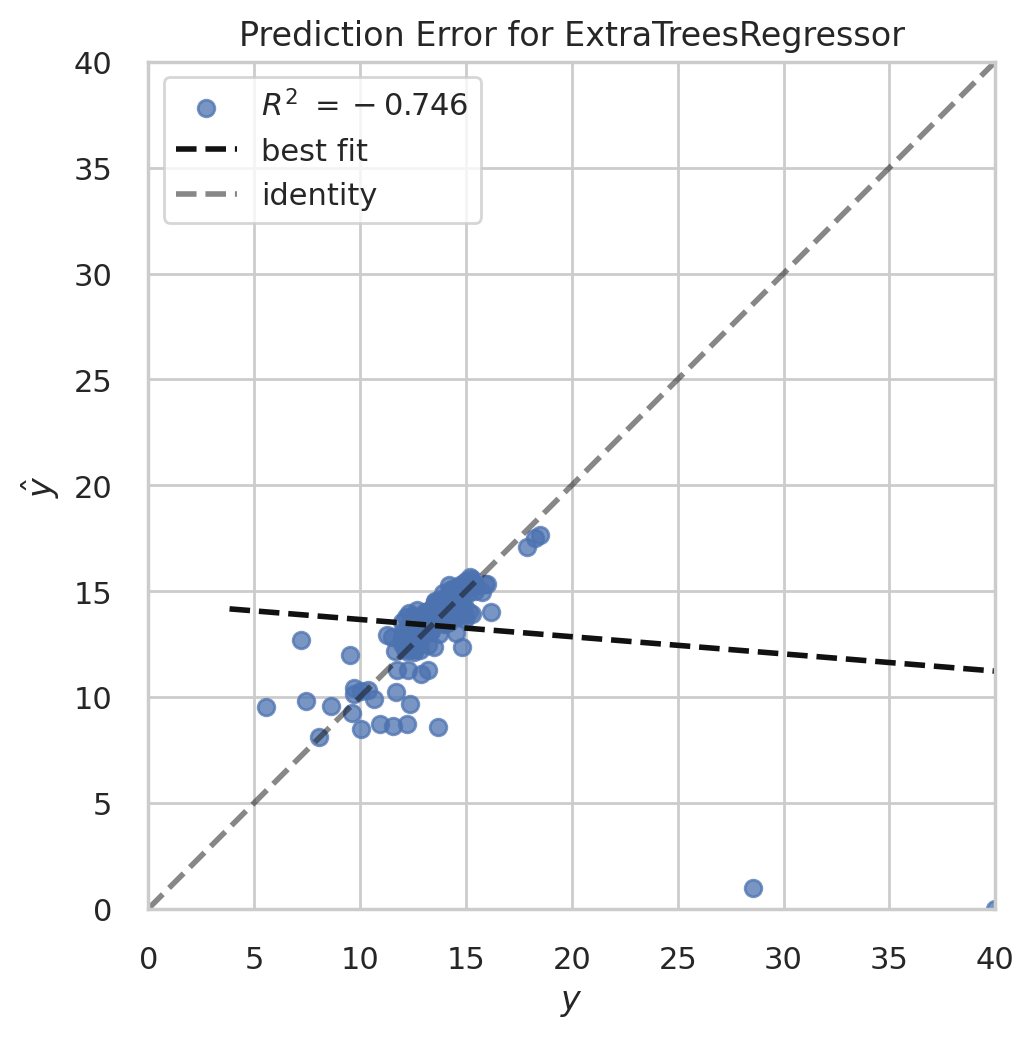

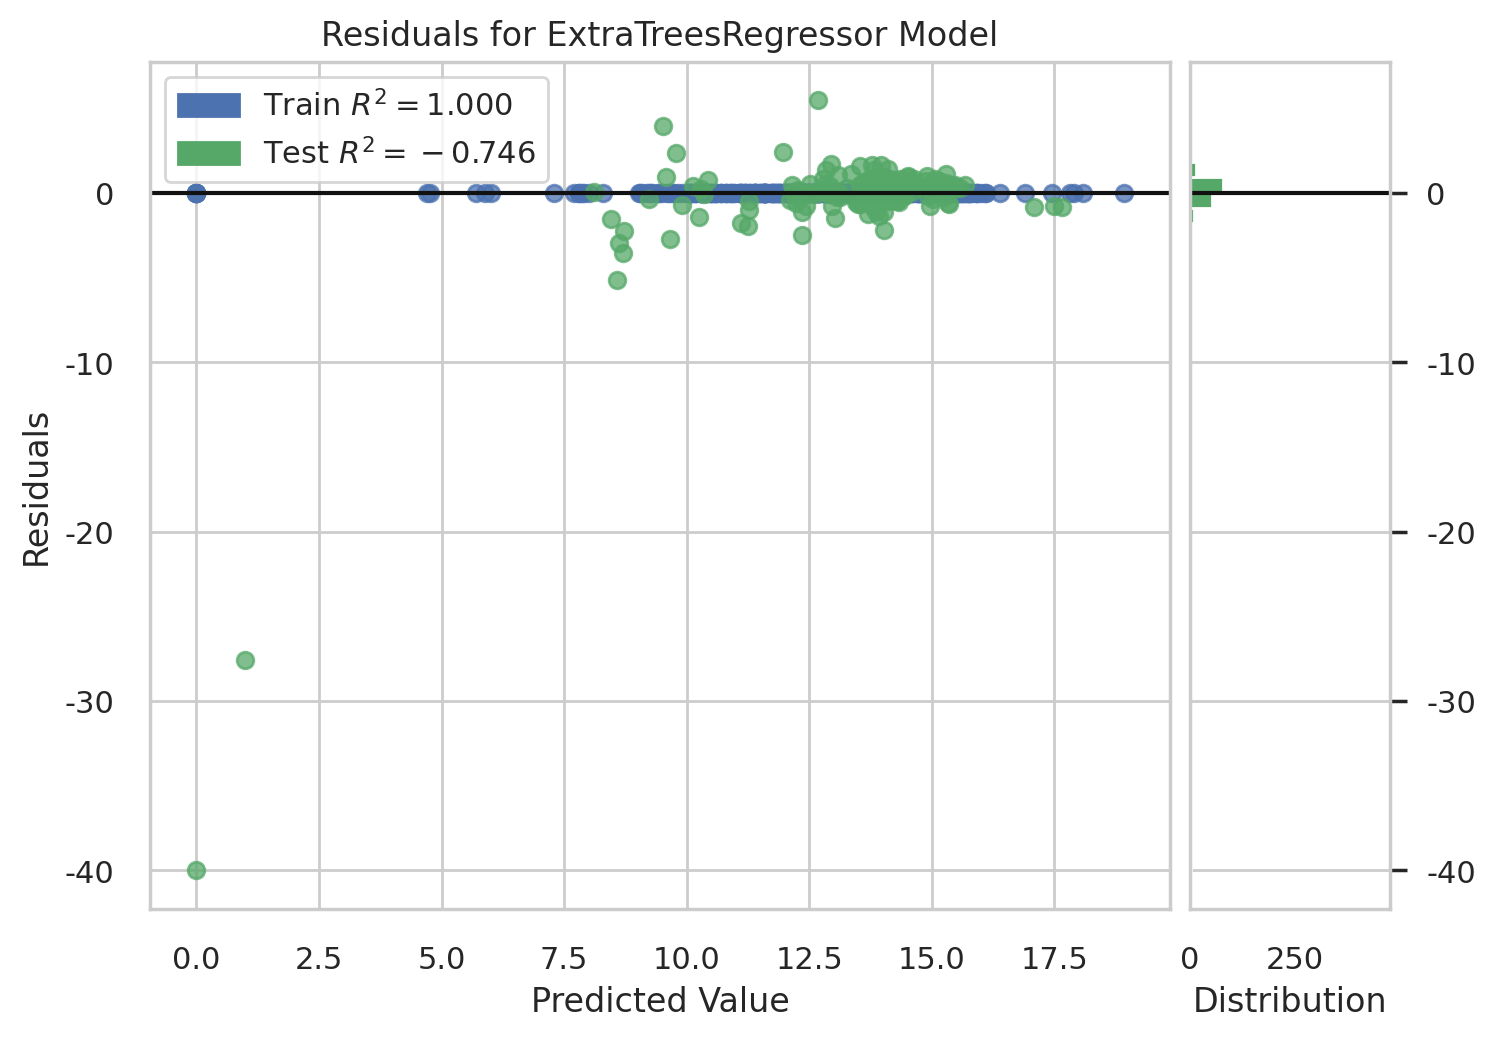

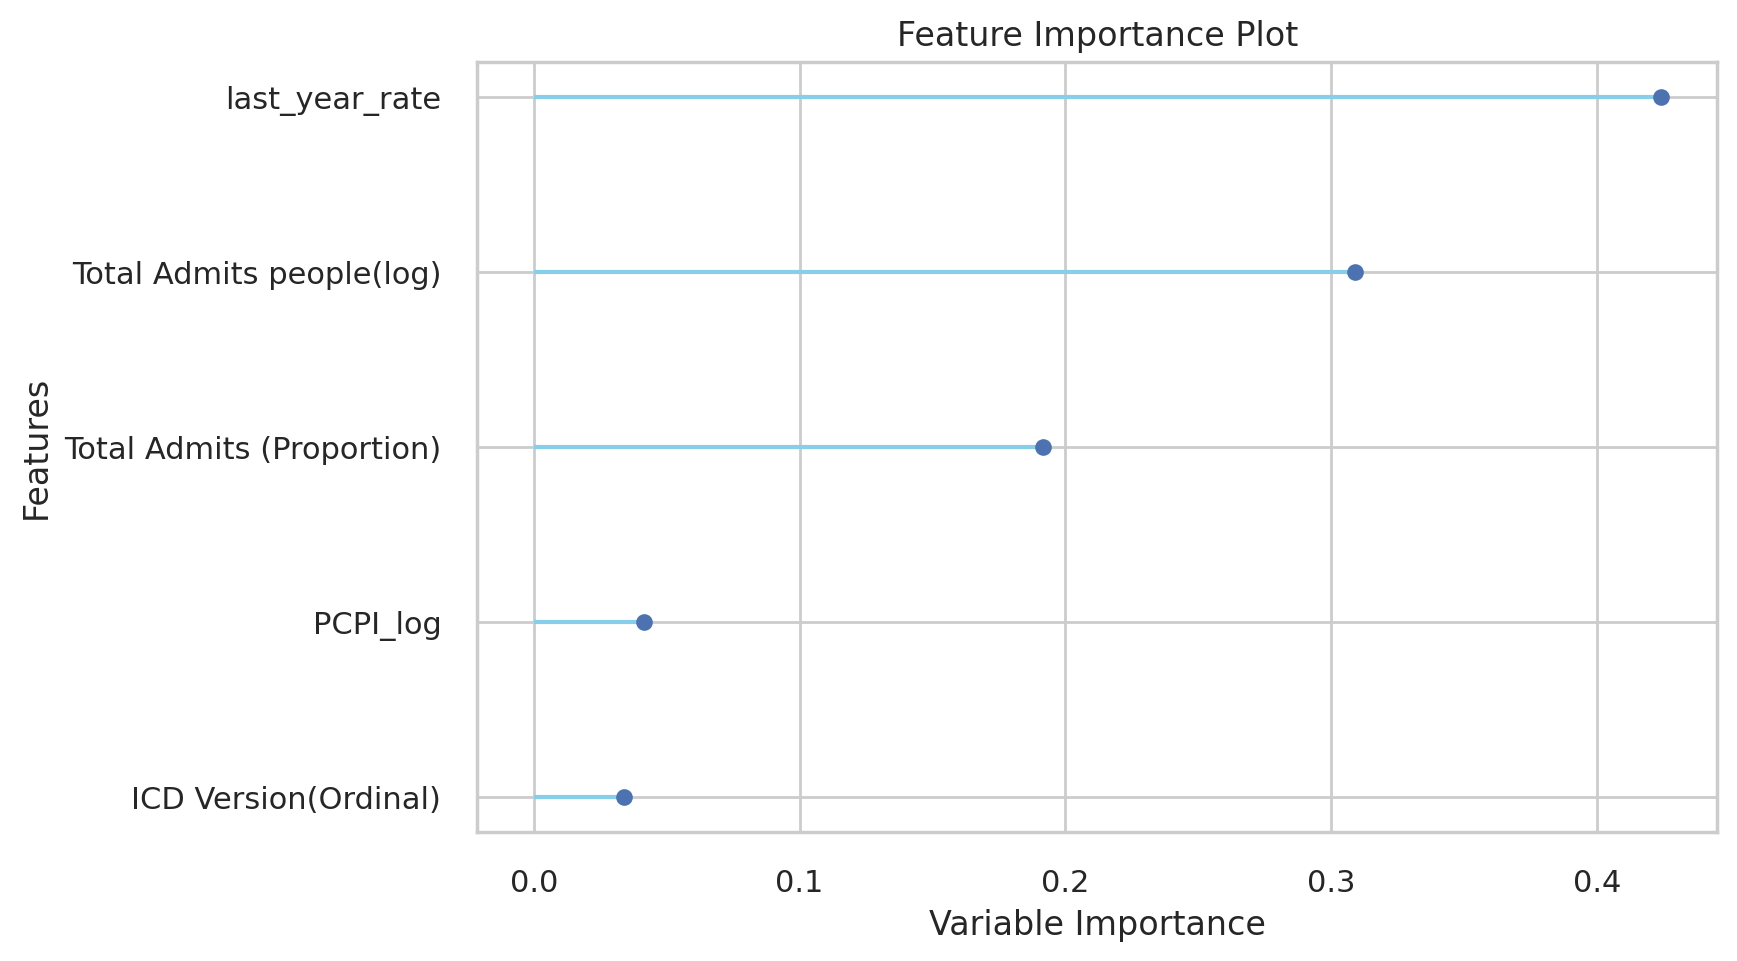

In [126]:
exp = RegressionExperiment()
s = exp.setup(
    data=train,
    test_data=test,
    target='30-day Readmission Rate (Consolidated)',
    ignore_features=['County', 'Year'],
    normalize =True,  # 標準化讓尺度一樣
    transformation=False,  # 對數轉換，我已經轉過了
    fold_strategy = 'timeseries',  # 時間序列驗證
    data_split_shuffle = False,  # 切分訓練/測試集時，不准打亂
    fold_shuffle = False,        # 切分 Fold 時，也不准打亂
    session_id=123
) 
best = s.compare_models()
exp.plot_model(best, plot='error')
exp.plot_model(best, plot='residuals')
exp.plot_model(best, plot='feature')

## 儲存模型

In [109]:
# 1. 建立最佳模型 (Create)
model = s.create_model('et')
# 1.1 優化模型
# custom_grid = {  # 優化無效!!!
#     # 限制最大深度，讓樹不要長得太深
#     'max_depth': [5, 7, 10, 15], 
    
#     # 限制樹的數量
#     'n_estimators': [100, 200, 300],
    
#     # 限制每棵樹只看部分特徵（增加隨機性，對抗過擬合）
#     'max_features': ['sqrt', 0.5, 0.7], 
    
#     # 強制每棵樹至少有 4 個樣本才能繼續分裂
#     'min_samples_leaf': [2, 4] 
# }
# tun_model = s.tune_model(model, custom_grid=custom_grid, optimize='R2', n_iter=50)

# 2. 最終確認 (Finalize) - 用全部資料訓練一次
final_model = s.finalize_model(model)
# final_model = s.finalize_model(tun_model)

# 3. 預測看看 (Predict) - 拿測試集來跑
pred = s.predict_model(final_model, data=test)
print(pred.head())

# 4. 儲存模型 (Save)
s.save_model(final_model, 'my_best_hospital_readmission_model')

     Year     County  Total Admits (Proportion)  30-day Readmits (Proportion)  \
513  2020    Alameda                   0.032648                      0.004987   
514  2020     Alpine                   0.005809                      0.001660   
515  2020     Amador                   0.061295                      0.008711   
516  2020      Butte                   0.093433                      0.017059   
517  2020  Calaveras                   0.058393                      0.007895   

     ICD Version(Ordinal)  Population(log)   PCPI_log  \
513                     1        14.334582  11.387260   
514                     1         7.095064  11.213387   
515                     1        10.609699  10.766103   
516                     1        12.255587  10.845914   
517                     1        10.722143  10.899070   

     Total Admits people(log)  30-day people(log)  last_year_rate  \
513                 10.912631            9.033842           15.62   
514                  2.079442   

(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Total Admits (Proportion)',
                                              '30-day Readmits (Proportion)',
                                              'ICD Version(Ordinal)',
                                              'Population(log)', 'PCPI_log',
                                              'Total Admits people(log)',
                                              '30-day people(log)',
                                              'last_year_rate'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('clean_column_names',
                  TransformerWrapper(trans

## 相關係數熱力圖

In [32]:
# Based on original code by Josh Haber
# Source: https://www.kaggle.com/code/joshhaber/eda-hospital-readmission-rates
features = [
    '年度', 
    "ICD 版本", 
    '總入院人數', 
    '30天再入院人數',
    '30天再入院率',
    '人均收入', 
    '人口數',
    '醫療利用率',
    '30天再入院醫療利用率'
]
corr_matrix = hospital_chinese[features].corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 18})
plt.title("相關係數熱力圖", fontproperties=my_font, fontsize=18)
plt.xticks(fontproperties=my_font, rotation=45, ha='right', fontsize=18) 
plt.yticks(fontproperties=my_font, rotation=0, fontsize=18)
plt.show()

ValueError: could not convert string to float: 'ICD-9'

## 合併分群結果到資料集

In [ ]:
cluster_interpretations = {
    '0': "一般標準型",  # 
    '1': "醫療弱勢區",  # 低人口、低收入
    '2': "養老勝地",  # 低人口、高收入、低再入院率
    '3': "繁忙都會區"  # "高人口、高醫療使用率"
}
hospital['cluster_id'] = kmeans.labels_.astype(str)
hospital['cluster_id'] = hospital['cluster_id'].map(cluster_interpretations)
display(hospital)

## 繪製地圖

In [ ]:
import plotly.express as px
from urllib.request import urlopen
import json
url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson"
with urlopen(url) as response:
    counties_geojson = json.load(response)
def plot_clusters_on_geo():
    cluster_color_map = {
        '一般標準型': 'green',
        '醫療弱勢區': 'orange',
        '養老勝地': 'blue',
        '繁忙都會區': 'red'
    }
    # 2. 繪圖
    fig = px.choropleth(
        hospital,
        geojson=counties_geojson,
        locations='County',             
        featureidkey="properties.name", 
        color='cluster_id',         # 這裡放入分群欄位
        color_discrete_map=cluster_color_map, # 使用自定義的離散顏色表
        category_orders={'cluster_id': list(cluster_color_map.keys())},  # 鎖定圖例順序 (防止動畫播放時圖例上下跳動)
        animation_frame='Year',          # 設定時間軸
        title=f'加州各郡分群年度變化圖'
    )

    # 3. 優化動畫流暢度
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 500  # 稍微調慢一點(500ms)比較好看清楚分群變化
    fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0 
    
    # 4. 地圖邊界設定
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":40,"t":40,"l":40,"b":40})
    
    fig.show()
def plot_feature_on_geo(name):
    val_min = hospital[name].min()
    val_max = hospital[name].max()
    fig = px.choropleth(
        hospital,
        geojson=counties_geojson,
        locations='County',            # 對應 DataFrame 中的地名欄位
        featureidkey="properties.name", # 對應 GeoJSON 中的地名屬性
        color=name,     # 顏色深淺代表數值
        animation_frame='Year',         # 【關鍵】設定時間軸滑桿
        color_continuous_scale="YlOrRd",  # 設定紅色列系 (越高越紅)
        range_color=(val_min, val_max),            # 固定顏色範圍，避免年份切換時顏色標準亂跳
        title=f'加州各郡{name}年度等值區域圖'
    )
    fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100    # 每幀停留時間 (毫秒)，越小越快
    fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0 # 轉場過渡時間，設為 0 可避免拖泥帶水
    fig.update_geos(fitbounds="locations", visible=False)
    fig.update_layout(margin={"r":40,"t":40,"l":40,"b":40})
    fig.show()

In [ ]:
plot_clusters_on_geo()

## 收入與 30 天再入院率散點圖

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCPI', y='30-day Readmission Rate (Consolidated)', data=hospital)
plt.title('收入與再入院率散點圖', fontproperties=my_font, fontsize=18)
plt.xlabel('收入', fontproperties=my_font, fontsize=18)
plt.ylabel('再入院率 (%)', fontproperties=my_font, fontsize=18)
plt.grid(True)
plt.show()

## 收入(X), 30 天再入院數(Y), 30 天再入院率(Z) 散點圖

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 繪圖
scatter = ax.scatter(hospital['PCPI'], hospital['30-day Readmits (Consolidated)'], hospital['30-day Readmission Rate (Consolidated)'],
                     c=hospital['30-day Readmission Rate (Consolidated)'], cmap='viridis')

# 設定標籤
ax.set_xlabel('收入 (PCPI)', fontproperties=my_font, fontsize=18)
ax.set_ylabel('30 天再入院數', fontproperties=my_font, fontsize=18)
ax.set_zlabel('再入院率 (%)')

# 加入顏色條
plt.colorbar(scatter, label='再入院率 (%)')
plt.show()

## ICD 版本

In [ ]:
plot_feature_on_geo("ICD Version")

## 總入院人數

In [ ]:
plot_feature_on_geo("Total Admits (Consolidated)")

## 30 天再入院人數

In [ ]:
plot_feature_on_geo("30-day Readmits (Consolidated)")

## 30 天再入院率

In [ ]:
plot_feature_on_geo("30-day Readmission Rate (Consolidated)")

## 人均個人收入

In [ ]:
plot_feature_on_geo("PCPI")

## 人口數

In [ ]:
plot_feature_on_geo("Population")

## 醫療利用率

In [ ]:
plot_feature_on_geo("Total Admits (Proportion)")

## 30天再入院醫療利用率

In [ ]:
pladd Codeadd Markdown
arrow_upwardarrow_downwarddelete
ot_feature_on_geo("30-day Readmits (Proportion)")

## 各分群特徵畫像

In [ ]:
plt.figure(figsize=(10, 6))
# 使用標準化後的數據畫圖會比較準，這裡先用原始數據示意
sns.heatmap(cluster_profile, annot=True, cmap='RdYlGn', fmt='.1f')
plt.title('各分群特徵畫像 (Cluster Profiling)')
plt.show()

In [ ]:
exp.get_config('y_train')

## 預測資料

In [ ]:
new_data = hospital.sample(5)
new_data_unseen = new_data.drop(columns=['30-day Readmission Rate (Consolidated)'])
predictions = exp.predict_model(best, data=new_data_unseen)
display(predictions.head())
display(new_data['30-day Readmission Rate (Consolidated)'])

# 3. 處理數據（特徵工程）

## *30天內再入院率*(目標值) **分袋**

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
median_value = hospital["30-day Readmission Rate (Consolidated)"].median()

# 確保每組數量一致
hospital['30-day Readmission Rate (Binning)'] = pd.qcut(
    hospital["30-day Readmission Rate (Consolidated)"],
    q=3,
    labels=[0, 1, 2]
)
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # 必須加入這行
# --- 繪製左側子圖：原始分佈 ---
# 中位數位置： 綠色虛線顯示中位數在 13.32%，這再次確認了數據的中心位置。
# 偏態： 雖然主體分佈看起來大致對稱，但在右側（高再入院率方向，約 20%以上拖著一條長長的尾巴，直到 30%甚至40%附近都還有零星的觀察值。
# 這顯示您的目標值是具有右偏態的，即有極少數縣市年度組合的再入院率遠高於平均水準。
sns.histplot(
    data=hospital,
    x="30-day Readmission Rate (Consolidated)",
    bins=15,
    kde=True,
    color='skyblue',
    edgecolor='black',
    line_kws={'linewidth': 2, 'alpha': 0.8, 'color': 'red'},
    ax=axes[0] # 指定繪製到第一個子圖 (左側),
)
# 標示中位數
axes[0].set_title('Original distribution - skewed (30-day readmission rate (summary))')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('30-day Readmission Rate (Consolidated)') # 補上 X 軸標籤設定
axes[0].legend()
sns.countplot(
    data=hospital,
    x="30-day Readmission Rate (Binning)", # 使用新的類別欄位
    order=[0, 1, 2], # 確保順序正確
    color='lightcoral', 
    edgecolor='black',
    ax=axes[1] # 指定繪製到第二個子圖
)
axes[1].set_title('Distribution of the two types of risks after bining', fontsize=14)
risk_summary = hospital.groupby('30-day Readmission Rate (Binning)')["30-day Readmission Rate (Consolidated)"].agg(
    # 定義輸出的欄位名稱
    Min_Rate=('min'),
    Max_Rate=('max'),
    Count=('count')
)
low_rmn_label = f'{risk_summary.iloc[0][0]}%~{risk_summary.iloc[0][1]}%'
mid_rmn_label = f'{risk_summary.iloc[1][0]}%~{risk_summary.iloc[1][1]}%'
high_rmn_label = f'{risk_summary.iloc[2][0]}%~{risk_summary.iloc[2][1]}%'
axes[1].set_xlabel(
     f'{low_rmn_label}             {mid_rmn_label}                  {high_rmn_label}',
    fontsize=12
)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend().remove() # Count Plot 不需要 legend
# 調整子圖之間的間距
plt.tight_layout()
plt.show()
# display(hospital)
display(hospital.iloc[:, [5, 12]])

## 特徵篩選

**移除洩漏風險欄位**

刪除「30天內再入院人次」和「總入院人次」，因為這些欄位直接暗示答案造成數據洩漏。若將再入院人次納入訓練，模型只需學會簡單除法就能達到100%準確率，並且實際中我們無法事前得知再入院人次，因此這些變數必須排除。

**移除高基數識別欄位**

移除「County(地區)」欄位，使用「人均收入」與「人口數」具體變數描述地區特性。此策略避免模型單純記憶特定地區標籤(如"Los Angeles")，而是學習通用的社會指標規律，使其能應用於未見過的新地區。

In [ ]:
X = hospital.iloc[:, [0, 10, 6, 7, 8]]
y = hospital.iloc[:, [12]]
display(hospital)
hospital_preprocessed = pd.concat([X, y], axis=1)
display(hospital_preprocessed)

# 4. 玩資料

## PCA 實作（一）
在 PCA 分析中，「觀察值」通常指的是變數 (Columns/Features) 的選擇。

對於您的資料集，放入 PCA 的黃金準則如下：

1. 必選：連續數值變數 (Continuous Numerical Variables)
這些是 PCA 最擅長處理的資料，包含原本在成對關係圖中糾纏不清的那些欄位。

Population (人口數)

Total Admits (總入院數)

PCPI (人均收入)

(若有計算) Admission_Density (入院密度)

💡 關鍵優勢：您不需要像在 Pairplot 中那樣擔心 Population 和 Total Admits 高度相關。PCA 會自動偵測到它們的共線性，並將它們合併到第一個主成分 (PC1) 中。您可以把這兩個都放進去。


ICD Version (0 或 1)：可以放入。這有助於區分資料是屬於舊制還是新制時期。

3. 絕對排除：目標與非數值欄位
千萬不要放入這些，否則會導致 Data Leakage (資料洩漏) 或程式錯誤。

❌ 30-day Readmission Rate (Target)：这是答案，不能當作輸入。它是用來在畫完 PCA 圖後，把點上色用的。

❌ 縣市名稱 (County Name)：無法進行數學運算的文字欄位。

請遵循 「保留資訊量最大、相關性最低」 的原則。

建議您的 PCA 輸入欄位：

Admission_Density (取代 Total Admits)

Population (或 Log_Population)

PCPI

ICD Version

In [ ]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_X)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(
    pca_result,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))]
)

# Step 3: Scatterplot of the First Two Principal Components
pca_df['Risk_Level'] = hospital_preprocessed['30-day Readmission Rate (Binning)'].values
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=pca_df,
    hue="Risk_Level",
    palette="coolwarm",
    alpha=0.8
)
plt.title("PCA: First Two Principal Components", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
plt.ylabel("Principal Component 2 (PC2)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Risk_Level", fontsize=8)
plt.grid(True)
plt.show()

這張 PCA 圖其實透露了非常重要的訊息，它並非完全「雜亂無章」，而是告訴了您：目前的特徵中，影響資料差異最大的因素並不是「風險等級」，而是別的東西。

我們可以從圖中觀察到兩個關鍵現象：

1. 中間的巨大鴻溝（The Gap）
請看您的 PCA 圖，資料被硬生生地分成了左右兩大群（左邊一群，右邊一群）。

原因判斷：這幾乎可以肯定是 ICD Version (0 vs 1) 或 Year 造成的。

解釋：PCA 的工作是找出「讓資料差異最大」的變數。因為您的資料經歷了 ICD-9 到 ICD-10 的改制，這對資料結構的衝擊遠大於「風險高低」的差異。所以 PC1（X 軸）實際上是在區分「舊制資料」與「新制資料」。

2. 顏色（風險）混合在一起
在左右這兩大群內部，藍色（0）、灰色（1）、橘色（2）的點是均勻混合的。

解釋：這代表在扣除掉年份/改制的影響後，剩下的人口 (Population)、收入 (PCPI)、入院數等特徵，在線性空間上無法區分風險高低。也就是說，一個「人多錢多」的縣市，既可能是高風險，也可能是低風險。

## PCA 實作（二）

In [ ]:
X = hospital.iloc[:, [10, 6, 7, 8]]
y = hospital.iloc[:, [12]]
display(hospital)
hospital_preprocessed = pd.concat([X, y], axis=1)
display(hospital_preprocessed)

In [ ]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Step 2: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_X)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(
    pca_result,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))]
)

# Step 3: Scatterplot of the First Two Principal Components
pca_df['Risk_Level'] = hospital_preprocessed['30-day Readmission Rate (Binning)'].values
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=pca_df,
    hue="Risk_Level",
    palette="coolwarm",
    alpha=0.8
)
plt.title("PCA: First Two Principal Components", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
plt.ylabel("Principal Component 2 (PC2)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Risk_Level", fontsize=8)
plt.grid(True)
plt.show()

## PCA 實作（三）

In [ ]:
# Select only numeric columns for PCA
numeric_cols = ['PCPI', 'Total Admits (Proportion)', '30-day Readmits (Proportion)', '30-day Readmission Rate (Consolidated)', 'Population']
df_numeric = df[numeric_cols]

# Step 1: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 2: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(
    pca_result,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))]
)

# Step 3: Scatterplot of the First Two Principal Components
pca_df['County'] = df.reset_index()['County']  # Add county names for labeling
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    data=pca_df,
    hue="County",
    palette="coolwarm",
    alpha=0.8
)
plt.title("PCA: First Two Principal Components", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
plt.ylabel("Principal Component 2 (PC2)", fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="County", fontsize=8)
plt.grid(True)
plt.show()

In [ ]:
# Step 1: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Step 2: Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Step 3: Extract PCA loadings (components)
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to align features with components
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=numeric_cols  # Feature names as the index
)

# Step 4: Visualize Feature Contributions for PC1 and PC2
plt.figure(figsize=(12, 6))

# Bar plot for PC1
plt.subplot(1, 2, 1)
loadings["PC1"].plot(kind='bar', color='steelblue')
plt.title("Feature Contribution to PC1", fontsize=14)
plt.ylabel("Contribution", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Bar plot for PC2
plt.subplot(1, 2, 2)
loadings["PC2"].plot(kind='bar', color='indianred')
plt.title("Feature Contribution to PC2", fontsize=14)
plt.ylabel("Contribution", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare data (PC1 and PC2 for clustering)
pca_data = pca_df[['PC1', 'PC2']]

# Elbow Method
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=12)
plt.grid(True)
plt.show()

# Silhouette Score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, cluster_labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Score for Optimal Clusters", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Define interpretations for each cluster
cluster_interpretations = {
    0: "High population, high readmission rates, low PCPI",
    1: "Low population, low PCPI, minimal healthcare utilization",
    2: "Large population, low readmission rates, high PCPI",
    3: "Moderate population, average readmission rates, moderate PCPI"
}

# Visualize Clusters on PCA Plot
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x='PC1', y='PC2', hue='Cluster', data=pca_df,
    palette='Set2', alpha=0.8
)
plt.title("PCA Clusters", fontsize=16)
plt.xlabel("Principal Component 1 (PC1)", fontsize=14)
plt.ylabel("Principal Component 2 (PC2)", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add cluster interpretation text to the plot
# Adjust the positions of the cluster interpretation text
for cluster_id, interpretation in cluster_interpretations.items():
    # Get the cluster center from K-Means
    cluster_center = kmeans.cluster_centers_[cluster_id]

    # Adjust text positions for specific clusters
    if cluster_id == 2:  # Move Cluster 2 down
        cluster_center[1] -= 1.5
    elif cluster_id == 3:  # Move Cluster 3 to the right
        cluster_center[0] += 2
        cluster_center[1] -= .5
    elif cluster_id == 1: 
        cluster_center[1] += .75

    # Add the text to the plot
    plt.text(
        cluster_center[0], cluster_center[1],  # Position
        f"Cluster {cluster_id}: {interpretation}",
        fontsize=10, color='black', ha='center', bbox=dict(facecolor='white', alpha=0.6)
    )


plt.grid(True)
plt.tight_layout()
plt.show()

## ICD 對 30 天再入院率的箱型圖
1. 兩者平均水準差異不大 (Medians are similar)
觀察：看盒子中間的那條橫線（中位數）。

解讀：ICD-9 和 ICD-10 的中位數都在 13% - 14% 左右。

結論：這表示不管是用舊版 (ICD-9) 還是新版 (ICD-10) 的編碼系統，整體的再入院率趨勢是穩定的，並沒有因為換了編碼系統就大幅波動。

2. ICD-10 出現了驚人的「極端案例」 (Extreme Outliers)
觀察：請看 ICD-10 上方那幾個獨立的菱形點，最高的一個甚至達到了 40%。

解讀：雖然大部分縣市/醫院的數據都很集中，但在使用 ICD-10 的群組中，有極少數的案例再入院率非常高（可能是某個特定的重症或特定縣市）。相比之下，ICD-9 的極端值最高只到 17-18% 左右。

潛在原因：ICD-10 分類更細，可能捕捉到了某些以前被忽略的高風險重症。

3. ICD-10 的變異程度較大 (Higher Variance)
觀察：看 ICD-10 的「盒子高度」（IQR，中間 50% 的數據範圍）稍微比 ICD-9 高一點點。
解讀：使用 ICD-10 的數據分佈比較「散」，這意味著不同縣市之間的差異變大了。

「我想知道換了系統有沒有影響數據？」

✅ 這張圖很完美，結論是「平均沒差，但新系統捕捉到了更極端的極值」。

In [ ]:
plt.figure(figsize=(12, 6)) # 圖設大一點才看得清楚

sns.boxplot(
    x='ICD Version(Ordinal)',
    y='30-day Readmission Rate (Binning)',
    data=hospital,
    palette="Set3"
)

plt.xticks(rotation=45)
plt.title("Impact of Diagnosis (ICD) on Readmission Rate")
plt.show()

## 成對關係圖

In [ ]:
sns.pairplot(hospital_preprocessed, hue='30-day Readmission Rate (Binning)', diag_kind='scatter', markers= ['o', 'o', 'X'], palette=['green', 'black', 'red'])

## 30天內再入院率(地圖)

In [ ]:
val_min = hospital['30天內再入院率 (彙總)'].min()
val_max = hospital['30天內再入院率 (彙總)'].max()
fig = px.choropleth(
    hospital,
    geojson=counties_geojson,
    locations='郡(地區)',            # 對應 DataFrame 中的地名欄位
    featureidkey="properties.name", # 對應 GeoJSON 中的地名屬性
    color='30天內再入院率 (彙總)',     # 顏色深淺代表數值
    animation_frame='年度',         # 【關鍵】設定時間軸滑桿
    color_continuous_scale="YlOrRd",  # 設定紅色列系 (越高越紅)
    range_color=(val_min, val_max),            # 固定顏色範圍，避免年份切換時顏色標準亂跳
    title='加州各郡 30 天內再入院率年度等值區域圖'
)

fig.update_geos(fitbounds="locations", visible=False)
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 100    # 每幀停留時間 (毫秒)，越小越快
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 0 # 轉場過渡時間，設為 0 可避免拖泥帶水
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

## 30天內再入院率(折線圖)

In [ ]:
fig = px.line(hospital, 
              x='年度', 
              y='30天內再入院率 (彙總)', 
              color='郡(地區)', 
              title='各郡 30 天內再入院率趨勢折線圖',
              markers=True
)
# 離群值推測是人口太少
fig.update_traces(hovertemplate='年度: %{x}<br>再入院率: %{y}%')
fig.show()

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))  # 繪製直方圖
plt.hist(hospital['人均個人收入_log'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='頻率')
plt.title('人均收入直方圖', fontproperties=myfont, fontsize=16)
plt.xlabel('人均個人收入_log', fontproperties=myfont, fontsize=12)
plt.ylabel('頻率', fontproperties=myfont, fontsize=12)
mean_val = hospital['人均個人收入_log'].mean()  # 加入平均線
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=1.5, label=f'平均收入: {int(mean_val)}')
plt.legend(prop=myfont)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## 資料分割

In [ ]:
from sklearn.model_selection import train_test_split
X, y = hospital.iloc[:, [0, 10, 11, 12]], hospital.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

# 模型訓練與評估
## 模板實例

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    auc
)
def advanced_pipe_model(model_class, X_train, y_train, X_test, y_test, param_grid=None, threshold=0.5):
    """
    包含 GridSearch、交叉驗證與多圖表繪製的完整流程
    """
    
    # 建立 Pipeline：先標準化數據，再進模型 (雖然 RF 不需要標準化，但對 SVM/LR 很重要，建議保留習慣)
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model_class(random_state=42))
    ])
    
    # 設定交叉驗證策略 (Stratified K-Fold) # 交叉驗證 (Cross-Validation) 本身就像是「體檢」，而不是「健身」。
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    # 使用 GridSearchCV 進行超參數調整
    print("正在進行超參數搜尋 (Grid Search)...")
    grid_search = GridSearchCV(
        pipe, 
        param_grid, 
        cv=cv, 
        scoring='roc_auc',  # 針對不平衡資料可改用 f1 或 roc_auc
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # 取得最佳模型
    best_model = grid_search.best_estimator_
    print(f"\n最佳參數組合: {grid_search.best_params_}")
    
    # 預測
    y_pred = best_model.predict(X_test)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    y_pred = np.where(y_prob > threshold, '高風險', '低風險')  # 利用新的門檻過濾預測集
    # 門檻值是用在 S 函式的結果判斷
    
    # --- 文字報告 ---
    print("\n" + "="*40)
    print("--- 1. 基礎指標 ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Best CV ROC AUC Score: {grid_search.best_score_:.4f}")
    
    print("\n--- 2. 詳細報告 ---")
    print(classification_report(y_test, y_pred))
    # --- 視覺化繪圖區 ---
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    plt.subplots_adjust(hspace=0.3)
    
    # 圖 1: 混淆矩陣 (Confusion Matrix)
    # 繪製新的混淆矩陣
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=best_model.classes_
    )
    disp.plot(cmap='Blues', ax=axes[0, 0])
    disp.ax_.set_xticklabels(disp.display_labels, fontproperties=myfont)
    disp.ax_.set_yticklabels(disp.display_labels, fontproperties=myfont)
    axes[0, 0].set_title("Confusion Matrix", fontproperties=myfont)
    
    # 圖 2: ROC 曲線 (ROC Curve)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='高風險')
    # 偽陽性率 (FPR)公式：誤判為高風險 (FP)/原本其實是低風險的總數 (TN+FP)
    # 真陽性率 (TPR)公式：抓對的高風險 (TP)/原本真的是高風險的總數 (FN+TP)
    best_idx = np.argmax(tpr - fpr)  # 回傳那個最大值在陣列中的「索引位置」
    best_threshold = thresholds[best_idx]
    best_fpr = fpr[best_idx]
    best_tpr = tpr[best_idx]
    roc_auc = auc(fpr, tpr)
    axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0, 1].scatter(best_fpr, best_tpr, marker='o', color='red', s=100, label='Best Threshold', zorder=10)
    axes[0, 1].annotate(f'Threshold: {best_threshold:.2f}', 
                    xy=(best_fpr, best_tpr), 
                    xytext=(best_fpr + 0.05, best_tpr - 0.1), # 文字位置微調
                    arrowprops=dict(facecolor='black', arrowstyle='->'),
                    fontsize=10)
    axes[0, 1].set_xlabel('False Positive Rate')
    axes[0, 1].set_ylabel('True Positive Rate')
    axes[0, 1].set_title('ROC Curve')
    axes[0, 1].legend(loc="lower right")
    axes[0, 1].grid(True, alpha=0.3)

    # 圖 3: Precision-Recall 曲線 (P-R Curve)
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob, pos_label='高風險')
    axes[1, 0].plot(recall, precision, color='purple', lw=2)
    axes[1, 0].set_xlabel('Recall')
    axes[1, 0].set_ylabel('Precision')
    axes[1, 0].set_title('Precision-Recall Curve')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 圖 4: P曲線, R曲線, F1曲線 vs Threshold (您特別要求的)
    # 注意: thresholds 長度比 precision/recall 少 1，需對齊
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
    
    axes[1, 1].plot(thresholds, precision[:-1], 'b--', label='Precision')
    axes[1, 1].plot(thresholds, recall[:-1], 'g-', label='Recall')
    axes[1, 1].plot(thresholds, f1_scores[:-1], 'r-', linewidth=2, label='F1 Score')
    axes[1, 1].set_xlabel('Threshold (Decision Boundary)')
    axes[1, 1].set_ylabel('Score')
    axes[1, 1].set_title('Metrics vs. Threshold')
    axes[1, 1].legend(loc='best')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].set_xlim([0, 1])
    axes[1, 1].set_ylim([0, 1.05])

    plt.show()  # 會將目前的畫布顯示出來並 「關閉」

## 羅吉斯回歸

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    # 懲罰係數：C 越小正則化越強 (越能防止過擬合)，C 越大越擬合訓練資料
    'model__C': [0.1, 1, 10, 100],

    # 懲罰項種類：決定如何懲罰權重
    # 'l1' (Lasso) 可讓部分特徵權重變為 0 (特徵選取); 'l2' (Ridge) 較穩定
    'model__penalty': ['l1', 'l2'],

    # 優化演算法：
    # 'liblinear' 適合小數據且支援 l1/l2
    # 'saga' 適合大數據且支援所有 penalty
    'model__solver': ['liblinear', 'saga'],
    
    # 最大迭代次數：增加此數值可避免模型在未收斂前停止 (ConvergenceWarning)
    'model__max_iter': [2000] 
}

# 羅吉斯回歸天生支援機率預測，無需設定 probability 參數
advanced_pipe_model(LogisticRegression, X_train, y_train, X_test, y_test, param_grid, 0.44)

## 支持向量機

In [ ]:
from sklearn.svm import SVC
param_grid = {
    # 懲罰係數：控制錯誤分類的容忍度
    'model__C': [0.1, 1, 10, 100],  # 
    
    # 核函數：決定如何將資料投影到高維空間
    'model__kernel': ['rbf', 'linear', 'poly'],
    
    # 核函數係數 (主要用於 rbf, poly, sigmoid)
    'model__gamma': ['scale', 'auto', 0.1, 0.01],
    
    # 多項式核函數的次數 (僅用於 kernel='poly')
    'model__degree': [2, 3, 4],

    # 計算 ROC-AUC，必須手動開啟
    'model__probability':[True]
}
advanced_pipe_model(SVC, X_train, y_train, X_test, y_test, param_grid, 0.53)

## 決策樹

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    # 切割準則：決定如何挑選最佳特徵
    # 'gini': Gini 不純度 (計算較快，預設)
    # 'entropy': 資訊獲利 (Information Gain，計算較慢但有時效果較好)
    'model__criterion': ['gini', 'entropy'],
    
    # 樹的最大深度：最關鍵的剪枝參數
    # None: 不限制 (容易過擬合)，建議設限 (如 5, 10) 來強迫模型簡化
    'model__max_depth': [None, 5, 10, 15],
    
    # 節點分裂所需最小樣本數：數值越大，模型越保守 (抗雜訊)
    'model__min_samples_split': [2, 5, 10],
    
    # 葉節點最小樣本數：確保每個分類結果都有足夠樣本支持
    'model__min_samples_leaf': [1, 2, 4],

    # 類別權重：若「高風險」樣本很少，設為 'balanced' 可讓模型更重視少數類別
    'model__class_weight': [None, 'balanced']
}

advanced_pipe_model(DecisionTreeClassifier, X_train, y_train, X_test, y_test, param_grid, 0.6)

## 隨機森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    # 樹的數量：越多越穩定，但訓練時間越久
    # 建議至少 100，若資源允許可是試 200 或 300
    'model__n_estimators': [100, 200, 300],

    # 樹的最大深度：
    # 隨機森林比較不容易過擬合，可以設 None (不限)，或設 10~20 限制運算量
    'model__max_depth': [None, 10, 20],

    # 每個節點分裂時，隨機考慮多少個特徵：
    # 'sqrt': 總特徵數開根號 (分類任務的標準設定)
    # 'log2': 總特徵數取對數
    'model__max_features': ['sqrt', 'log2'],

    # 葉節點最小樣本數：設大一點可以減少雜訊影響
    'model__min_samples_leaf': [1, 2, 4],

    # 類別權重：針對你的「再入院率」資料，若高風險案例很少，強烈建議測試 'balanced'
    'model__class_weight': [None, 'balanced']
}

advanced_pipe_model(RandomForestClassifier, X_train, y_train, X_test, y_test, param_grid, 0.55)

## 貝氏分類器

In [ ]:
pass

## 多層感知器

In [ ]:
from sklearn.neural_network import MLPClassifier
param_grid = {
    'model__max_iter':[2000],
    'model__hidden_layer_sizes': [(50,), (50, 25), (100, 50)],
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__solver': ['adam', 'sgd'],
    'model__learning_rate_init': [0.01]
}  
# ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
# 訓練次數太少導致還沒走到山谷底
advanced_pipe_model(MLPClassifier, X_train, y_train, X_test, y_test, param_grid, 0.64)

# 知識發現